In [1]:
import pandas as pd

# Cargar el archivo CSV
datos = pd.read_csv('gemini_embeddings.csv')

# Mostrar las primeras filas del DataFrame para verificar que se haya cargado correctamente
print(datos.head())

          0         1         2         3         4         5         6  \
0  0.004834 -0.007669 -0.056453  0.047312  0.056414  0.020395 -0.006383   
1 -0.003273  0.015776 -0.082300  0.018346  0.048940  0.065487  0.028114   
2  0.031425  0.000970 -0.047132 -0.008093  0.050860  0.004038  0.009206   
3  0.002930 -0.024204 -0.017667  0.005742  0.061787  0.029550  0.029773   
4  0.030222 -0.048901 -0.030433  0.034297  0.047656 -0.000250  0.005733   

          7         8         9  ...       759       760       761       762  \
0  0.005240 -0.006709  0.036741  ...  0.024213 -0.021738  0.042469 -0.026355   
1 -0.035430  0.025022  0.004832  ...  0.048059 -0.016469  0.023373  0.007409   
2  0.007279  0.024111  0.007766  ...  0.046715 -0.032323  0.036067  0.021125   
3 -0.009260  0.018311 -0.001870  ... -0.013458 -0.016808  0.026444  0.020729   
4 -0.010424 -0.007632 -0.024980  ... -0.019412 -0.010516  0.044939 -0.031248   

        763       764       765       766       767      cat_one_hot

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from joblib import dump
import pickle
from sklearn.svm import SVC
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle

def crear_directorio(nombre_carpeta):
    directorio_actual = os.getcwd()
    print("El directorio actual es:", directorio_actual)
    ruta_nueva_carpeta = os.path.join(directorio_actual, nombre_carpeta)
    # Verificar si la carpeta ya existe
    if not os.path.exists(ruta_nueva_carpeta):
        # Crear la carpeta si no existe
        os.mkdir(ruta_nueva_carpeta)
        print("Se creó la carpeta", nombre_carpeta, "en", directorio_actual)
    else:
        print("La carpeta", nombre_carpeta, "ya existe en", directorio_actual)

    ruta_modificada = ruta_nueva_carpeta.replace("\\","/")
    return ruta_modificada

In [3]:
def random_forest_classification(dataset,n_estimators,test_size_1=None, cv=None):
    # Separar las características (X) de las etiquetas (y)
    validacion = ""
    X = dataset.drop('cat_one_hot', axis=1)  # Eliminar la columna 'cat_one_hot' para obtener las características
    y = dataset['cat_one_hot']  # Obtener solo la columna 'cat_one_hot' para obtener las etiquetas

    if test_size_1:
        # Dividir el conjunto de datos en conjunto de entrenamiento y conjunto de prueba
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_1, random_state=42)
        
        # Inicializar el modelo de regresión logística para clasificación multiclase
        modelo_random_forest = RandomForestClassifier(n_estimators=n_estimators)
        
        # Entrenar el modelo de regresión logística
        modelo_random_forest.fit(X_train, y_train)
        
        # Hacer predicciones con el modelo entrenado
        predicciones = modelo_random_forest.predict(X_test)
        
        # Evaluar el rendimiento del modelo
        exactitud = accuracy_score(y_test, predicciones)
        precision = precision_score(y_test, predicciones, average='weighted')
        recall = recall_score(y_test, predicciones, average='weighted')
        f1 = f1_score(y_test, predicciones, average='weighted')
        matriz_confusion = confusion_matrix(y_test, predicciones)
        
        # Crear un mapa de calor para la matriz de confusión
        plt.figure(figsize=(8, 6))
        sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues")
        plt.title('Matriz de Confusión con test = ' + str(test_size_1))
        plt.xlabel('Etiquetas Predichas')
        plt.ylabel('Etiquetas Verdaderas')
    
        # Guardar la figura de la matriz de confusión
        direccion_nueva_carpeta = "Random_Forest_val_sim_" + str(n_estimators) + "_estimators"
        ruta_figura_incom = crear_directorio(direccion_nueva_carpeta)
        ruta_figura = ruta_figura_incom + "/matriz_confusion_test_" + str(test_size_1) +  ".png"
        plt.savefig(ruta_figura)
        print("Matriz de confusión guardada en:", ruta_figura)
        plt.show()
        
        print("Exactitud del modelo:", exactitud)
        print("Precisión del modelo:", precision)
        print("Recall del modelo:", recall)
        print("Puntuación F1 del modelo:", f1)
    
        resultados = {}
        resultados["exactitud"] = exactitud
        resultados["precision"] = precision
        resultados["recall"] = recall
        resultados["f1"] = f1
        #resultados["matriz_confusion"] = matriz_confusion
        validacion = "simple"
        ruta_para_modelo = ruta_figura_incom + "/random_forest_gemini_embedding_val_test" + str(test_size_1) + ".pkl"
        with open(ruta_para_modelo, 'wb') as archivo:
            pickle.dump(modelo_random_forest, archivo)

    elif cv:
        # Inicializar el modelo de regresión logística para clasificación multiclase
        modelo_random_forest = RandomForestClassifier(n_estimators=n_estimators)
        
        # Realizar validación cruzada
        predicciones = cross_val_predict(modelo_random_forest, X, y, cv=cv)
        # Evaluar el rendimiento del modelo
        exactitud = accuracy_score(y, predicciones)
        precision = precision_score(y, predicciones, average='weighted')
        recall = recall_score(y, predicciones, average='weighted')
        f1 = f1_score(y, predicciones, average='weighted')
        matriz_confusion = confusion_matrix(y, predicciones)
         
        # Crear un mapa de calor para la matriz de confusión
        plt.figure(figsize=(8, 6))
        sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues")
        plt.title('Matriz de Confusión con Validación Cruzada (cv = ' + str(cv) + ')')
        plt.xlabel('Etiquetas Predichas')
        plt.ylabel('Etiquetas Verdaderas')

        # Guardar la figura de la matriz de confusión
        direccion_nueva_carpeta = "Random_Forest_val_cruz_" + str(n_estimators) + "_estimators"
        ruta_figura_incom = crear_directorio(direccion_nueva_carpeta)
        ruta_figura = ruta_figura_incom + "/matriz_confusion_cv_" + str(cv) + ".png"
        plt.savefig(ruta_figura)
        print("Matriz de confusión guardada en:", ruta_figura)
        plt.show()
        
        print("Exactitud media:", exactitud)
        print("Precisión media:", precision)
        print("Recall media:", recall)
        print("Puntuación F1 media:", f1)

        resultados = {}
        resultados["exactitud_media"] = exactitud
        resultados["precision_media"] = precision
        resultados["recall_media"] = recall
        resultados["f1_media"] = f1
        validacion = "cruz"
        ruta_para_modelo = ruta_figura_incom + "/random_forest_gemini_embedding__val_cruz" + str(cv) + ".pkl"
        with open(ruta_para_modelo, 'wb') as archivo:
            pickle.dump(modelo_random_forest, archivo)
    else:
        print("Por favor, proporciona el tamaño de prueba (test_size_1) o el número de pliegues de validación cruzada (cv).")
        resultados = None
    
    return resultados,validacion,ruta_figura_incom

El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Se creó la carpeta Random_Forest_val_sim_1_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_1_estimators/matriz_confusion_test_0.1.png


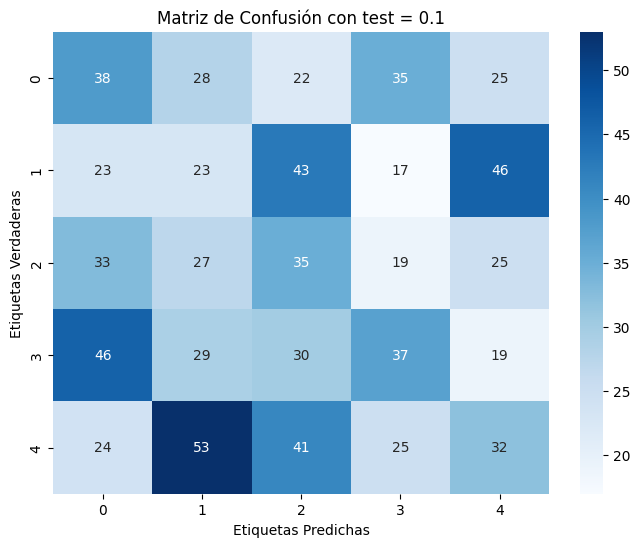

Exactitud del modelo: 0.2129032258064516
Precisión del modelo: 0.21610024142443704
Recall del modelo: 0.2129032258064516
Puntuación F1 del modelo: 0.2131032947808951
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_1_estimators/matriz_confusion_test_0.2.png


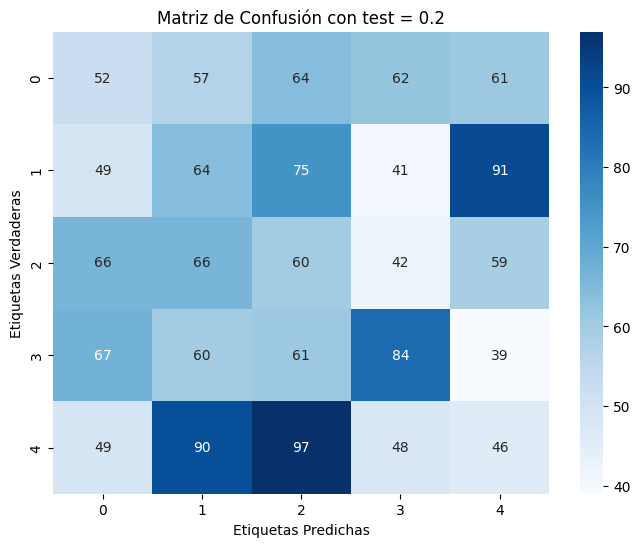

Exactitud del modelo: 0.19741935483870968
Precisión del modelo: 0.19999881065127473
Recall del modelo: 0.19741935483870968
Puntuación F1 del modelo: 0.19803830396988775
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_1_estimators/matriz_confusion_test_0.3.png


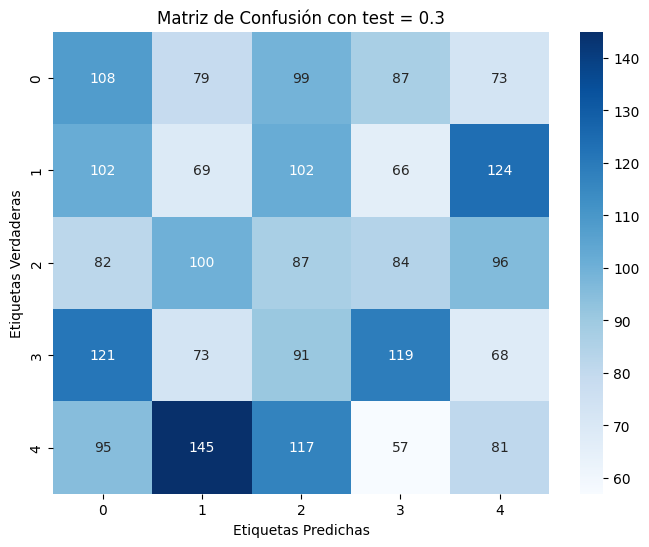

Exactitud del modelo: 0.1995698924731183
Precisión del modelo: 0.20165307944067368
Recall del modelo: 0.1995698924731183
Puntuación F1 del modelo: 0.19997690519923877
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_1_estimators/matriz_confusion_test_0.4.png


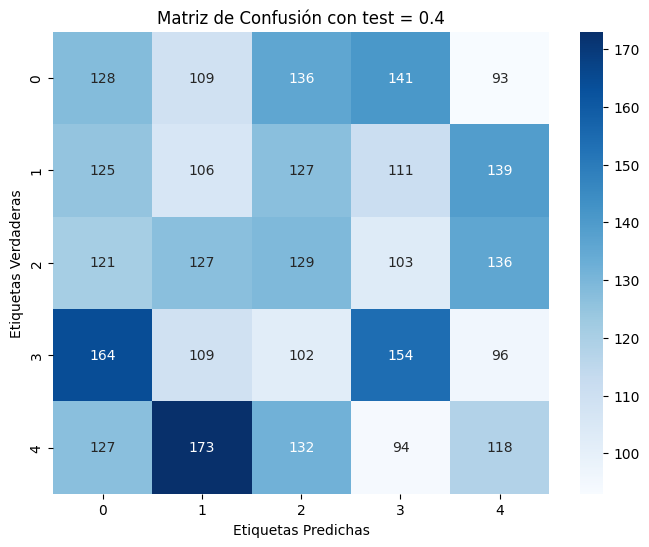

Exactitud del modelo: 0.20483870967741935
Precisión del modelo: 0.20556337392428686
Recall del modelo: 0.20483870967741935
Puntuación F1 del modelo: 0.2049918008129926
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_1_estimators/matriz_confusion_test_0.5.png


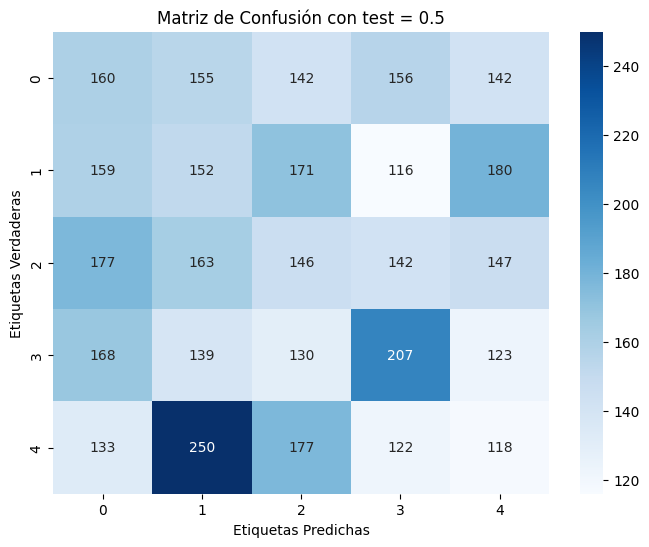

Exactitud del modelo: 0.20206451612903226
Precisión del modelo: 0.20221806291201463
Recall del modelo: 0.20206451612903226
Puntuación F1 del modelo: 0.20189029672767503
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_1_estimators/matriz_confusion_test_0.6.png


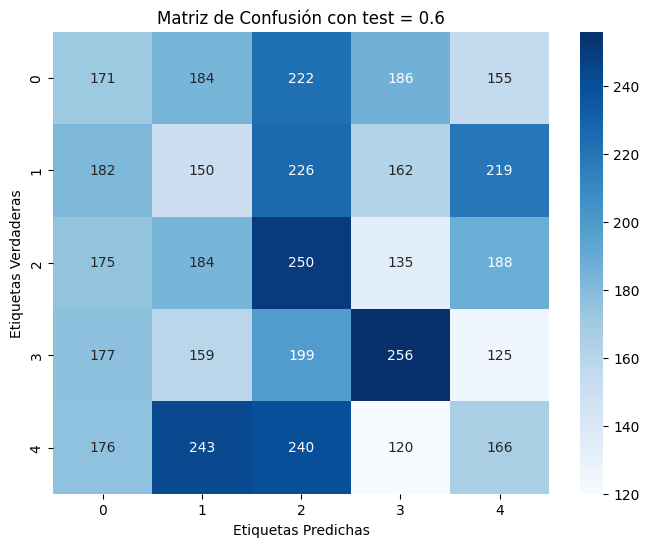

Exactitud del modelo: 0.2135483870967742
Precisión del modelo: 0.21356897696066607
Recall del modelo: 0.2135483870967742
Puntuación F1 del modelo: 0.21290200921165883
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_1_estimators/matriz_confusion_test_0.7.png


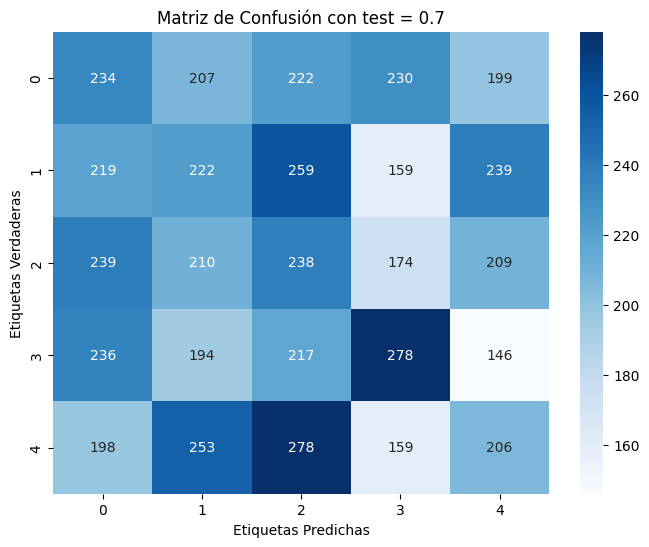

Exactitud del modelo: 0.21714285714285714
Precisión del modelo: 0.21833811362192368
Recall del modelo: 0.21714285714285714
Puntuación F1 del modelo: 0.21742090091590127
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_1_estimators/matriz_confusion_test_0.8.png


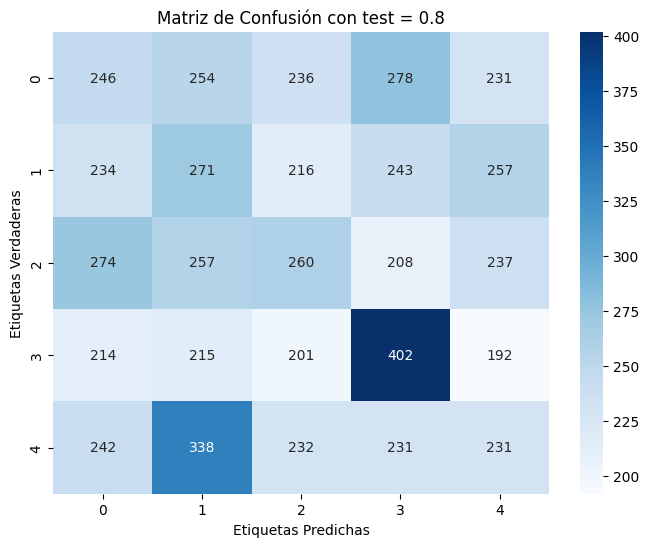

Exactitud del modelo: 0.22741935483870968
Precisión del modelo: 0.22568713966253096
Recall del modelo: 0.22741935483870968
Puntuación F1 del modelo: 0.22611648063790646
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_1_estimators/matriz_confusion_test_0.9.png


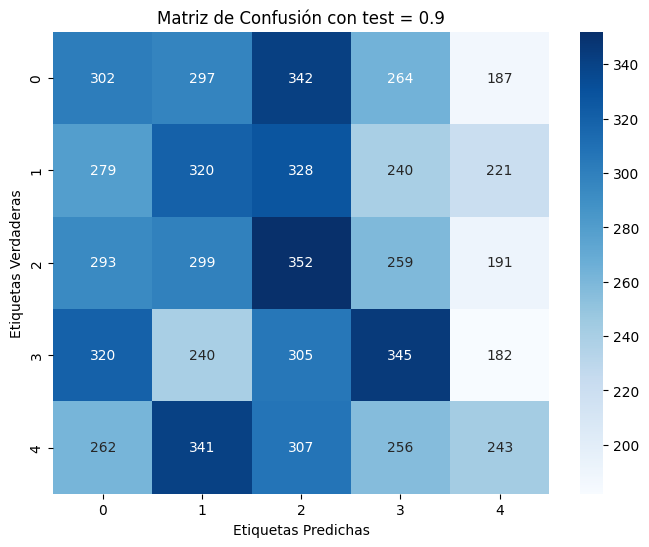

Exactitud del modelo: 0.2239426523297491
Precisión del modelo: 0.22540048906964347
Recall del modelo: 0.2239426523297491
Puntuación F1 del modelo: 0.22325180870243147
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_1_estimators/random_forest_gemini_embedding_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Se creó la carpeta Random_Forest_val_cruz_1_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_1_estimators/matriz_confusion_cv_2.png


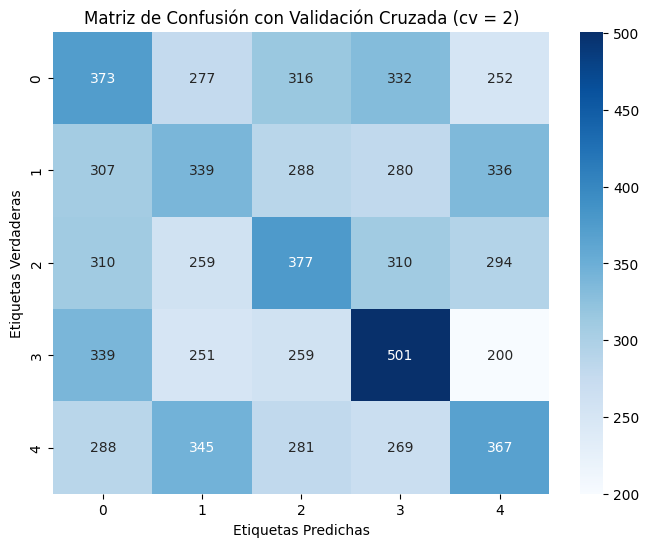

Exactitud media: 0.25251612903225806
Precisión media: 0.25167404435427676
Recall media: 0.25251612903225806
Puntuación F1 media: 0.25186450118917214
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_1_estimators/matriz_confusion_cv_3.png


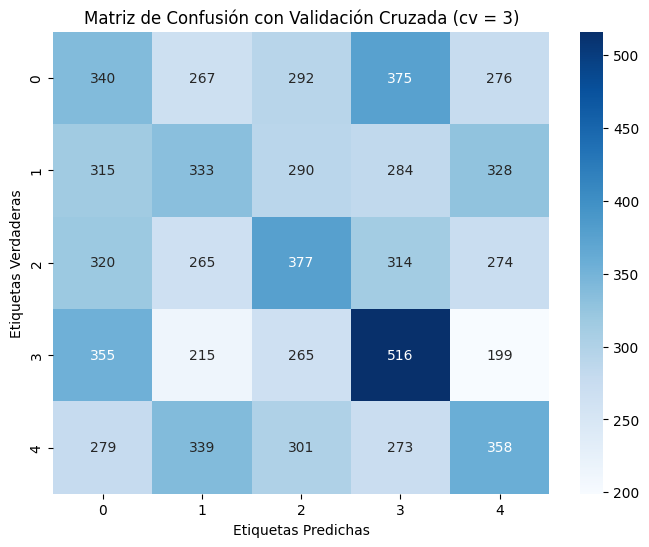

Exactitud media: 0.24825806451612903
Precisión media: 0.24710463596428717
Recall media: 0.24825806451612903
Puntuación F1 media: 0.24724787935784134
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_1_estimators/matriz_confusion_cv_4.png


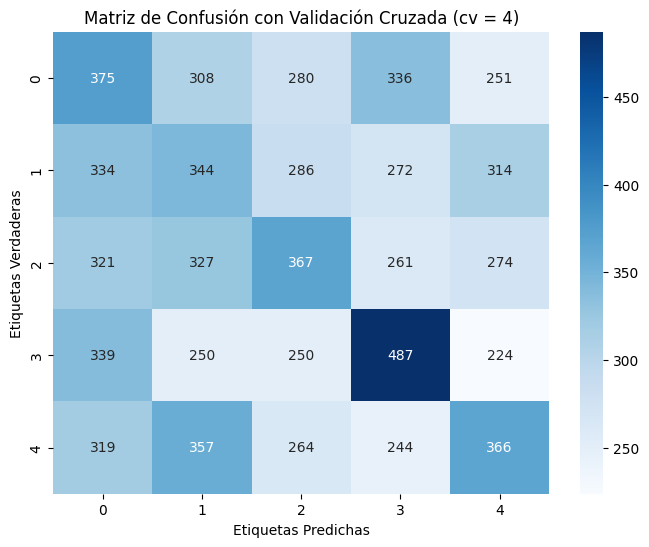

Exactitud media: 0.2501935483870968
Precisión media: 0.25063612273312197
Recall media: 0.2501935483870968
Puntuación F1 media: 0.2501700364756406
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_1_estimators/matriz_confusion_cv_5.png


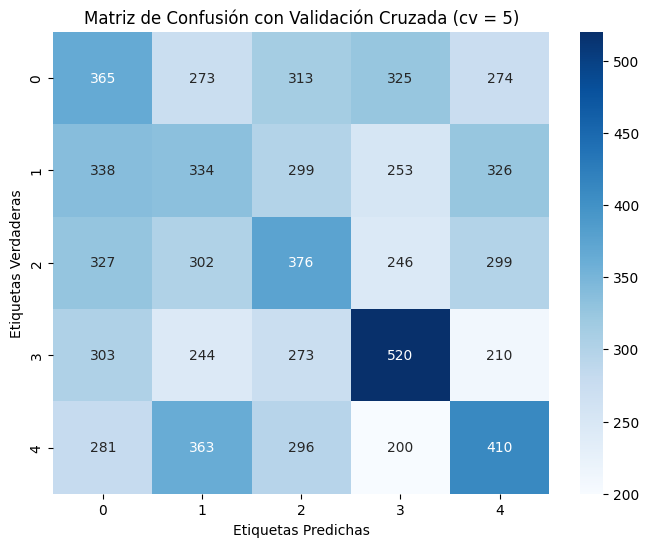

Exactitud media: 0.25870967741935486
Precisión media: 0.25893097407325055
Recall media: 0.25870967741935486
Puntuación F1 media: 0.25879012739861484
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_1_estimators/matriz_confusion_cv_6.png


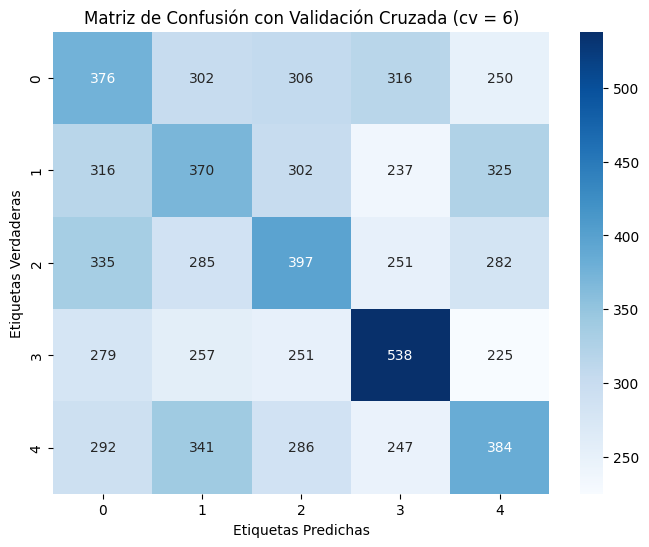

Exactitud media: 0.26645161290322583
Precisión media: 0.26624181056502166
Recall media: 0.26645161290322583
Puntuación F1 media: 0.2662850136277564
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_1_estimators/matriz_confusion_cv_7.png


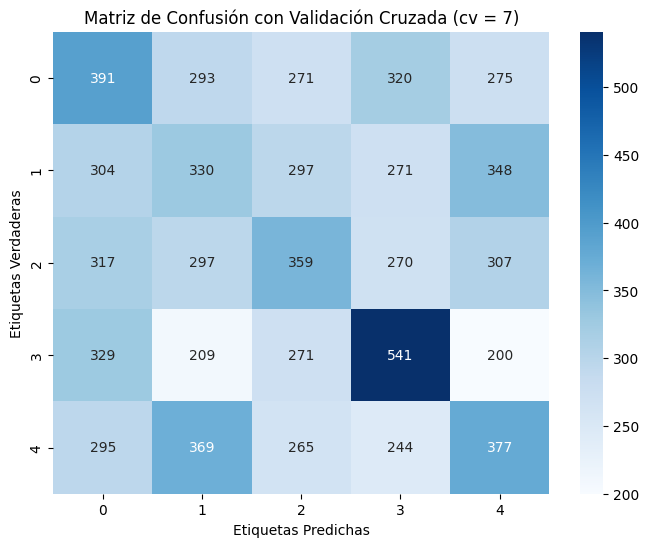

Exactitud media: 0.2578064516129032
Precisión media: 0.25670378847837266
Recall media: 0.2578064516129032
Puntuación F1 media: 0.2570960387065253
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_1_estimators/matriz_confusion_cv_8.png


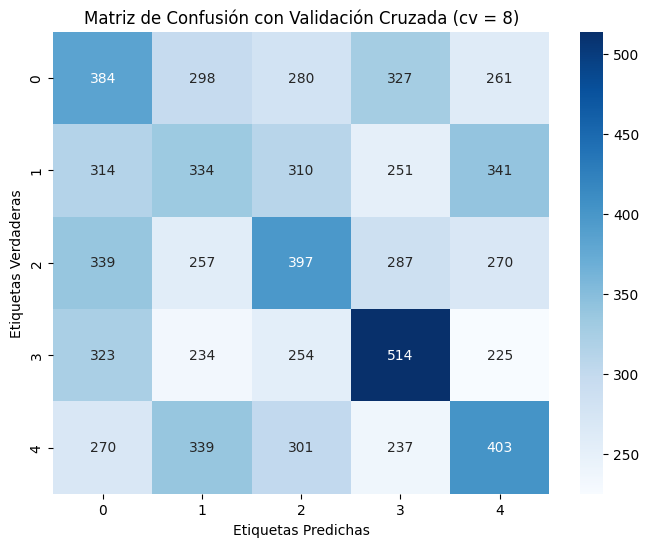

Exactitud media: 0.2621935483870968
Precisión media: 0.2616461630003762
Recall media: 0.2621935483870968
Puntuación F1 media: 0.2618085869830048
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_1_estimators/matriz_confusion_cv_9.png


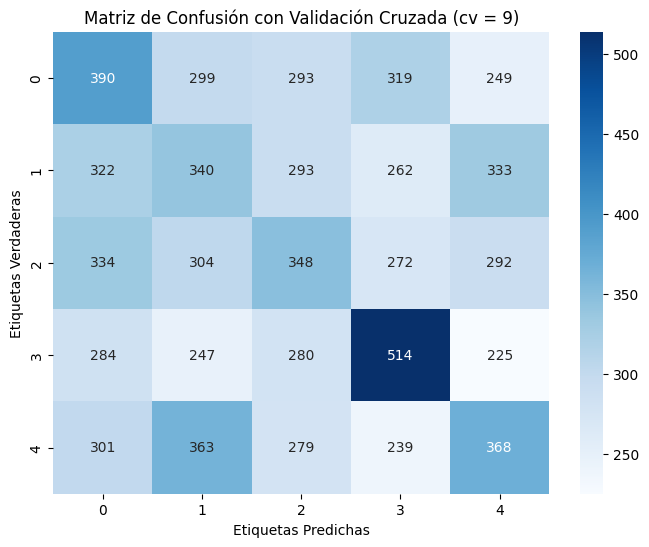

Exactitud media: 0.25290322580645164
Precisión media: 0.2524075684475439
Recall media: 0.25290322580645164
Puntuación F1 media: 0.25255000933203836
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_1_estimators/matriz_confusion_cv_10.png


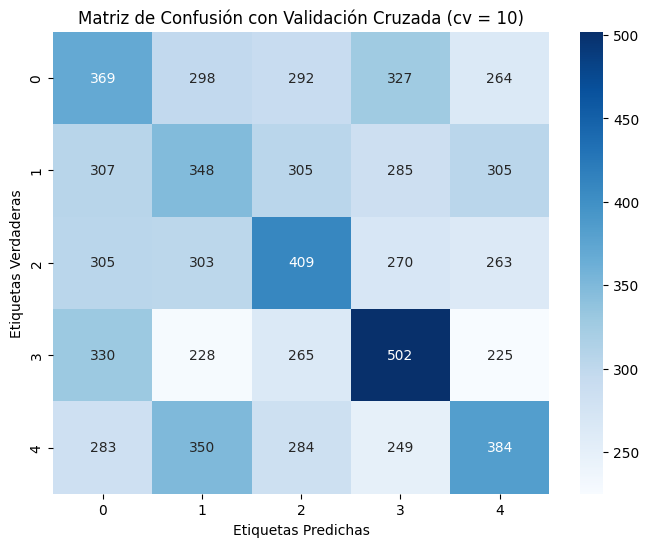

Exactitud media: 0.25961290322580644
Precisión media: 0.25926094629942475
Recall media: 0.25961290322580644
Puntuación F1 media: 0.25931384685562586
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_1_estimators/random_forest_gemini_embedding_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Se creó la carpeta Random_Forest_val_sim_2_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_2_estimators/matriz_confusion_test_0.1.png


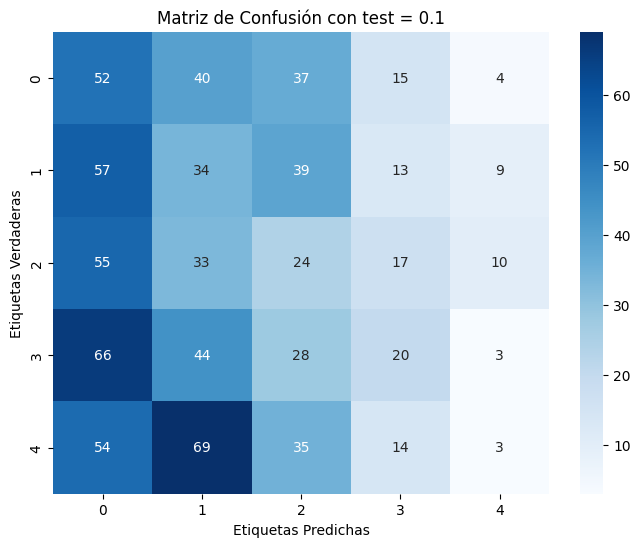

Exactitud del modelo: 0.17161290322580644
Precisión del modelo: 0.16763703258795443
Recall del modelo: 0.17161290322580644
Puntuación F1 del modelo: 0.1515970106514059
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_2_estimators/matriz_confusion_test_0.2.png


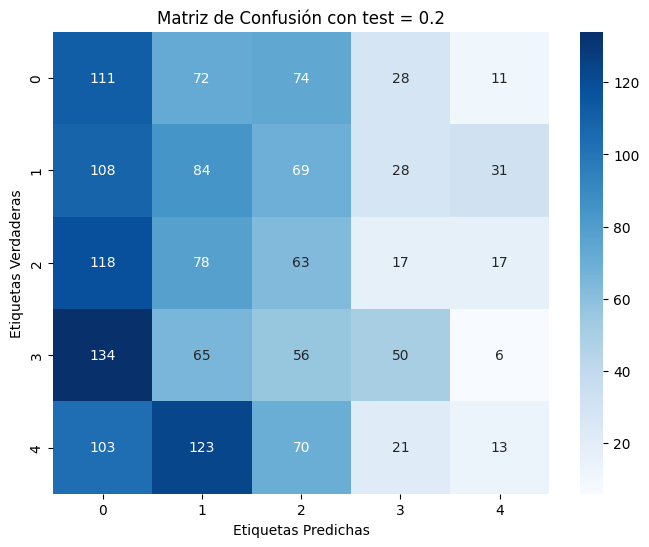

Exactitud del modelo: 0.20709677419354838
Precisión del modelo: 0.2190468446996093
Recall del modelo: 0.20709677419354838
Puntuación F1 del modelo: 0.1912475643792207
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_2_estimators/matriz_confusion_test_0.3.png


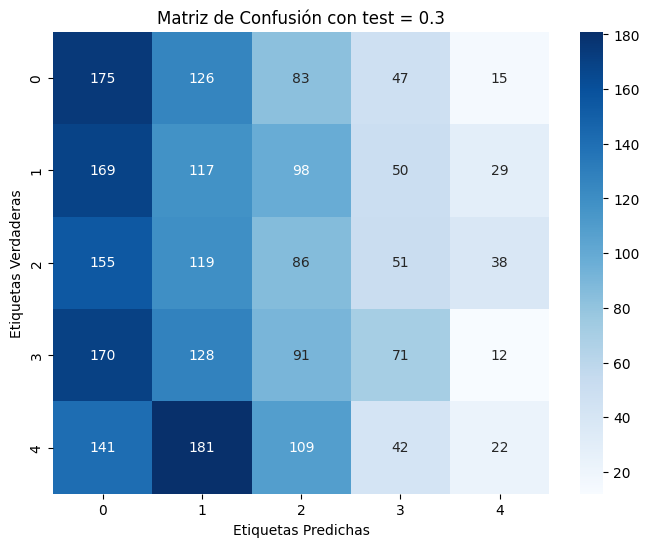

Exactitud del modelo: 0.20258064516129032
Precisión del modelo: 0.20733452515041126
Recall del modelo: 0.20258064516129032
Puntuación F1 del modelo: 0.1854699239599126
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_2_estimators/matriz_confusion_test_0.4.png


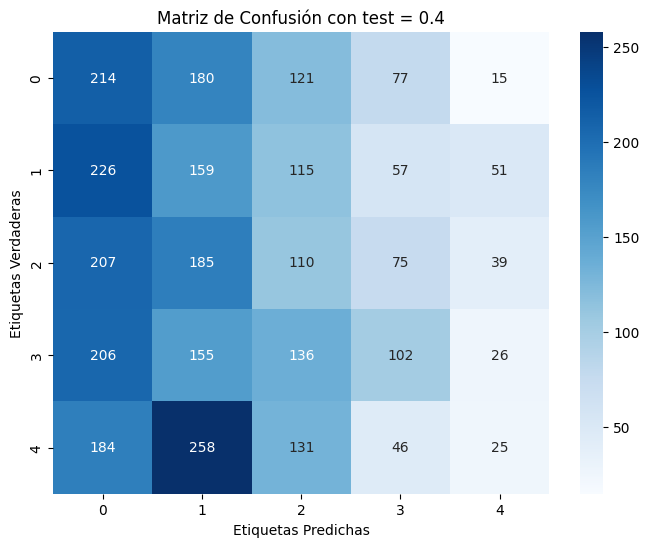

Exactitud del modelo: 0.1967741935483871
Precisión del modelo: 0.20024192813038696
Recall del modelo: 0.1967741935483871
Puntuación F1 del modelo: 0.18178196443787079
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_2_estimators/matriz_confusion_test_0.5.png


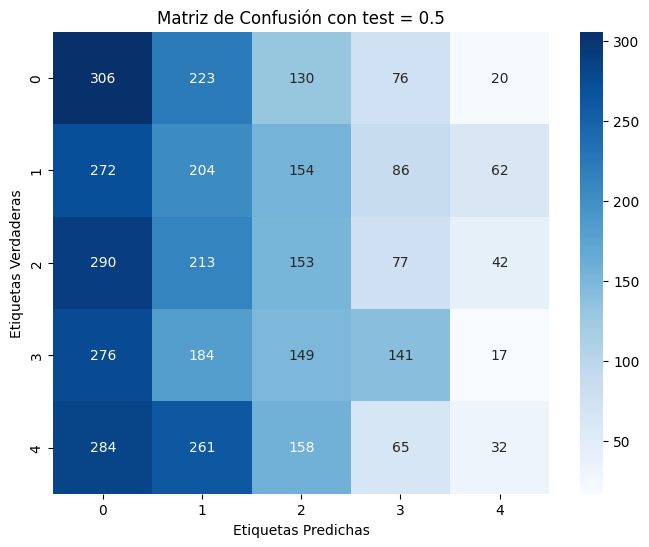

Exactitud del modelo: 0.21574193548387097
Precisión del modelo: 0.22153365166564923
Recall del modelo: 0.21574193548387097
Puntuación F1 del modelo: 0.19851605359009775
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_2_estimators/matriz_confusion_test_0.6.png


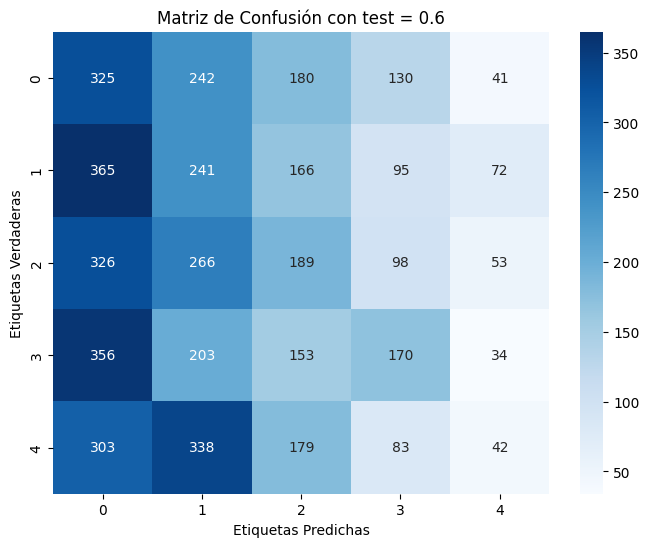

Exactitud del modelo: 0.20795698924731182
Precisión del modelo: 0.21313333790074537
Recall del modelo: 0.20795698924731182
Puntuación F1 del modelo: 0.19454033642473148
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_2_estimators/matriz_confusion_test_0.7.png


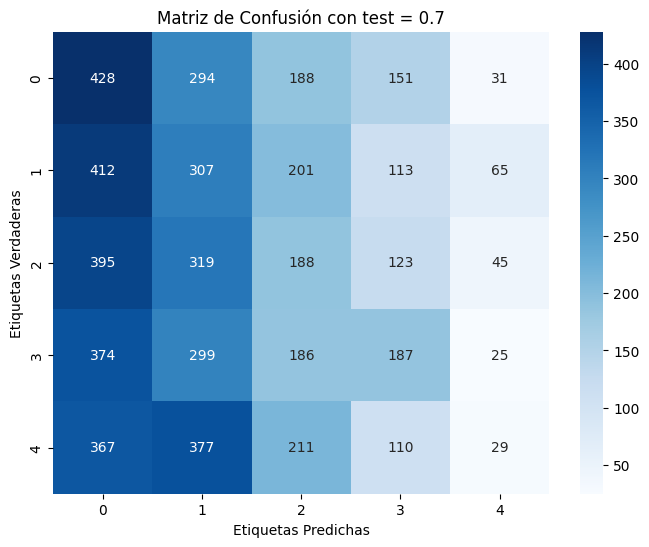

Exactitud del modelo: 0.20995391705069125
Precisión del modelo: 0.20456459434294197
Recall del modelo: 0.20995391705069125
Puntuación F1 del modelo: 0.1897177527634836
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_2_estimators/matriz_confusion_test_0.8.png


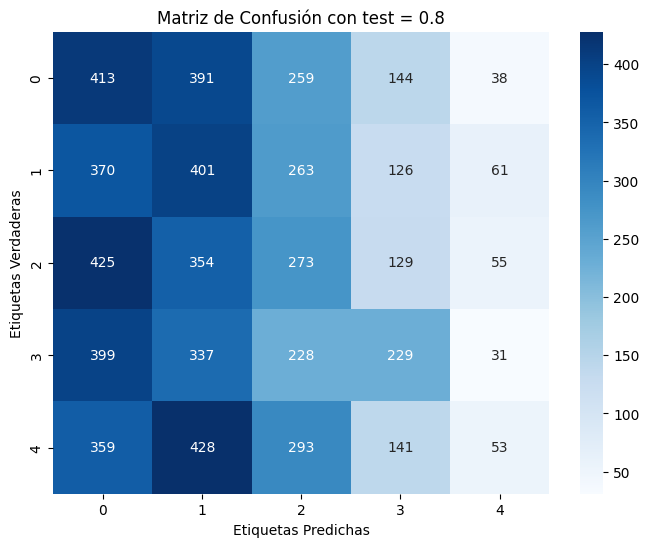

Exactitud del modelo: 0.22080645161290322
Precisión del modelo: 0.22941207645398431
Recall del modelo: 0.22080645161290322
Puntuación F1 del modelo: 0.2045095332153155
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_2_estimators/matriz_confusion_test_0.9.png


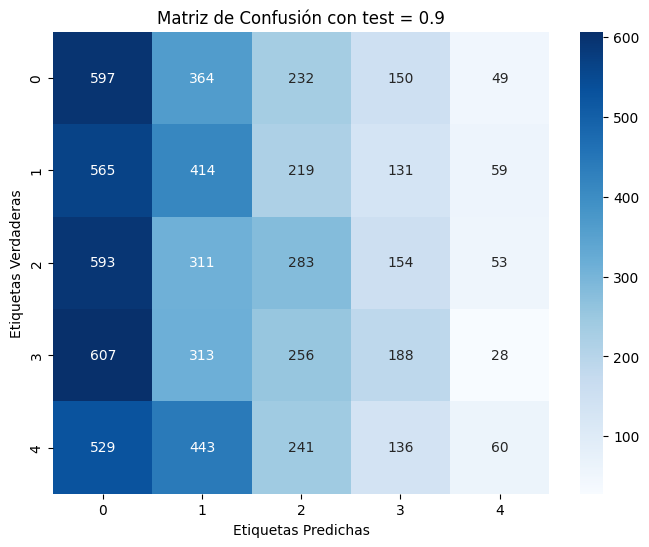

Exactitud del modelo: 0.2210752688172043
Precisión del modelo: 0.22991930089086454
Recall del modelo: 0.2210752688172043
Puntuación F1 del modelo: 0.1991988954235438
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_2_estimators/random_forest_gemini_embedding_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Se creó la carpeta Random_Forest_val_cruz_2_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_2_estimators/matriz_confusion_cv_2.png


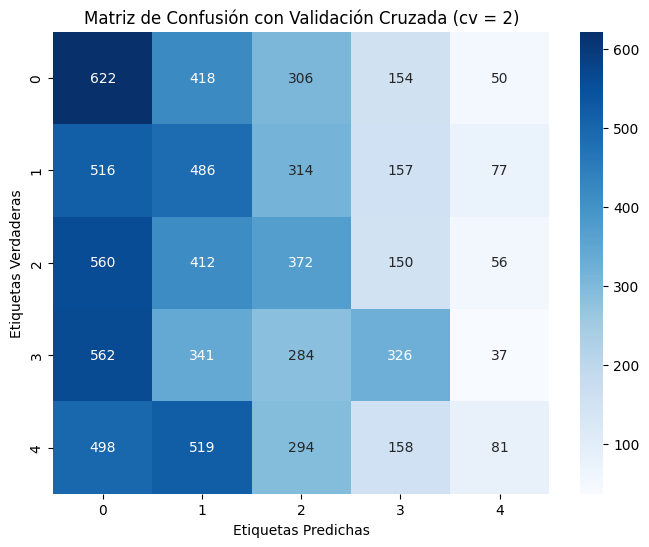

Exactitud media: 0.24348387096774193
Precisión media: 0.25997810833870766
Recall media: 0.24348387096774193
Puntuación F1 media: 0.22738781929935659
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_2_estimators/matriz_confusion_cv_3.png


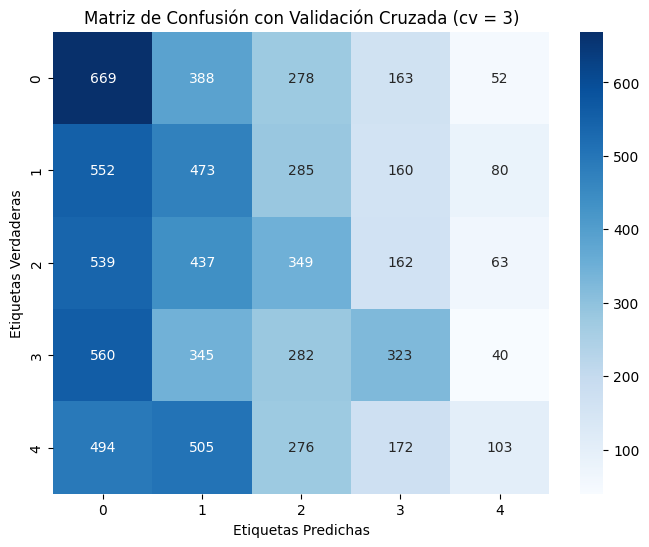

Exactitud media: 0.24735483870967742
Precisión media: 0.26593704886263825
Recall media: 0.24735483870967742
Puntuación F1 media: 0.23159707384394865
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_2_estimators/matriz_confusion_cv_4.png


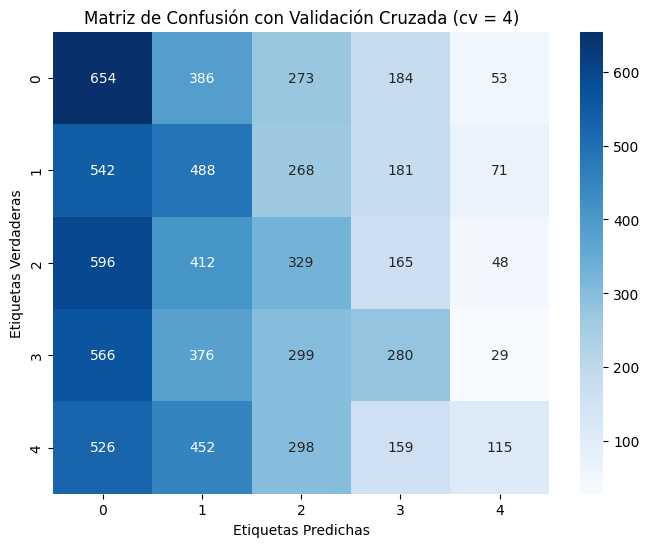

Exactitud media: 0.24077419354838708
Precisión media: 0.266951866779787
Recall media: 0.24077419354838708
Puntuación F1 media: 0.22500699498731774
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_2_estimators/matriz_confusion_cv_5.png


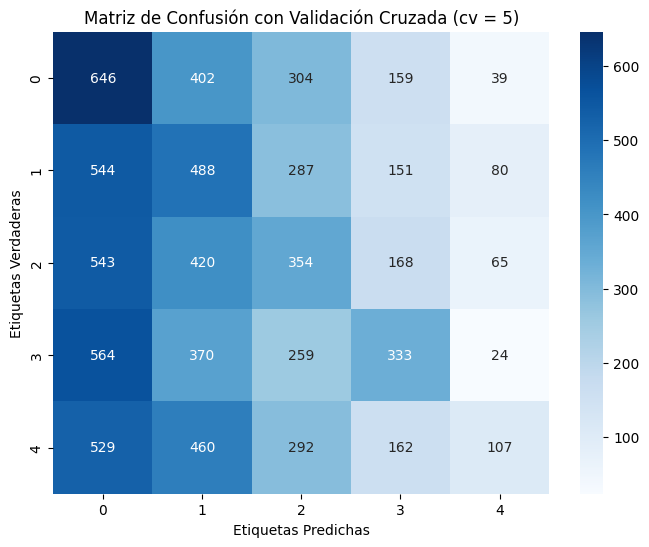

Exactitud media: 0.2487741935483871
Precisión media: 0.275036616239267
Recall media: 0.2487741935483871
Puntuación F1 media: 0.2341796396377052
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_2_estimators/matriz_confusion_cv_6.png


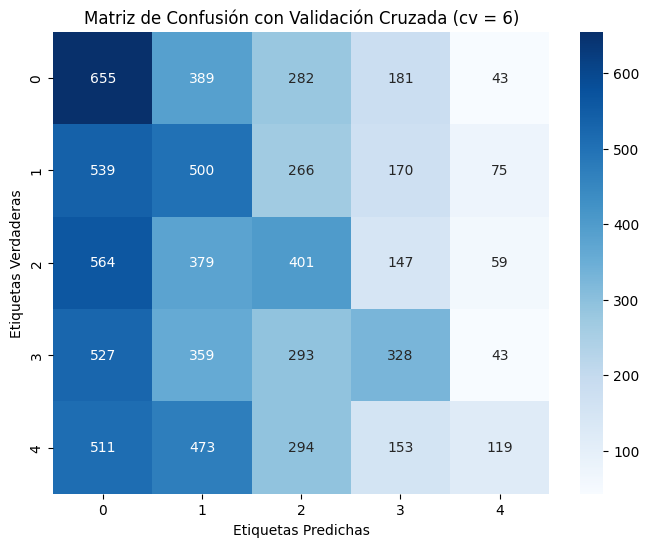

Exactitud media: 0.2584516129032258
Precisión media: 0.28389887575250244
Recall media: 0.2584516129032258
Puntuación F1 media: 0.24413323967579229
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_2_estimators/matriz_confusion_cv_7.png


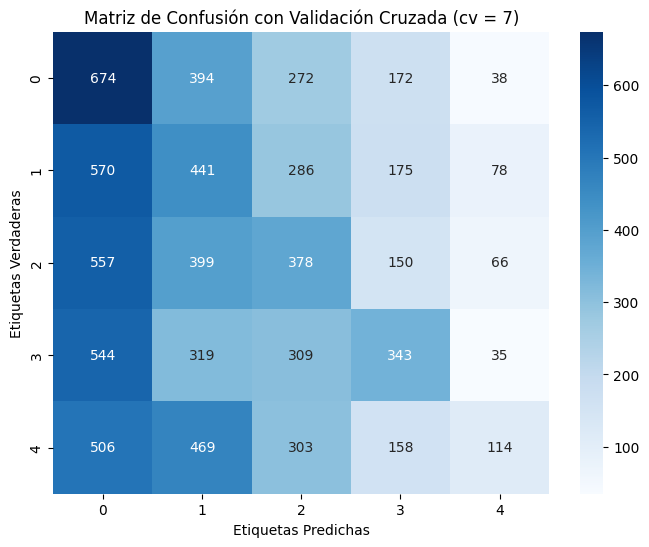

Exactitud media: 0.25161290322580643
Precisión media: 0.2773586930798074
Recall media: 0.25161290322580643
Puntuación F1 media: 0.23753716253446874
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_2_estimators/matriz_confusion_cv_8.png


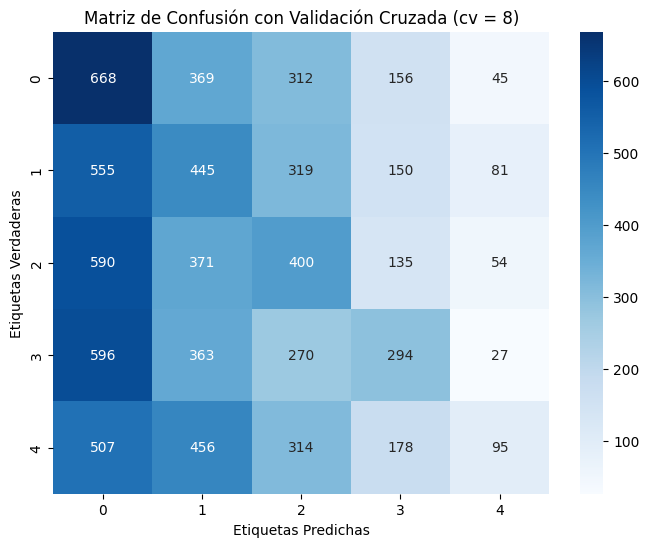

Exactitud media: 0.2454193548387097
Precisión media: 0.2670799420142817
Recall media: 0.2454193548387097
Puntuación F1 media: 0.22873216882575034
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_2_estimators/matriz_confusion_cv_9.png


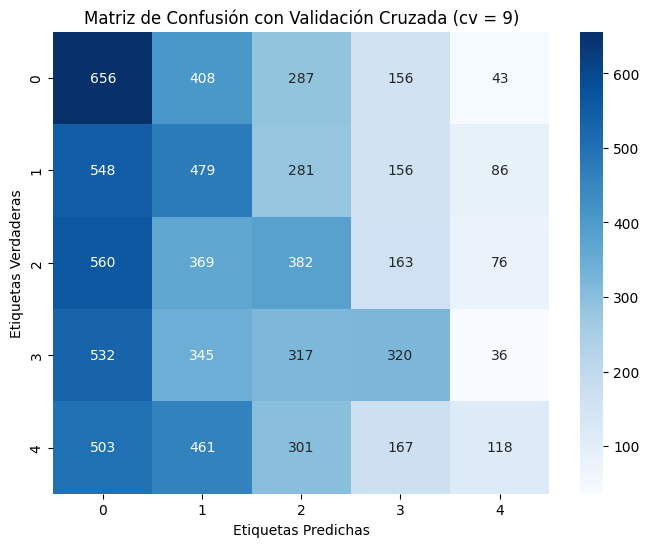

Exactitud media: 0.25225806451612903
Precisión media: 0.27432434923135834
Recall media: 0.25225806451612903
Puntuación F1 media: 0.23806728741491154
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_2_estimators/matriz_confusion_cv_10.png


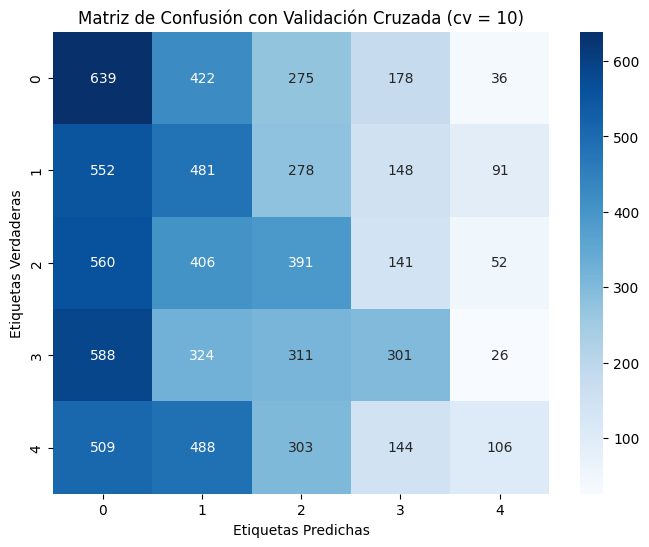

Exactitud media: 0.24748387096774194
Precisión media: 0.2745980887327597
Recall media: 0.24748387096774194
Puntuación F1 media: 0.23253664401418145
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_2_estimators/random_forest_gemini_embedding_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Se creó la carpeta Random_Forest_val_sim_3_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_3_estimators/matriz_confusion_test_0.1.png


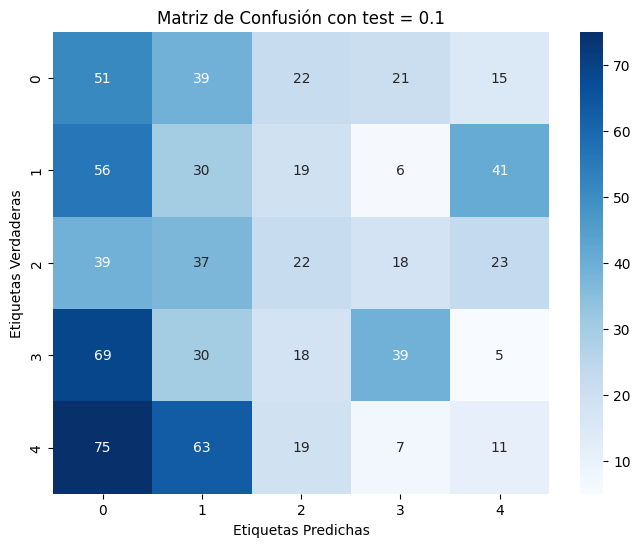

Exactitud del modelo: 0.19741935483870968
Precisión del modelo: 0.21778750576252257
Recall del modelo: 0.19741935483870968
Puntuación F1 del modelo: 0.193717690527938
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_3_estimators/matriz_confusion_test_0.2.png


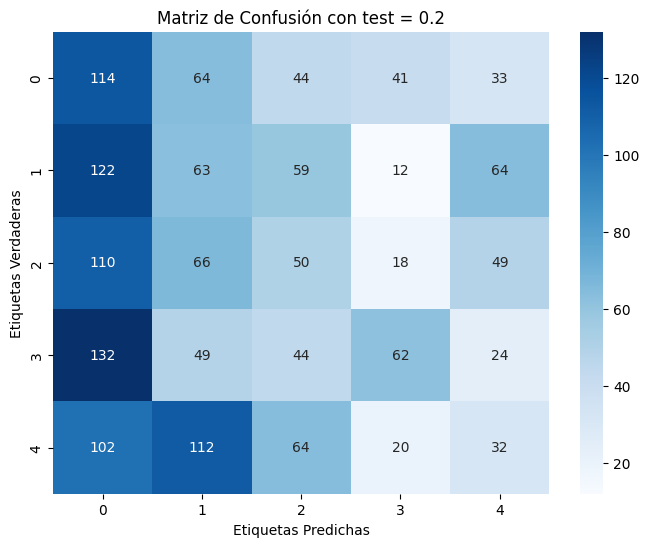

Exactitud del modelo: 0.20709677419354838
Precisión del modelo: 0.22552393716132657
Recall del modelo: 0.20709677419354838
Puntuación F1 del modelo: 0.20165319875858165
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_3_estimators/matriz_confusion_test_0.3.png


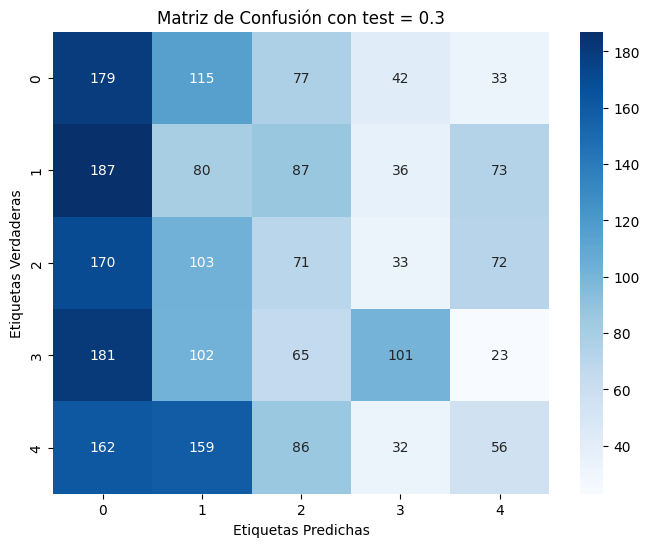

Exactitud del modelo: 0.20946236559139786
Precisión del modelo: 0.23350963363197993
Recall del modelo: 0.20946236559139786
Puntuación F1 del modelo: 0.2048308711809576
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_3_estimators/matriz_confusion_test_0.4.png


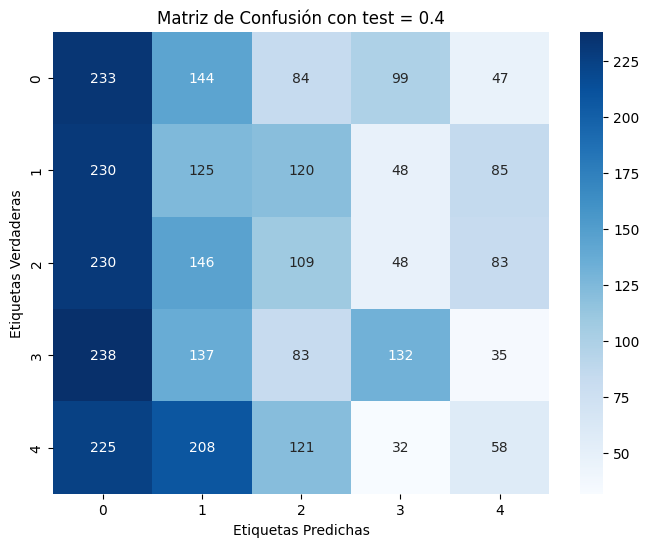

Exactitud del modelo: 0.21193548387096775
Precisión del modelo: 0.22686943139844465
Recall del modelo: 0.21193548387096775
Puntuación F1 del modelo: 0.20523627746141077
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_3_estimators/matriz_confusion_test_0.5.png


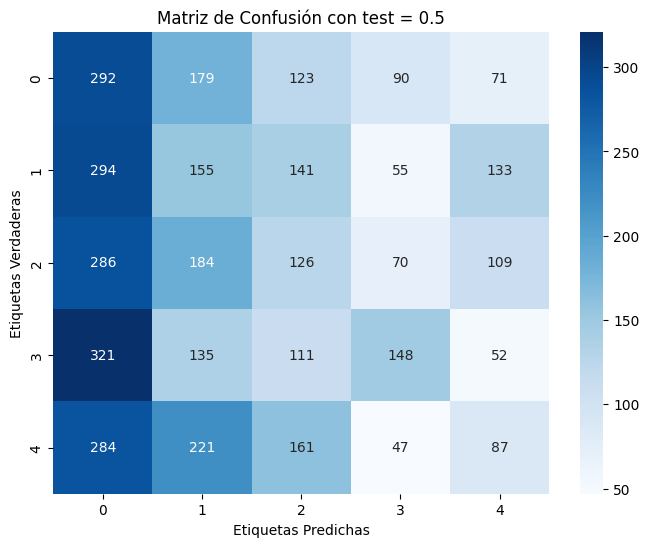

Exactitud del modelo: 0.20851612903225805
Precisión del modelo: 0.22337935288167976
Recall del modelo: 0.20851612903225805
Puntuación F1 del modelo: 0.20219824228484928
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_3_estimators/matriz_confusion_test_0.6.png


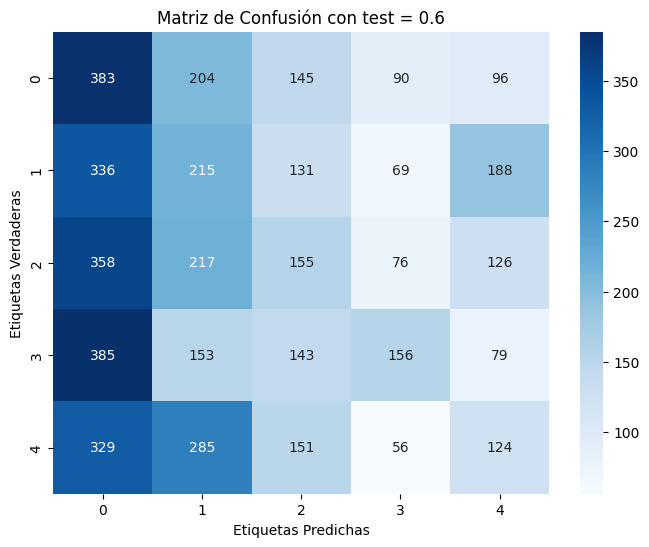

Exactitud del modelo: 0.2221505376344086
Precisión del modelo: 0.23535003893760145
Recall del modelo: 0.2221505376344086
Puntuación F1 del modelo: 0.21389710755509847
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_3_estimators/matriz_confusion_test_0.7.png


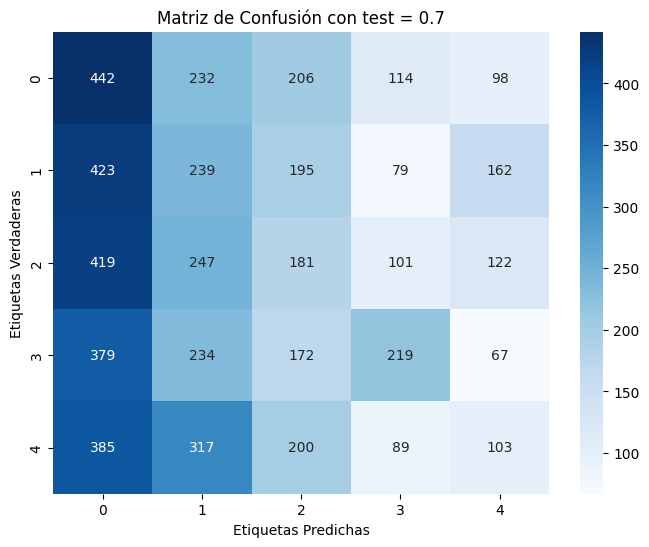

Exactitud del modelo: 0.21824884792626728
Precisión del modelo: 0.22842927747025835
Recall del modelo: 0.21824884792626728
Puntuación F1 del modelo: 0.20974122088146602
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_3_estimators/matriz_confusion_test_0.8.png


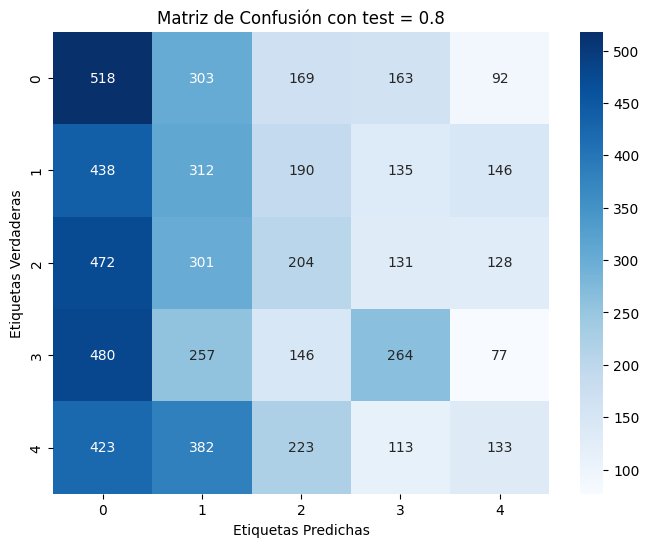

Exactitud del modelo: 0.23080645161290322
Precisión del modelo: 0.2398832158799555
Recall del modelo: 0.23080645161290322
Puntuación F1 del modelo: 0.22085408262728354
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_3_estimators/matriz_confusion_test_0.9.png


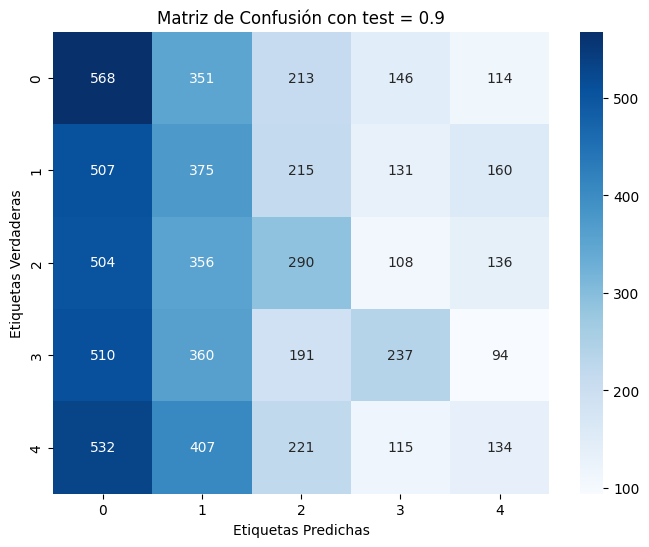

Exactitud del modelo: 0.2299641577060932
Precisión del modelo: 0.24150290959048343
Recall del modelo: 0.2299641577060932
Puntuación F1 del modelo: 0.2194064038290307
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_3_estimators/random_forest_gemini_embedding_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Se creó la carpeta Random_Forest_val_cruz_3_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_3_estimators/matriz_confusion_cv_2.png


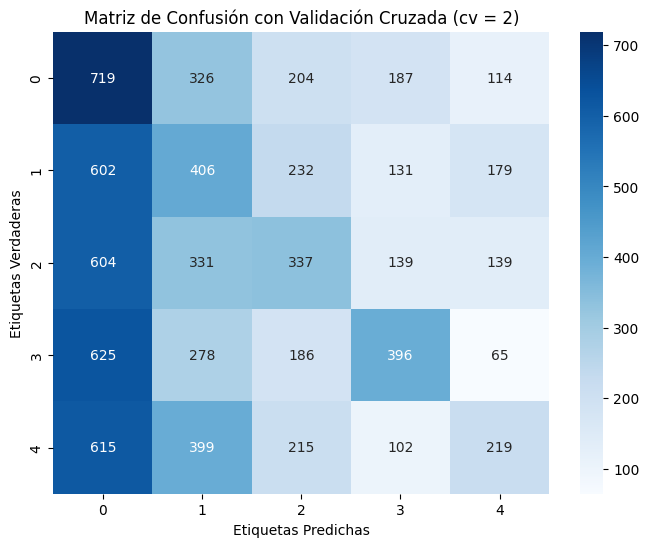

Exactitud media: 0.268
Precisión media: 0.2936167895560777
Recall media: 0.268
Puntuación F1 media: 0.2617365326018998
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_3_estimators/matriz_confusion_cv_3.png


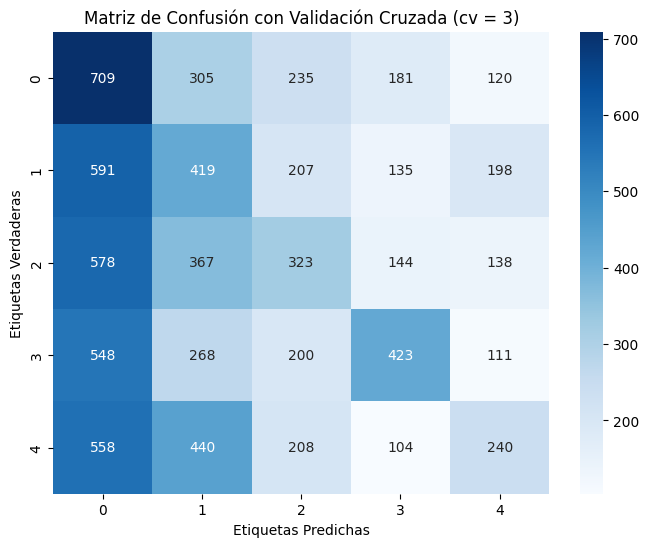

Exactitud media: 0.2727741935483871
Precisión media: 0.29436784475442557
Recall media: 0.2727741935483871
Puntuación F1 media: 0.2674647681767419
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_3_estimators/matriz_confusion_cv_4.png


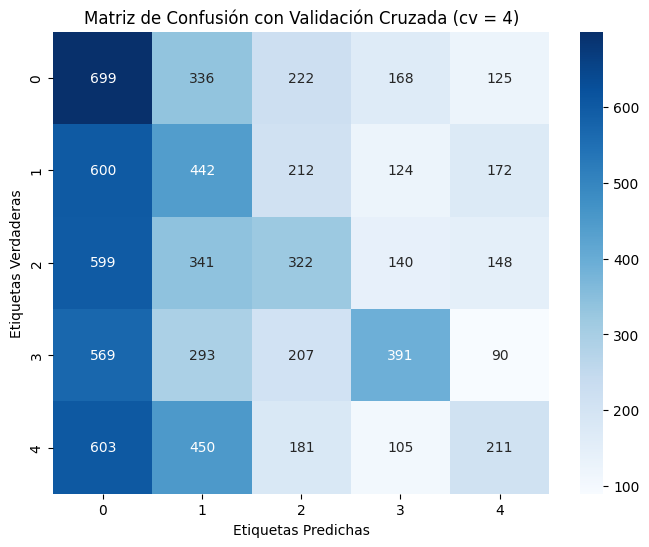

Exactitud media: 0.26645161290322583
Precisión media: 0.2901426040059028
Recall media: 0.26645161290322583
Puntuación F1 media: 0.2600215421524287
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_3_estimators/matriz_confusion_cv_5.png


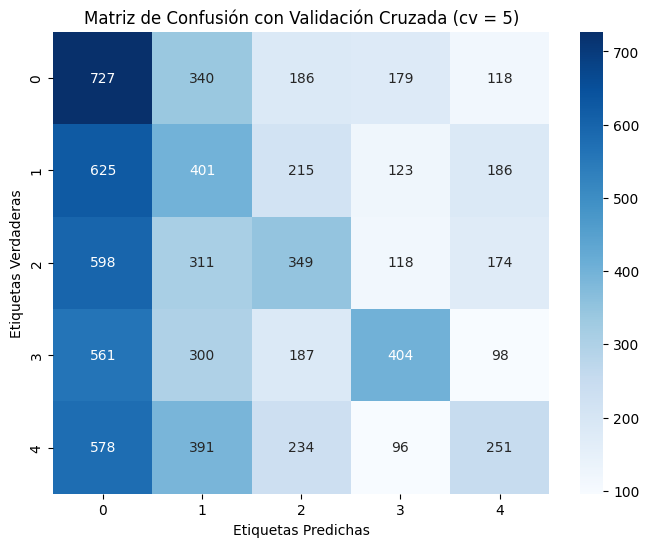

Exactitud media: 0.2750967741935484
Precisión media: 0.3012174616093
Recall media: 0.2750967741935484
Puntuación F1 media: 0.27036319111891066
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_3_estimators/matriz_confusion_cv_6.png


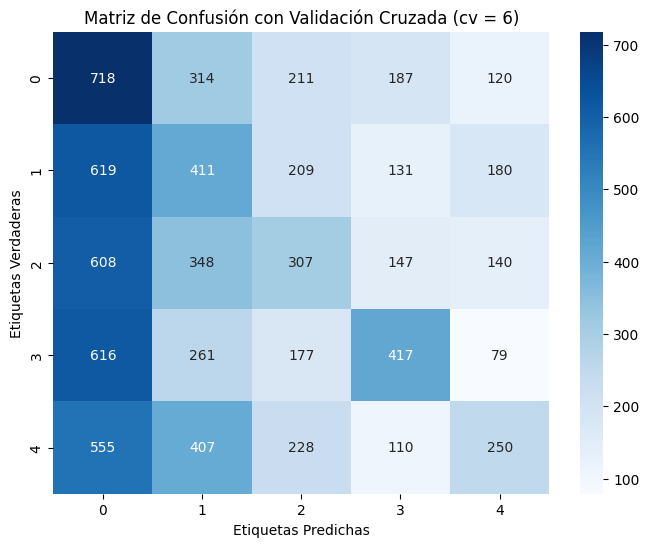

Exactitud media: 0.2713548387096774
Precisión media: 0.29663133787452545
Recall media: 0.2713548387096774
Puntuación F1 media: 0.26603245698621775
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_3_estimators/matriz_confusion_cv_7.png


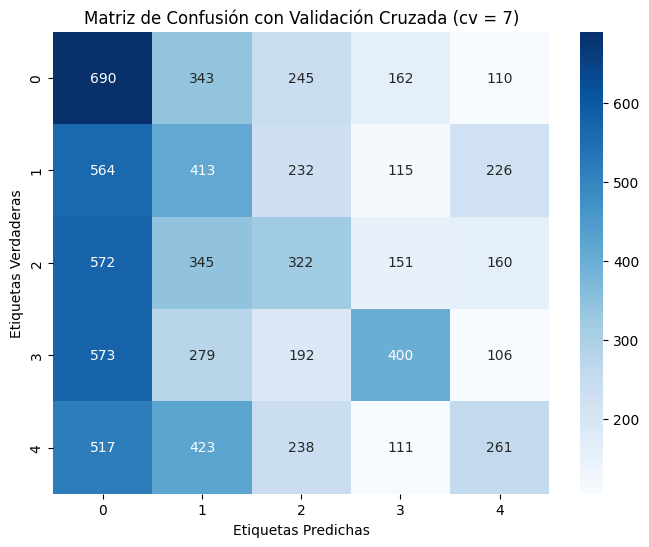

Exactitud media: 0.2691612903225806
Precisión media: 0.29122165550899
Recall media: 0.2691612903225806
Puntuación F1 media: 0.26496567575633084
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_3_estimators/matriz_confusion_cv_8.png


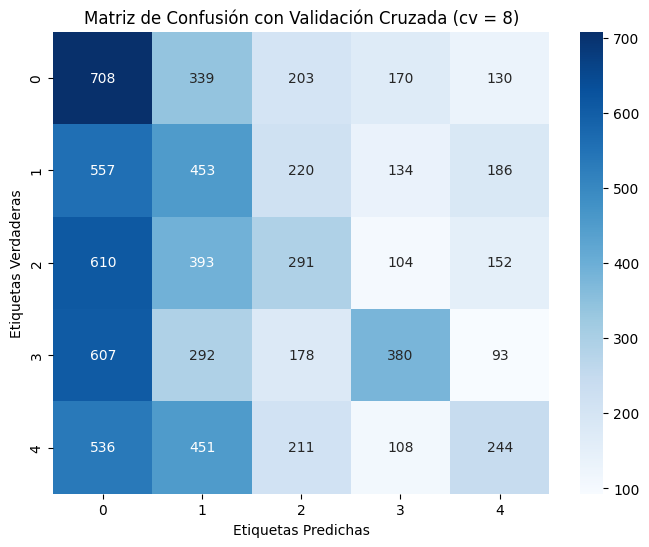

Exactitud media: 0.2678709677419355
Precisión media: 0.2921179227510248
Recall media: 0.2678709677419355
Puntuación F1 media: 0.26155627327096836
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_3_estimators/matriz_confusion_cv_9.png


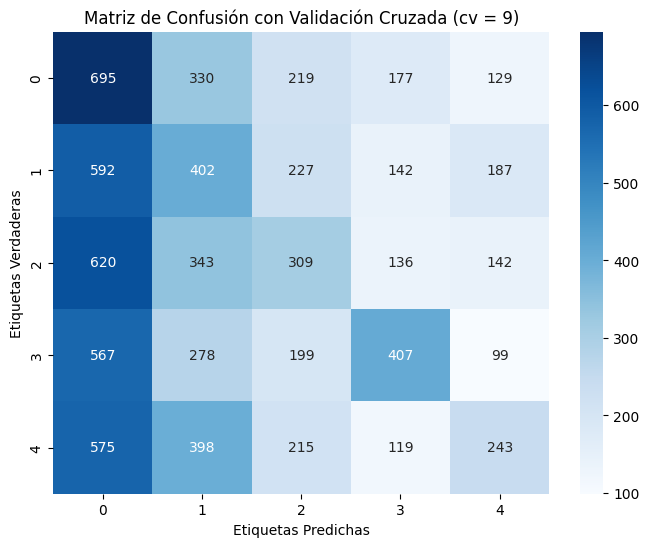

Exactitud media: 0.26529032258064517
Precisión media: 0.2880975884004083
Recall media: 0.26529032258064517
Puntuación F1 media: 0.2603024280917934
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_3_estimators/matriz_confusion_cv_10.png


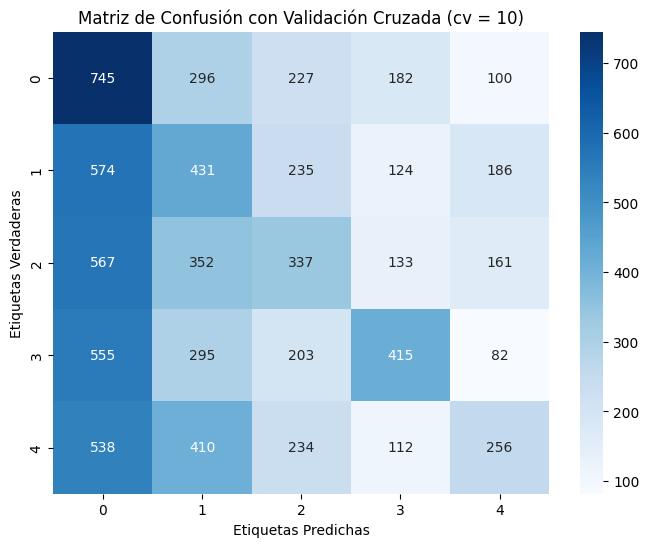

Exactitud media: 0.28180645161290324
Precisión media: 0.30401016913061635
Recall media: 0.28180645161290324
Puntuación F1 media: 0.2757247607322358
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_3_estimators/random_forest_gemini_embedding_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Se creó la carpeta Random_Forest_val_sim_4_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_4_estimators/matriz_confusion_test_0.1.png


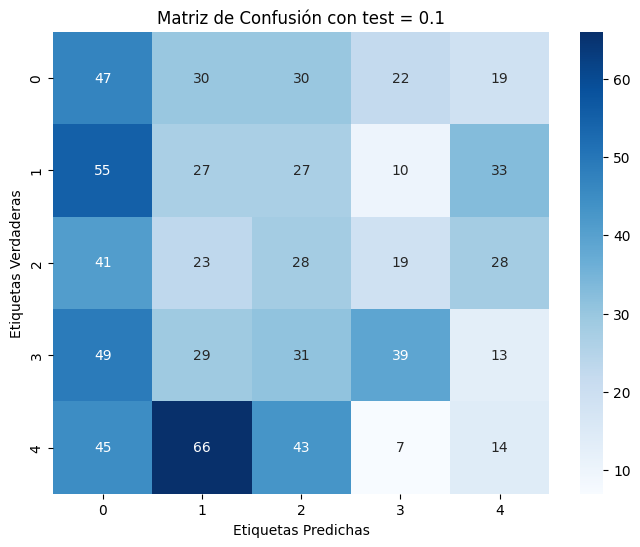

Exactitud del modelo: 0.2
Precisión del modelo: 0.21278552514560667
Recall del modelo: 0.2
Puntuación F1 del modelo: 0.19794463595465675
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_4_estimators/matriz_confusion_test_0.2.png


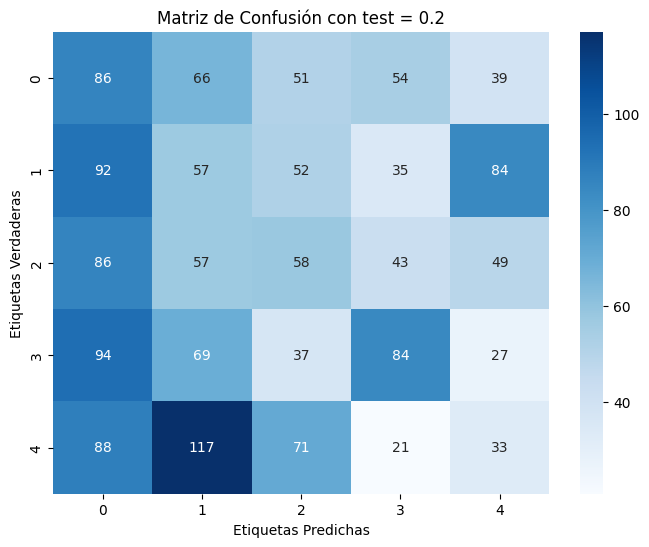

Exactitud del modelo: 0.20516129032258065
Precisión del modelo: 0.21113195046509528
Recall del modelo: 0.20516129032258065
Puntuación F1 del modelo: 0.20410760015553012
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_4_estimators/matriz_confusion_test_0.3.png


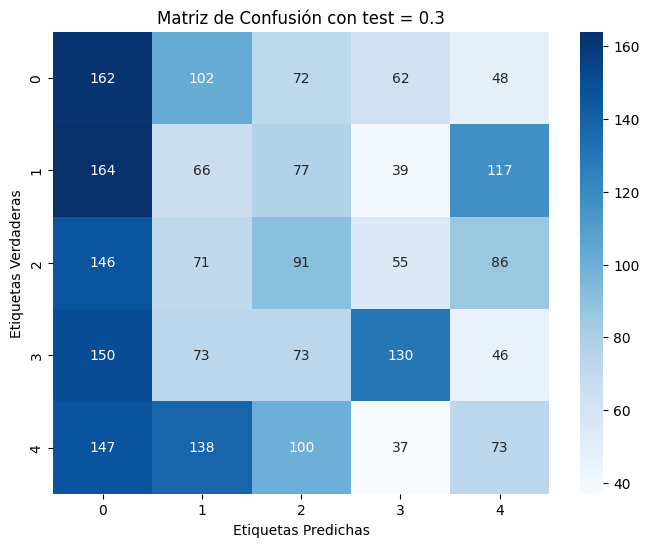

Exactitud del modelo: 0.22451612903225807
Precisión del modelo: 0.2358820899795089
Recall del modelo: 0.22451612903225807
Puntuación F1 del modelo: 0.22304837386184587
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_4_estimators/matriz_confusion_test_0.4.png


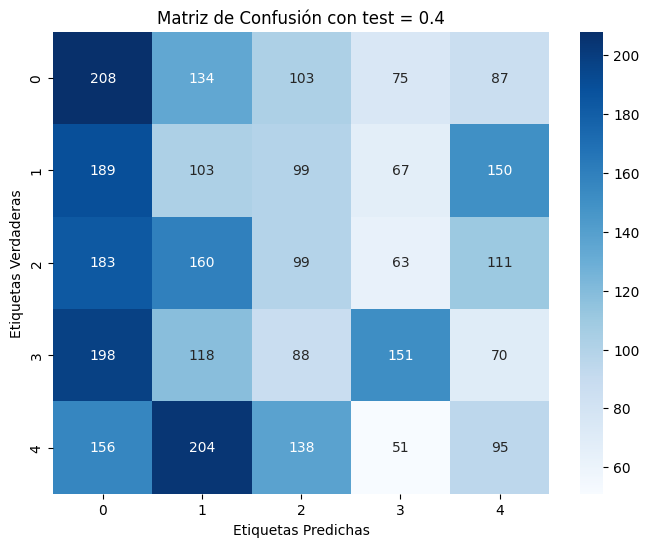

Exactitud del modelo: 0.21161290322580645
Precisión del modelo: 0.2223014547349835
Recall del modelo: 0.21161290322580645
Puntuación F1 del modelo: 0.21084160225372106
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_4_estimators/matriz_confusion_test_0.5.png


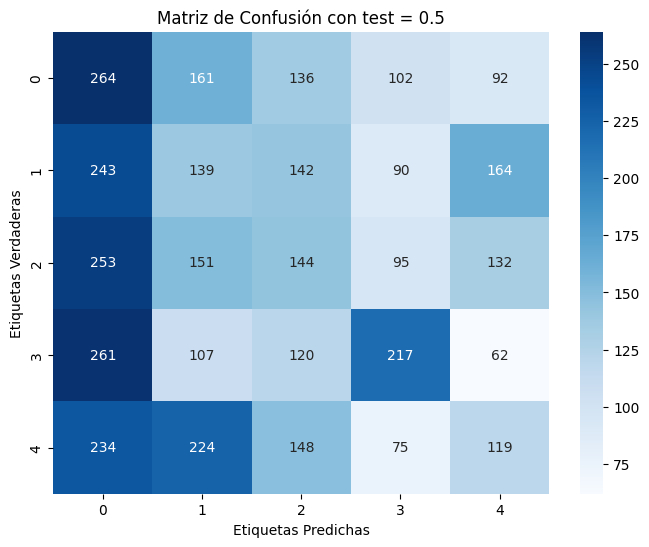

Exactitud del modelo: 0.2278709677419355
Precisión del modelo: 0.23577273160276047
Recall del modelo: 0.2278709677419355
Puntuación F1 del modelo: 0.2259911176288318
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_4_estimators/matriz_confusion_test_0.6.png


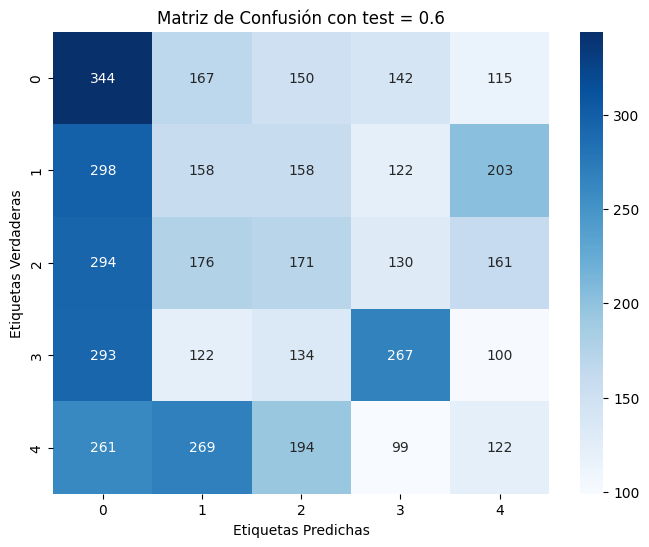

Exactitud del modelo: 0.22838709677419355
Precisión del modelo: 0.22839211906216997
Recall del modelo: 0.22838709677419355
Puntuación F1 del modelo: 0.22356345198562258
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_4_estimators/matriz_confusion_test_0.7.png


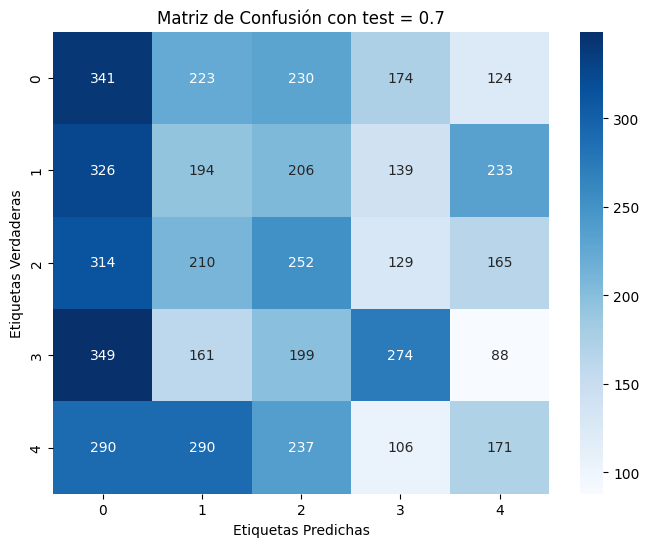

Exactitud del modelo: 0.2270967741935484
Precisión del modelo: 0.2329738480399645
Recall del modelo: 0.2270967741935484
Puntuación F1 del modelo: 0.22594988793390747
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_4_estimators/matriz_confusion_test_0.8.png


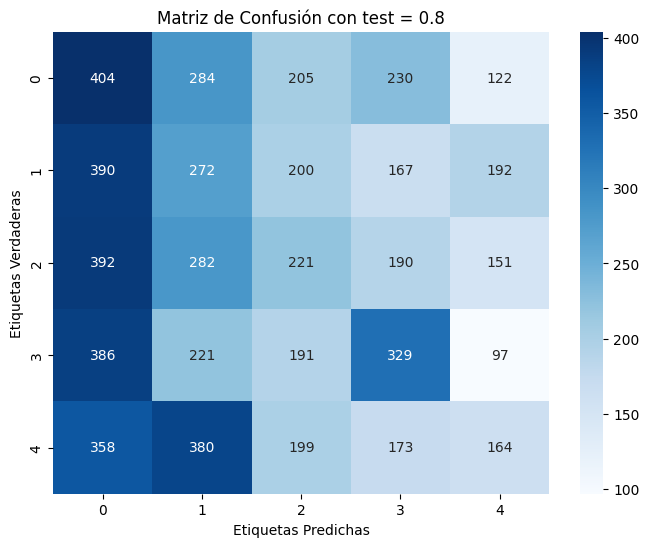

Exactitud del modelo: 0.22419354838709676
Precisión del modelo: 0.22868307966442727
Recall del modelo: 0.22419354838709676
Puntuación F1 del modelo: 0.22036679010142154
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_4_estimators/matriz_confusion_test_0.9.png


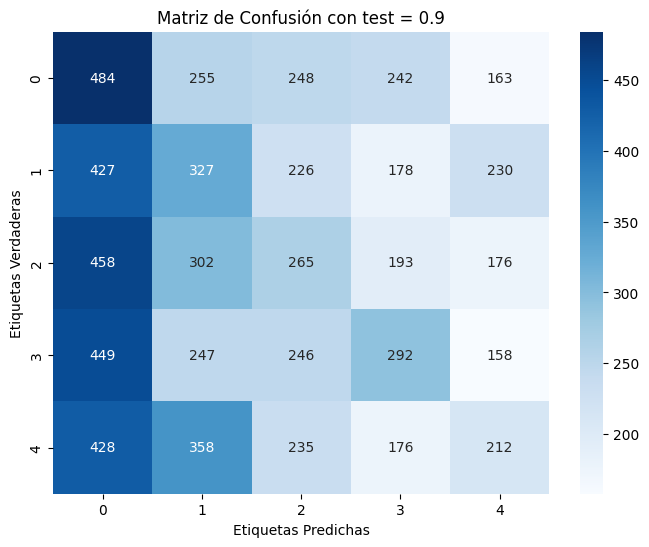

Exactitud del modelo: 0.22652329749103942
Precisión del modelo: 0.2296347890209605
Recall del modelo: 0.22652329749103942
Puntuación F1 del modelo: 0.2224661219522137
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_4_estimators/random_forest_gemini_embedding_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Se creó la carpeta Random_Forest_val_cruz_4_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_4_estimators/matriz_confusion_cv_2.png


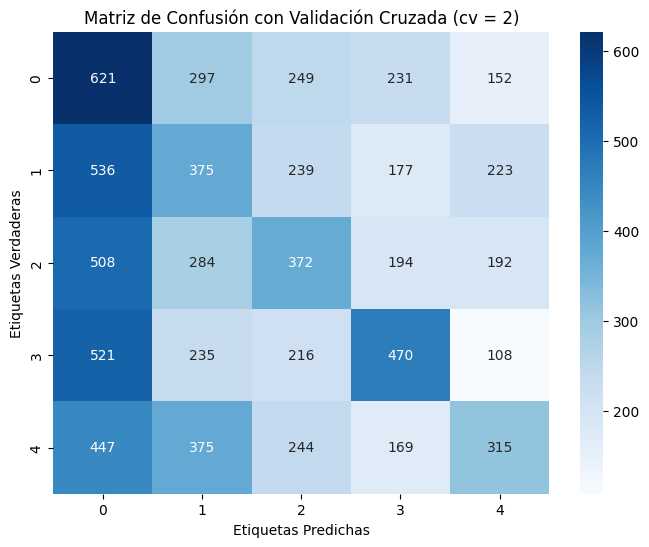

Exactitud media: 0.27780645161290324
Precisión media: 0.29080861486124593
Recall media: 0.27780645161290324
Puntuación F1 media: 0.27633421557712445
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_4_estimators/matriz_confusion_cv_3.png


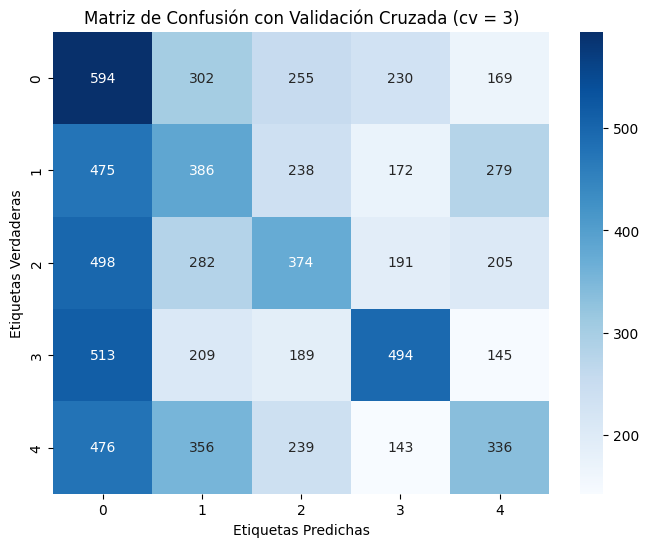

Exactitud media: 0.28180645161290324
Precisión media: 0.2941171131204667
Recall media: 0.28180645161290324
Puntuación F1 media: 0.28165229126977637
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_4_estimators/matriz_confusion_cv_4.png


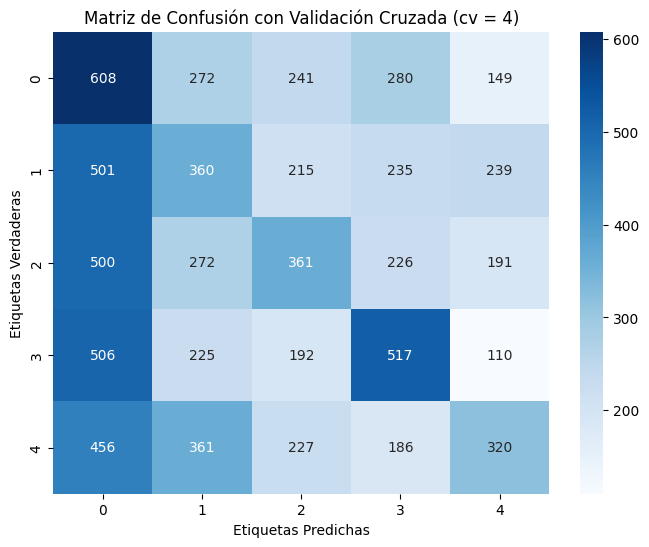

Exactitud media: 0.2794838709677419
Precisión media: 0.2890689447769815
Recall media: 0.2794838709677419
Puntuación F1 media: 0.2773048199322032
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_4_estimators/matriz_confusion_cv_5.png


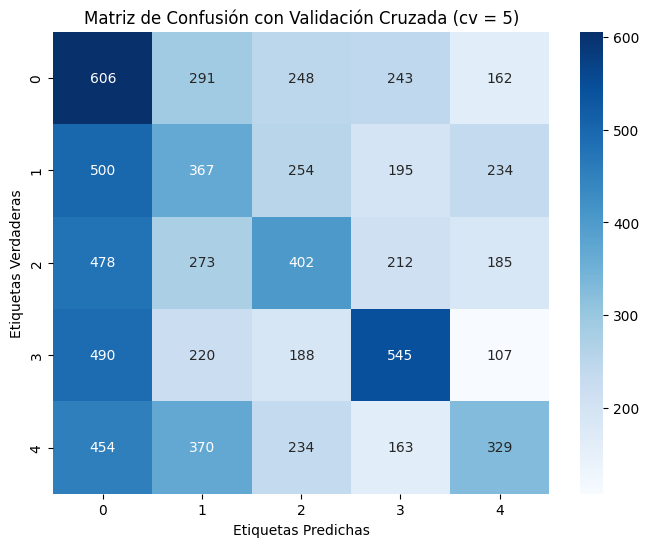

Exactitud media: 0.29019354838709677
Precisión media: 0.30179944137581177
Recall media: 0.29019354838709677
Puntuación F1 media: 0.2893855902182929
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_4_estimators/matriz_confusion_cv_6.png


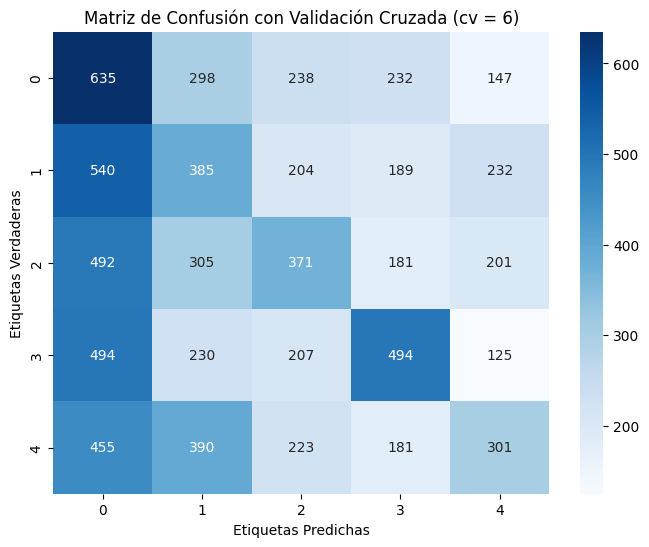

Exactitud media: 0.28206451612903227
Precisión media: 0.29333704824096934
Recall media: 0.28206451612903227
Puntuación F1 media: 0.2798698974938641
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_4_estimators/matriz_confusion_cv_7.png


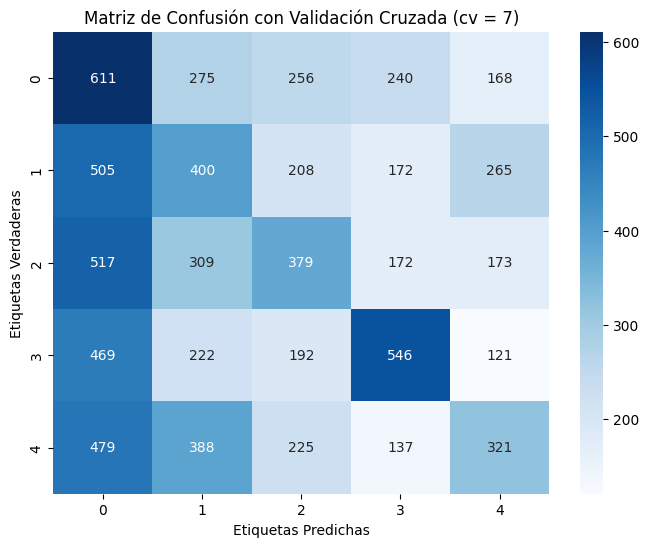

Exactitud media: 0.2912258064516129
Precisión media: 0.3051403131453592
Recall media: 0.2912258064516129
Puntuación F1 media: 0.2909551128513645
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_4_estimators/matriz_confusion_cv_8.png


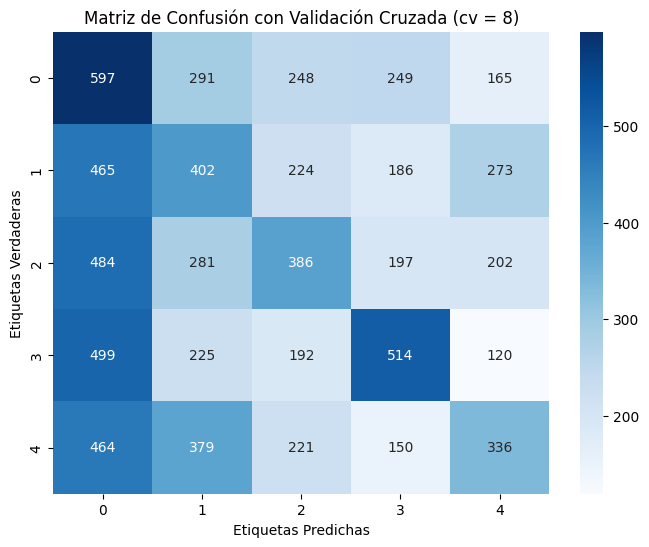

Exactitud media: 0.28838709677419355
Precisión media: 0.2999136824966544
Recall media: 0.28838709677419355
Puntuación F1 media: 0.288006632302594
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_4_estimators/matriz_confusion_cv_9.png


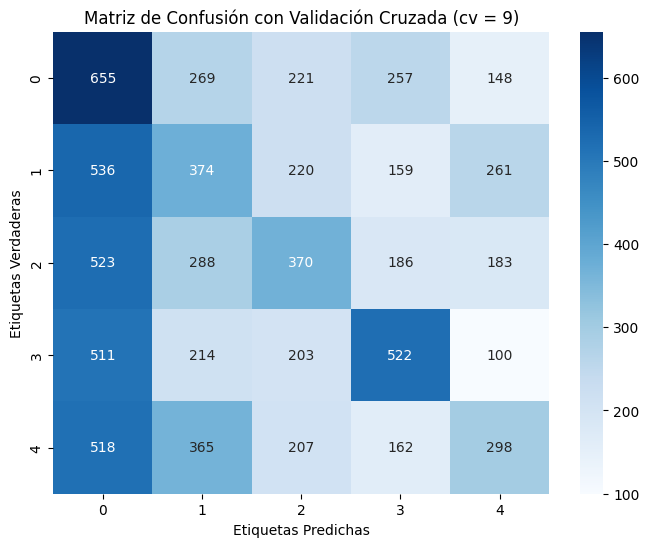

Exactitud media: 0.2863225806451613
Precisión media: 0.2992843934881986
Recall media: 0.2863225806451613
Puntuación F1 media: 0.283882750668352
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_4_estimators/matriz_confusion_cv_10.png


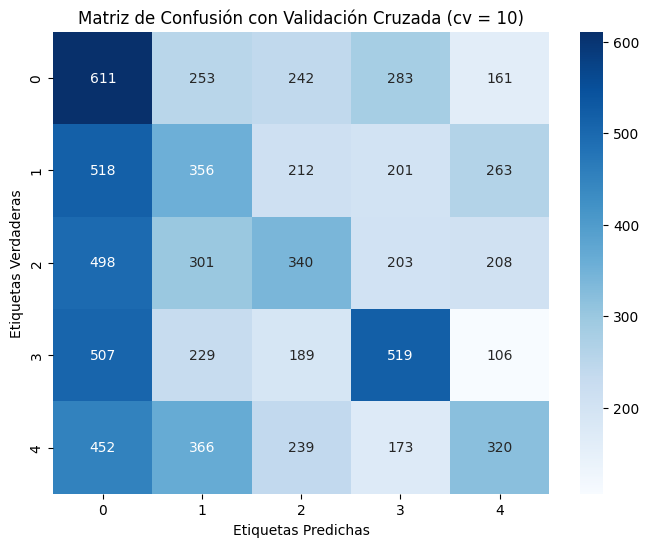

Exactitud media: 0.2769032258064516
Precisión media: 0.285973327869877
Recall media: 0.2769032258064516
Puntuación F1 media: 0.27472225661799077
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_4_estimators/random_forest_gemini_embedding_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Se creó la carpeta Random_Forest_val_sim_5_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_5_estimators/matriz_confusion_test_0.1.png


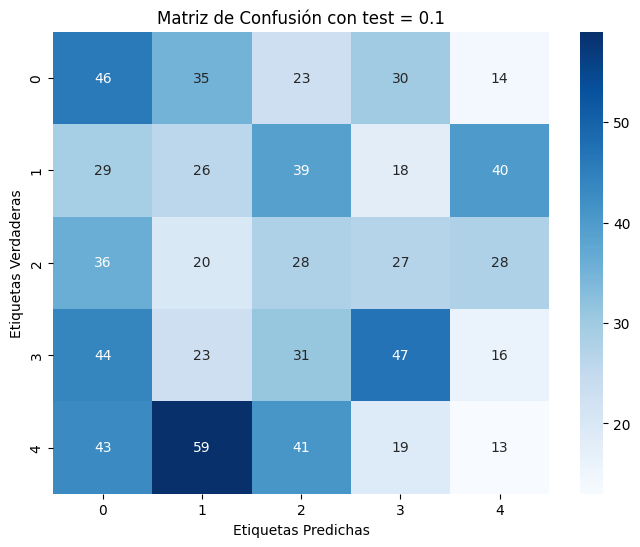

Exactitud del modelo: 0.2064516129032258
Precisión del modelo: 0.2023433428090727
Recall del modelo: 0.2064516129032258
Puntuación F1 del modelo: 0.20171200445801263
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_5_estimators/matriz_confusion_test_0.2.png


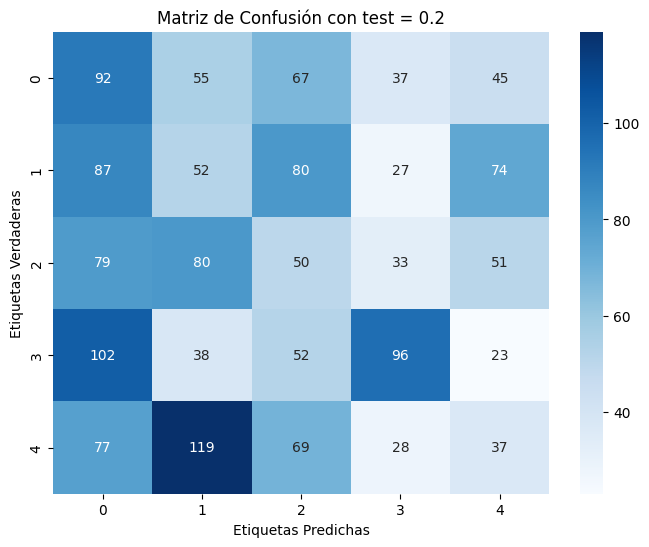

Exactitud del modelo: 0.21096774193548387
Precisión del modelo: 0.22254131873100041
Recall del modelo: 0.21096774193548387
Puntuación F1 del modelo: 0.2117582352989096
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_5_estimators/matriz_confusion_test_0.3.png


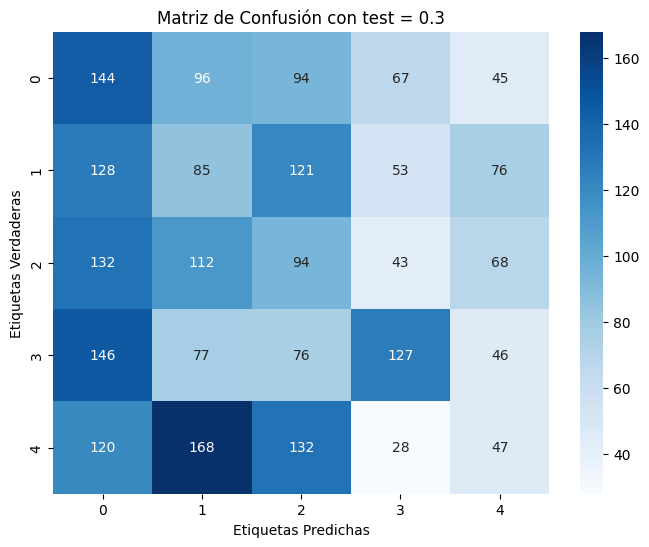

Exactitud del modelo: 0.21376344086021506
Precisión del modelo: 0.22436420745341076
Recall del modelo: 0.21376344086021506
Puntuación F1 del modelo: 0.2119364720467658
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_5_estimators/matriz_confusion_test_0.4.png


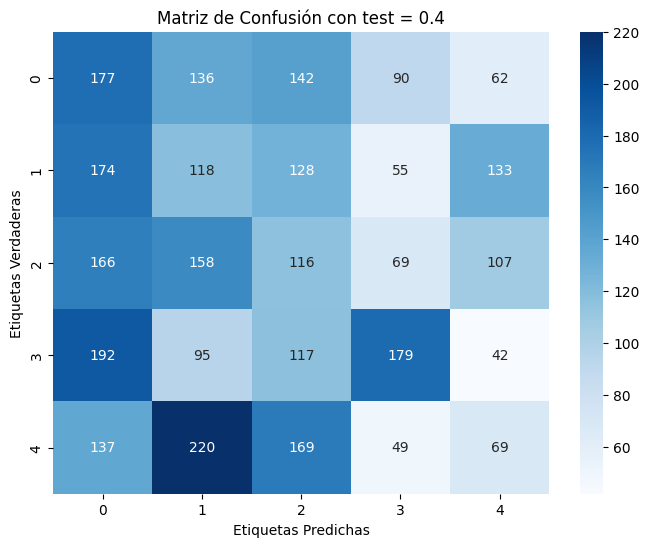

Exactitud del modelo: 0.21258064516129033
Precisión del modelo: 0.22345770134810047
Recall del modelo: 0.21258064516129033
Puntuación F1 del modelo: 0.21293660877800233
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_5_estimators/matriz_confusion_test_0.5.png


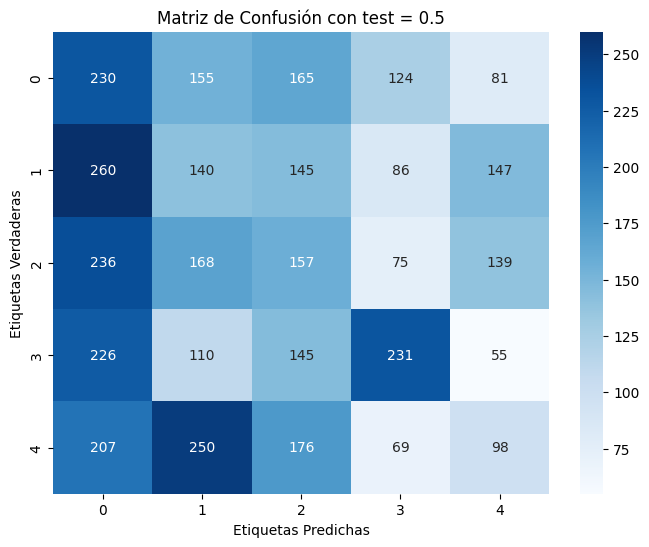

Exactitud del modelo: 0.2209032258064516
Precisión del modelo: 0.22973375802283166
Recall del modelo: 0.2209032258064516
Puntuación F1 del modelo: 0.22041177431945236
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_5_estimators/matriz_confusion_test_0.6.png


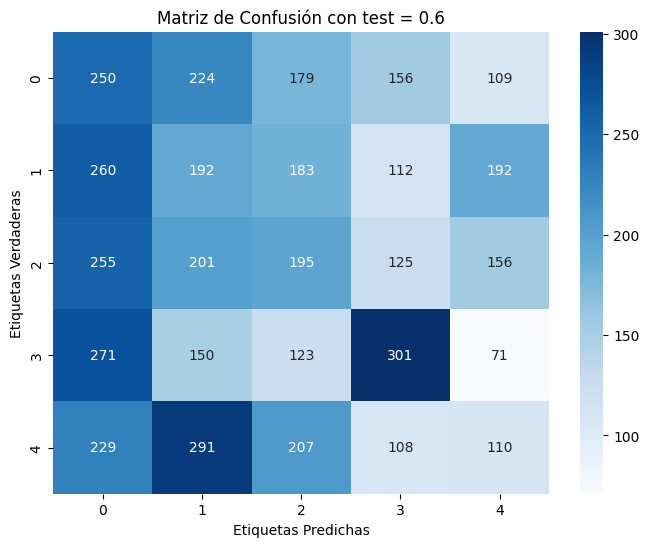

Exactitud del modelo: 0.2253763440860215
Precisión del modelo: 0.22869611393818046
Recall del modelo: 0.2253763440860215
Puntuación F1 del modelo: 0.22429035760427013
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_5_estimators/matriz_confusion_test_0.7.png


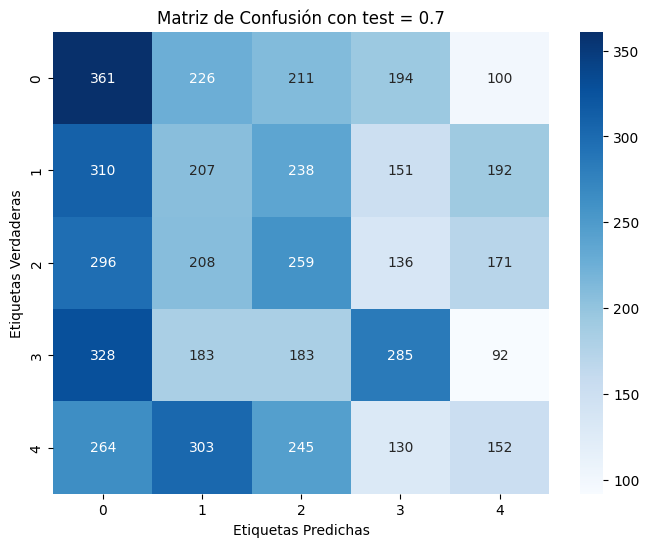

Exactitud del modelo: 0.23299539170506914
Precisión del modelo: 0.23490402780533956
Recall del modelo: 0.23299539170506914
Puntuación F1 del modelo: 0.23004186985146388
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_5_estimators/matriz_confusion_test_0.8.png


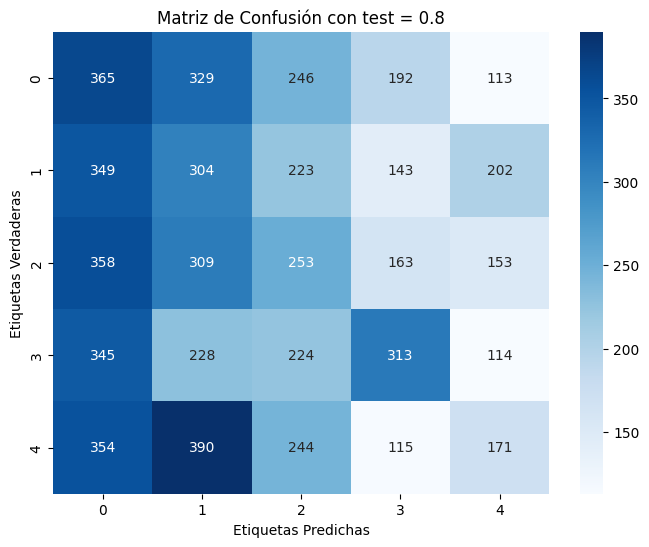

Exactitud del modelo: 0.2267741935483871
Precisión del modelo: 0.23554084145175888
Recall del modelo: 0.2267741935483871
Puntuación F1 del modelo: 0.22539004248265684
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_5_estimators/matriz_confusion_test_0.9.png


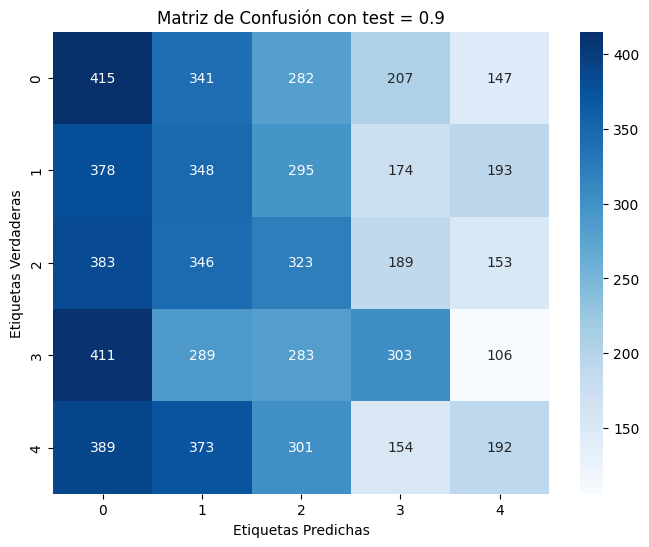

Exactitud del modelo: 0.22666666666666666
Precisión del modelo: 0.2341345252953138
Recall del modelo: 0.22666666666666666
Puntuación F1 del modelo: 0.22419169385456067
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_5_estimators/random_forest_gemini_embedding_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Se creó la carpeta Random_Forest_val_cruz_5_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_5_estimators/matriz_confusion_cv_2.png


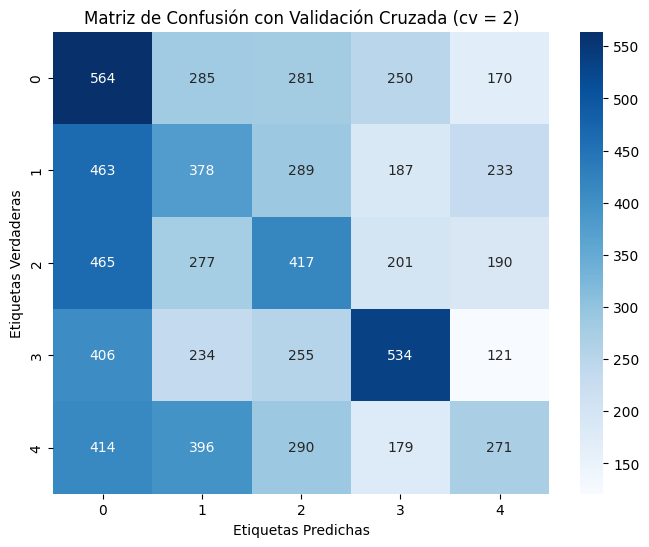

Exactitud media: 0.2792258064516129
Precisión media: 0.28545837024994103
Recall media: 0.2792258064516129
Puntuación F1 media: 0.2773886922066899
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_5_estimators/matriz_confusion_cv_3.png


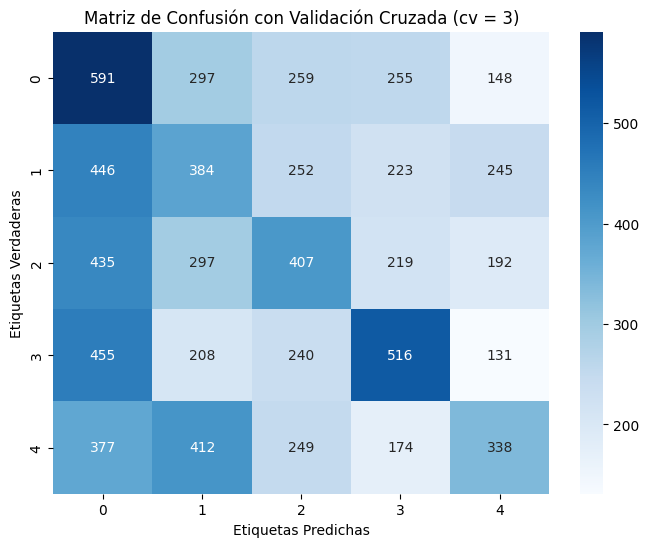

Exactitud media: 0.28851612903225804
Precisión media: 0.2957575610748067
Recall media: 0.28851612903225804
Puntuación F1 media: 0.28738346738792797
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_5_estimators/matriz_confusion_cv_4.png


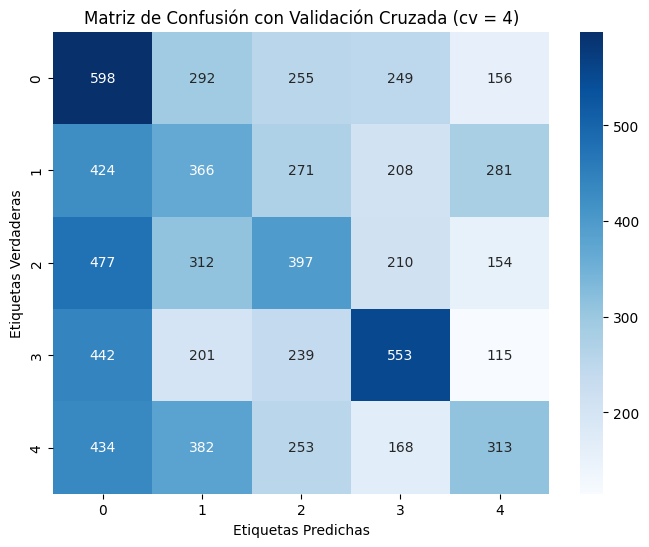

Exactitud media: 0.28735483870967743
Precisión media: 0.2947213215281986
Recall media: 0.28735483870967743
Puntuación F1 media: 0.285705230922281
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_5_estimators/matriz_confusion_cv_5.png


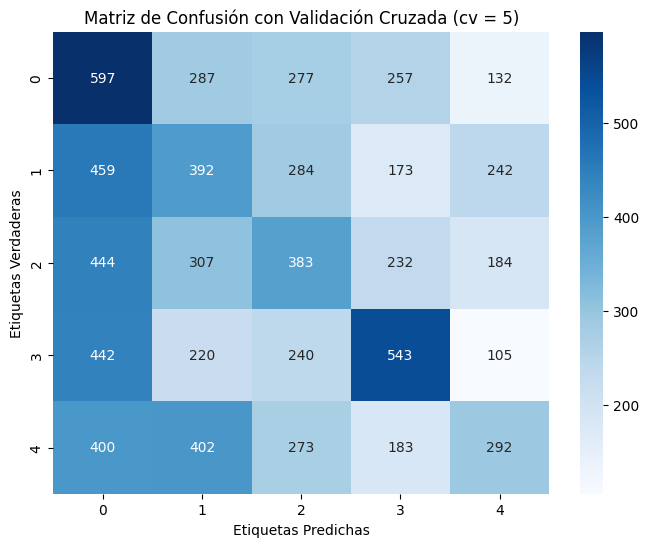

Exactitud media: 0.2847741935483871
Precisión media: 0.2917059746472029
Recall media: 0.2847741935483871
Puntuación F1 media: 0.28251068432985516
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_5_estimators/matriz_confusion_cv_6.png


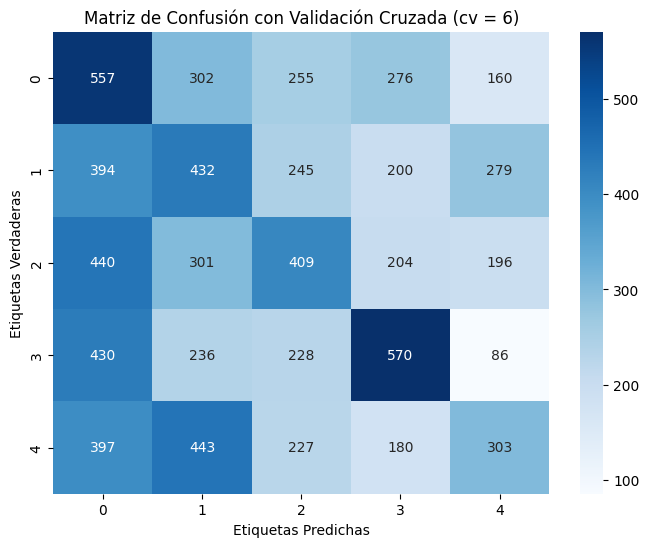

Exactitud media: 0.2930322580645161
Precisión media: 0.29950447142111286
Recall media: 0.2930322580645161
Puntuación F1 media: 0.29180976144224047
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_5_estimators/matriz_confusion_cv_7.png


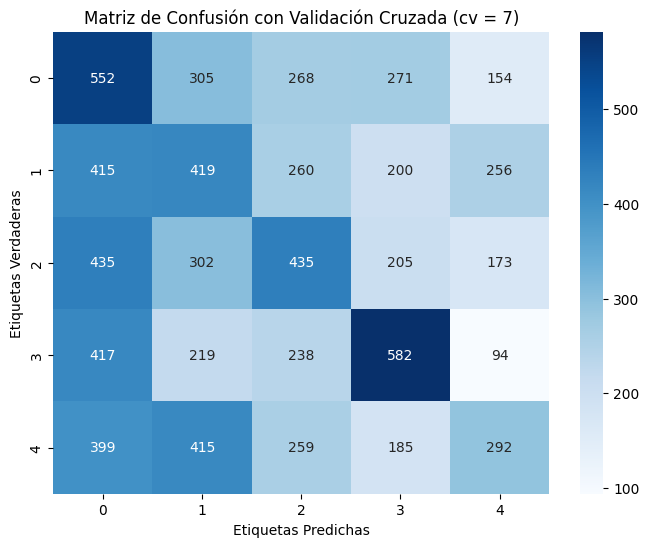

Exactitud media: 0.29419354838709677
Precisión media: 0.3007791390116754
Recall media: 0.29419354838709677
Puntuación F1 media: 0.2927669694275822
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_5_estimators/matriz_confusion_cv_8.png


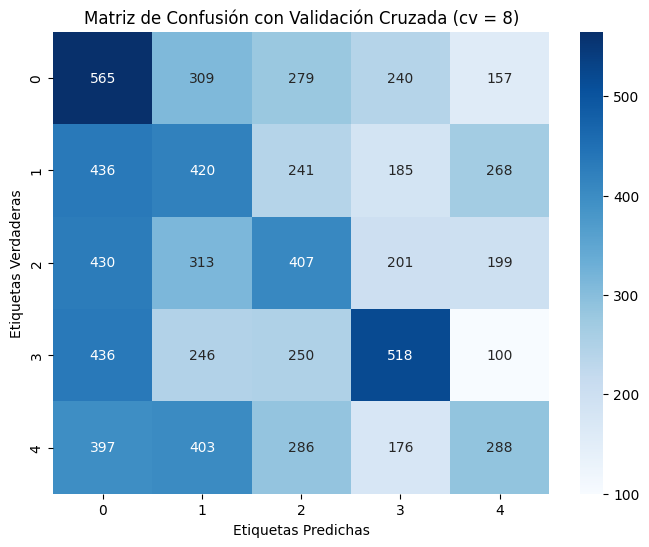

Exactitud media: 0.28361290322580646
Precisión media: 0.2906273517234518
Recall media: 0.28361290322580646
Puntuación F1 media: 0.28228374693367225
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_5_estimators/matriz_confusion_cv_9.png


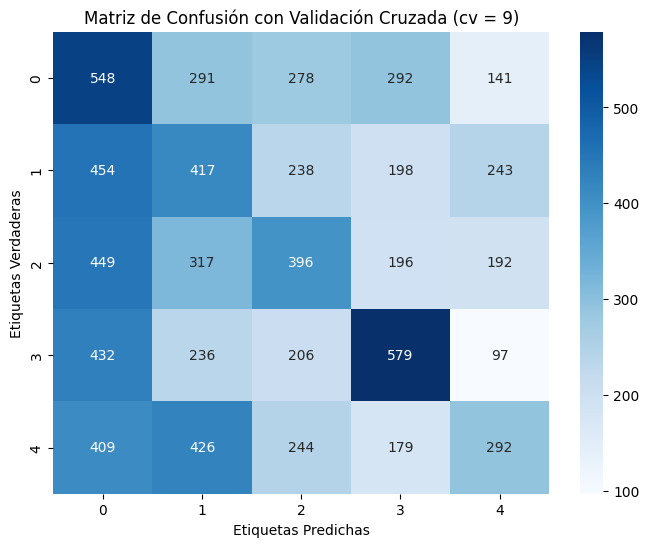

Exactitud media: 0.288
Precisión media: 0.29611718957904104
Recall media: 0.288
Puntuación F1 media: 0.2867744773083184
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_5_estimators/matriz_confusion_cv_10.png


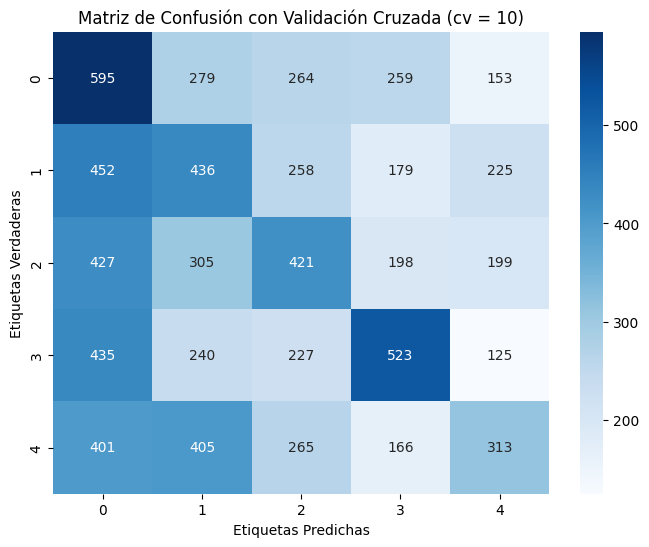

Exactitud media: 0.2952258064516129
Precisión media: 0.30318175514938295
Recall media: 0.2952258064516129
Puntuación F1 media: 0.2938952982166124
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_5_estimators/random_forest_gemini_embedding_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Se creó la carpeta Random_Forest_val_sim_6_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_6_estimators/matriz_confusion_test_0.1.png


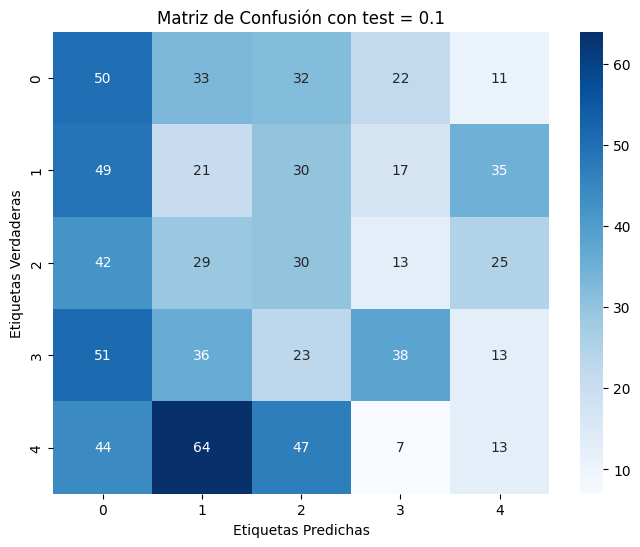

Exactitud del modelo: 0.19612903225806452
Precisión del modelo: 0.20782589560106646
Recall del modelo: 0.19612903225806452
Puntuación F1 del modelo: 0.19285202844672036
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_6_estimators/matriz_confusion_test_0.2.png


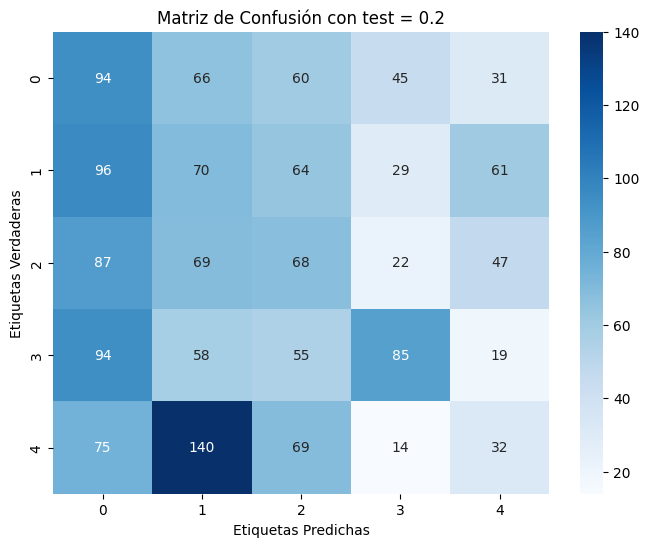

Exactitud del modelo: 0.22516129032258064
Precisión del modelo: 0.24010481265741918
Recall del modelo: 0.22516129032258064
Puntuación F1 del modelo: 0.22419016092506144
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_6_estimators/matriz_confusion_test_0.3.png


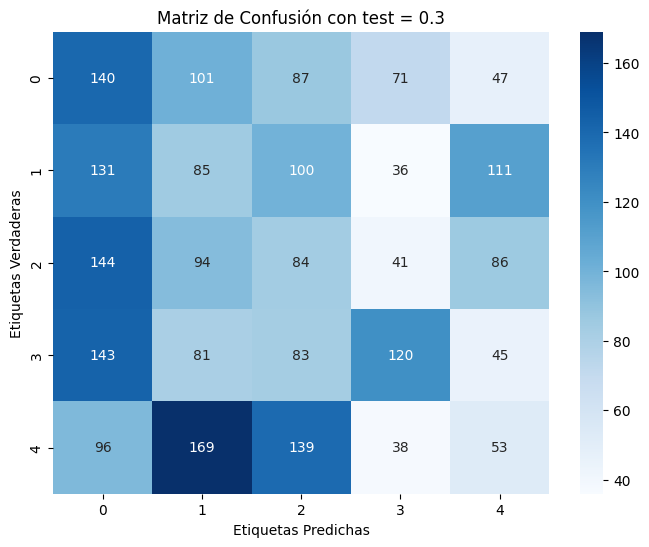

Exactitud del modelo: 0.20731182795698924
Precisión del modelo: 0.21851197041942566
Recall del modelo: 0.20731182795698924
Puntuación F1 del modelo: 0.20695090106653222
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_6_estimators/matriz_confusion_test_0.4.png


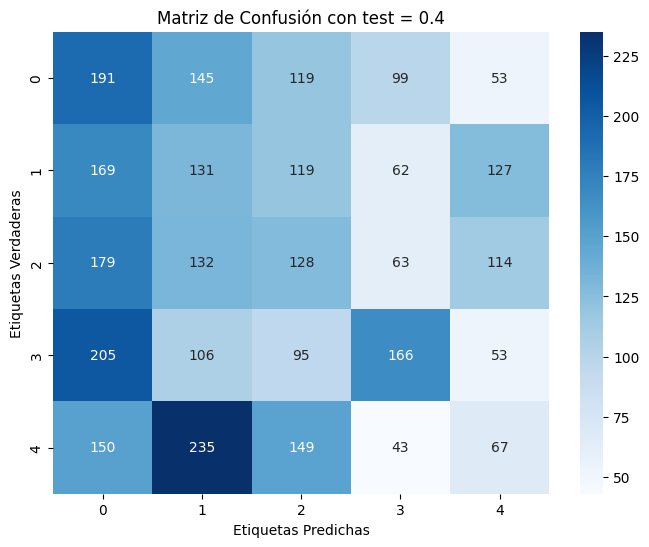

Exactitud del modelo: 0.2203225806451613
Precisión del modelo: 0.22874554610682338
Recall del modelo: 0.2203225806451613
Puntuación F1 del modelo: 0.21876917593061987
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_6_estimators/matriz_confusion_test_0.5.png


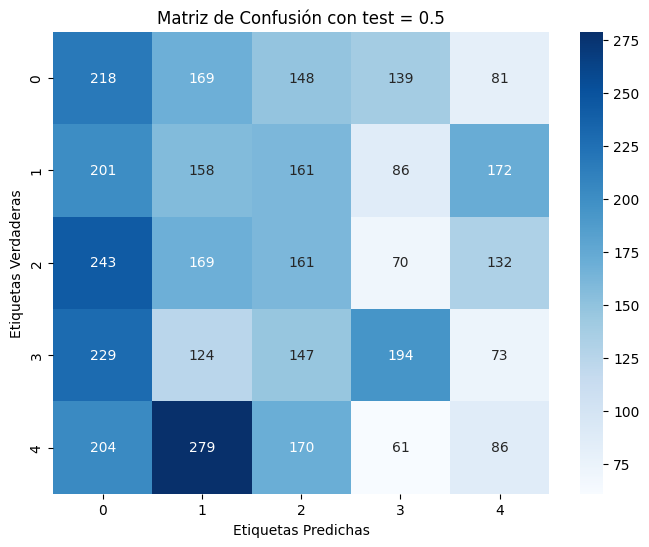

Exactitud del modelo: 0.21083870967741936
Precisión del modelo: 0.21744572019607872
Recall del modelo: 0.21083870967741936
Puntuación F1 del modelo: 0.20971462311971203
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_6_estimators/matriz_confusion_test_0.6.png


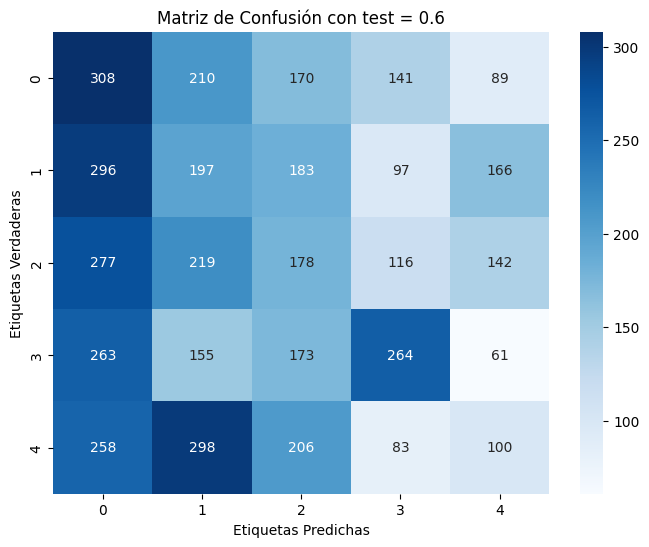

Exactitud del modelo: 0.22516129032258064
Precisión del modelo: 0.23005147766509268
Recall del modelo: 0.22516129032258064
Puntuación F1 del modelo: 0.2219471665428118
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_6_estimators/matriz_confusion_test_0.7.png


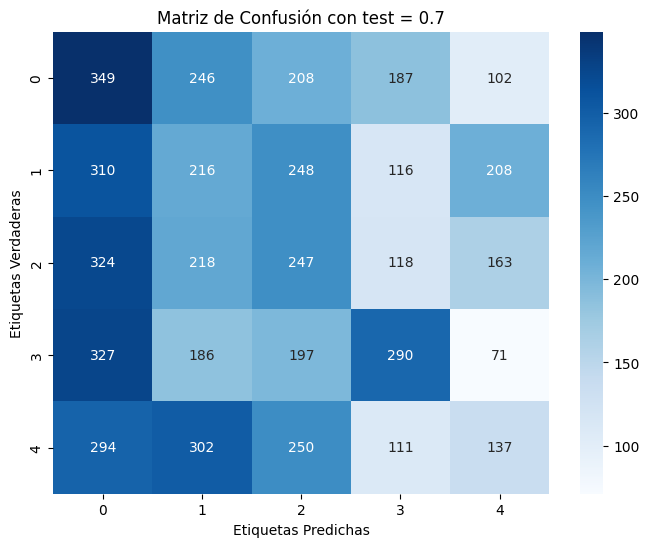

Exactitud del modelo: 0.22838709677419355
Precisión del modelo: 0.23380692603932188
Recall del modelo: 0.22838709677419355
Puntuación F1 del modelo: 0.22620645836560438
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_6_estimators/matriz_confusion_test_0.8.png


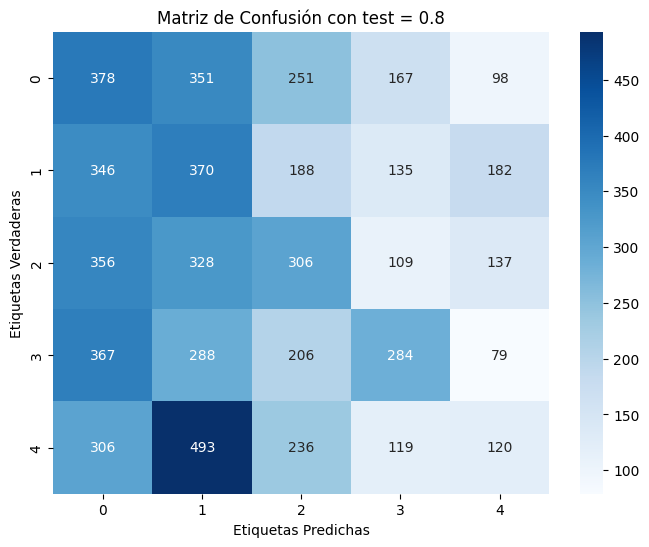

Exactitud del modelo: 0.23516129032258065
Precisión del modelo: 0.24341757772639216
Recall del modelo: 0.23516129032258065
Puntuación F1 del modelo: 0.22987020086344342
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_6_estimators/matriz_confusion_test_0.9.png


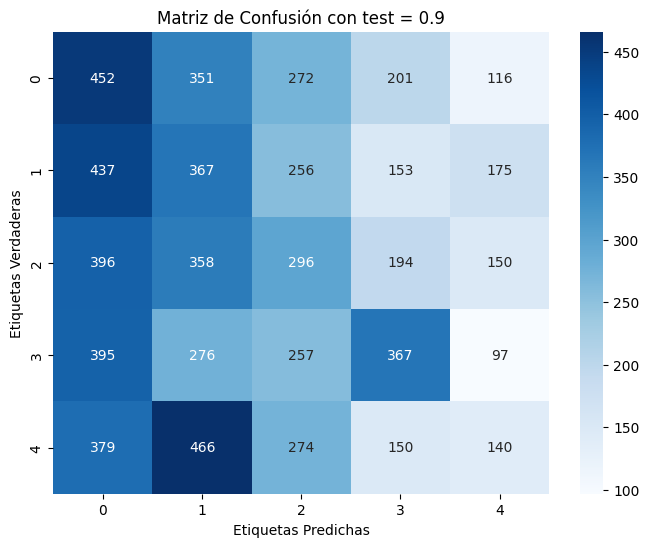

Exactitud del modelo: 0.23254480286738352
Precisión del modelo: 0.23812491776500014
Recall del modelo: 0.23254480286738352
Puntuación F1 del modelo: 0.2275978890800181
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_6_estimators/random_forest_gemini_embedding_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Se creó la carpeta Random_Forest_val_cruz_6_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_6_estimators/matriz_confusion_cv_2.png


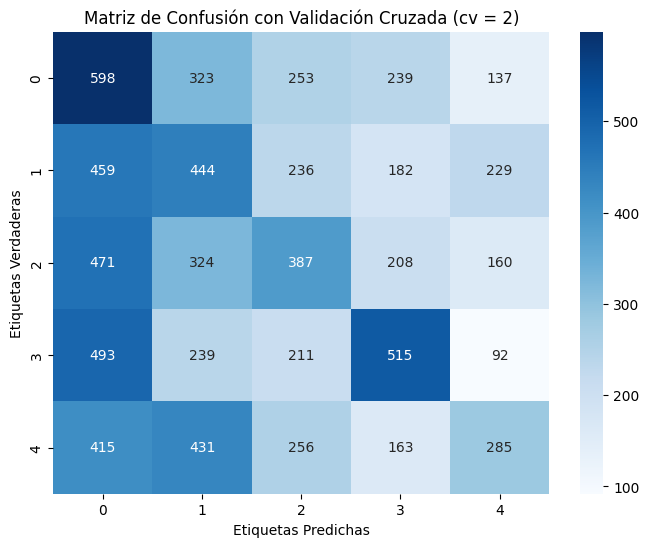

Exactitud media: 0.28761290322580646
Precisión media: 0.299084291820269
Recall media: 0.28761290322580646
Puntuación F1 media: 0.2857351985592563
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_6_estimators/matriz_confusion_cv_3.png


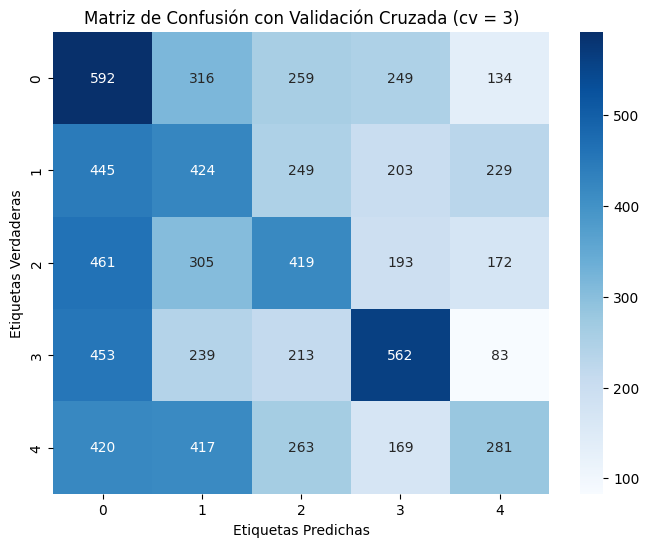

Exactitud media: 0.29393548387096774
Precisión media: 0.303718865852739
Recall media: 0.29393548387096774
Puntuación F1 media: 0.29204188090657945
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_6_estimators/matriz_confusion_cv_4.png


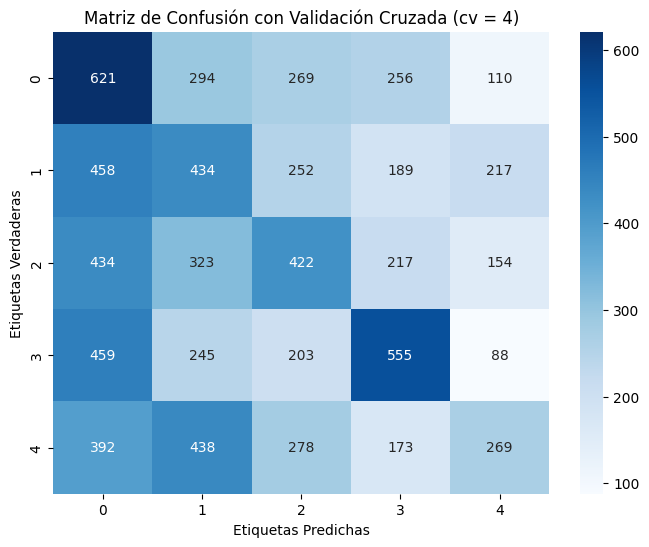

Exactitud media: 0.2969032258064516
Precisión media: 0.3059219965490951
Recall media: 0.2969032258064516
Puntuación F1 media: 0.2936542542888379
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_6_estimators/matriz_confusion_cv_5.png


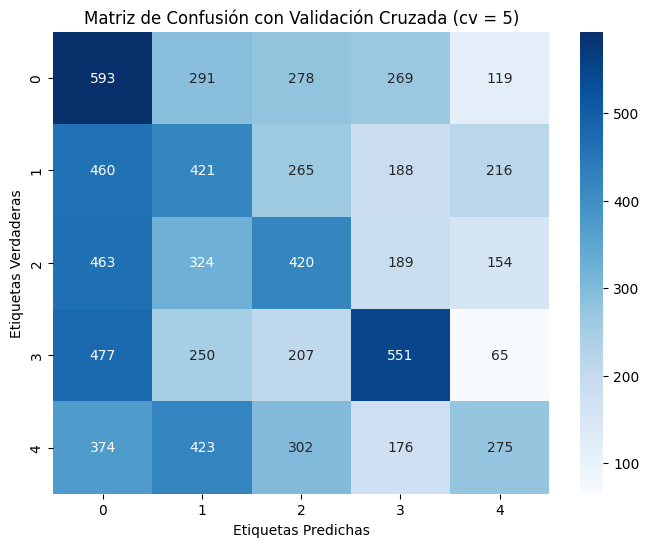

Exactitud media: 0.29161290322580646
Precisión media: 0.30304660796571087
Recall media: 0.29161290322580646
Puntuación F1 media: 0.28946106281104855
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_6_estimators/matriz_confusion_cv_6.png


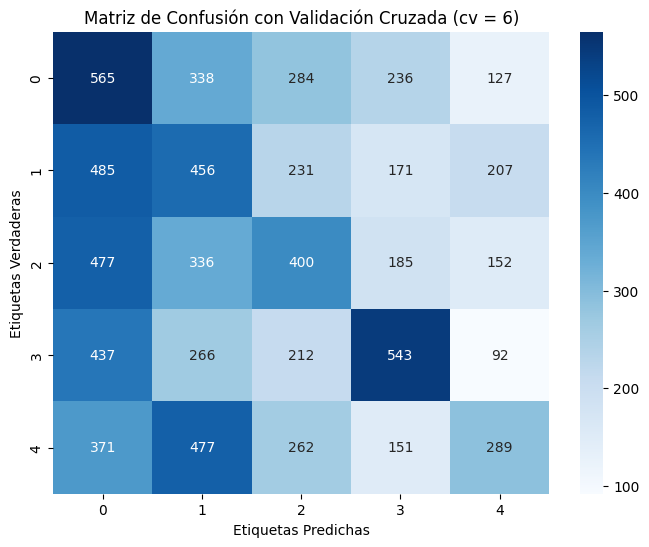

Exactitud media: 0.29070967741935483
Precisión media: 0.3057959018517672
Recall media: 0.29070967741935483
Puntuación F1 media: 0.29031396239270213
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_6_estimators/matriz_confusion_cv_7.png


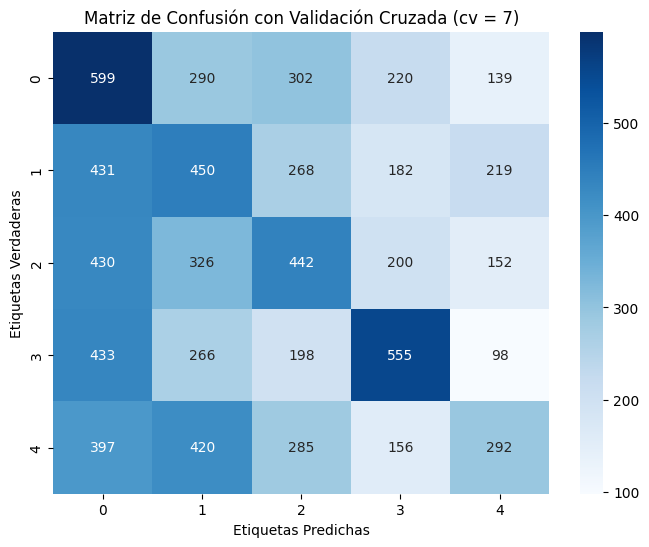

Exactitud media: 0.3016774193548387
Precisión media: 0.3122428203186301
Recall media: 0.3016774193548387
Puntuación F1 media: 0.30018515767719606
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_6_estimators/matriz_confusion_cv_8.png


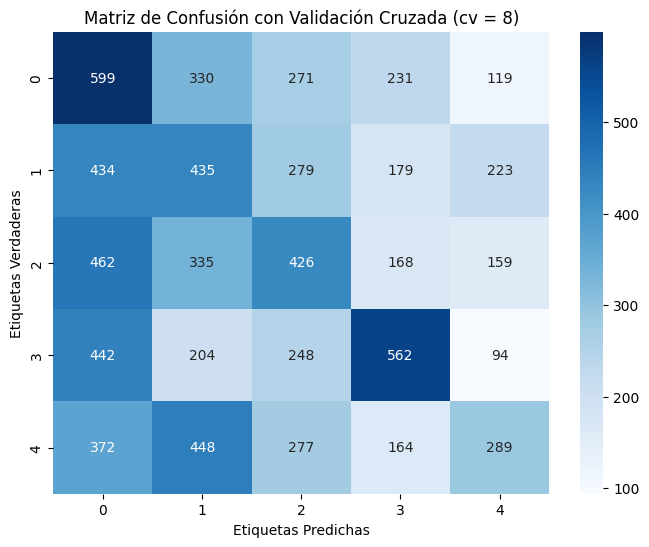

Exactitud media: 0.2981935483870968
Precisión media: 0.30988455964883993
Recall media: 0.2981935483870968
Puntuación F1 media: 0.29689498157453637
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_6_estimators/matriz_confusion_cv_9.png


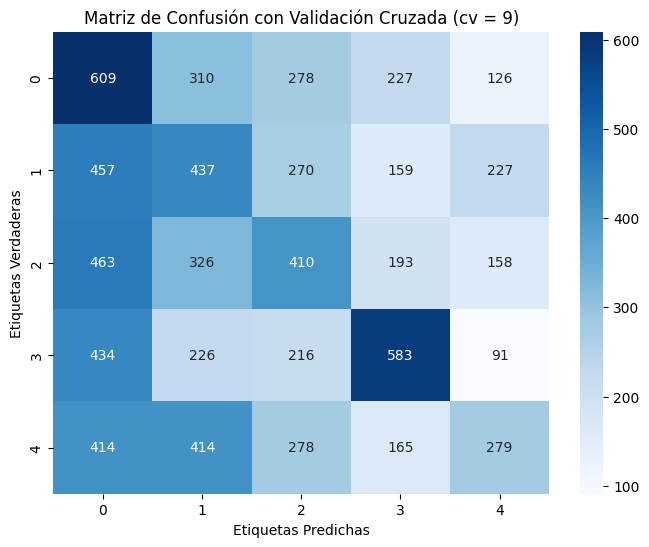

Exactitud media: 0.2990967741935484
Precisión media: 0.3099409758140855
Recall media: 0.2990967741935484
Puntuación F1 media: 0.29719635649371706
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_6_estimators/matriz_confusion_cv_10.png


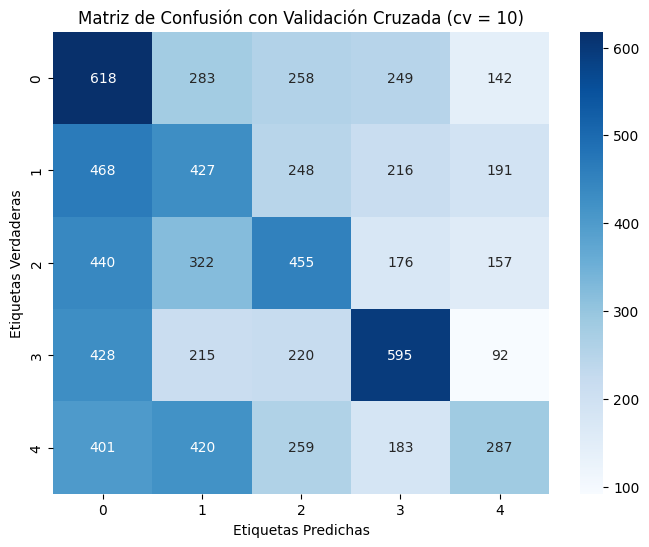

Exactitud media: 0.30735483870967745
Precisión media: 0.3168230838936694
Recall media: 0.30735483870967745
Puntuación F1 media: 0.3048852637748701
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_6_estimators/random_forest_gemini_embedding_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Se creó la carpeta Random_Forest_val_sim_7_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_7_estimators/matriz_confusion_test_0.1.png


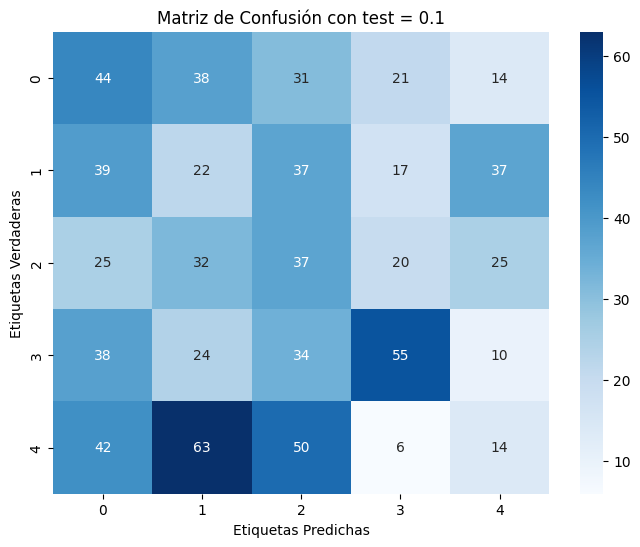

Exactitud del modelo: 0.22193548387096773
Precisión del modelo: 0.23153969940086844
Recall del modelo: 0.22193548387096773
Puntuación F1 del modelo: 0.22115520096014557
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_7_estimators/matriz_confusion_test_0.2.png


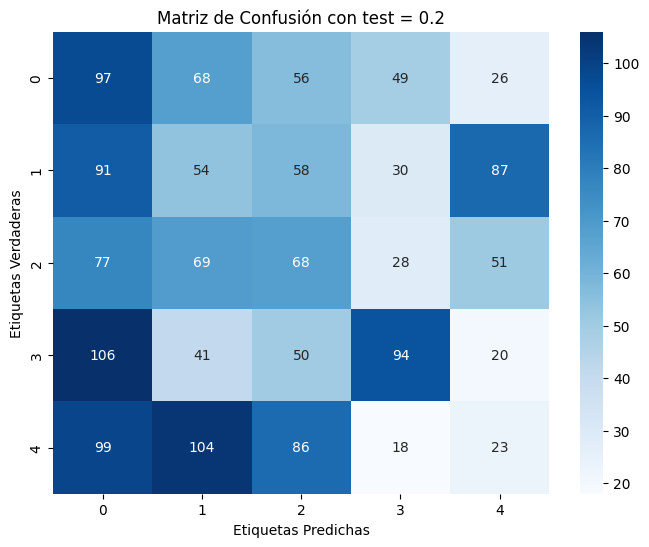

Exactitud del modelo: 0.2167741935483871
Precisión del modelo: 0.22279178859520393
Recall del modelo: 0.2167741935483871
Puntuación F1 del modelo: 0.2138398695279085
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_7_estimators/matriz_confusion_test_0.3.png


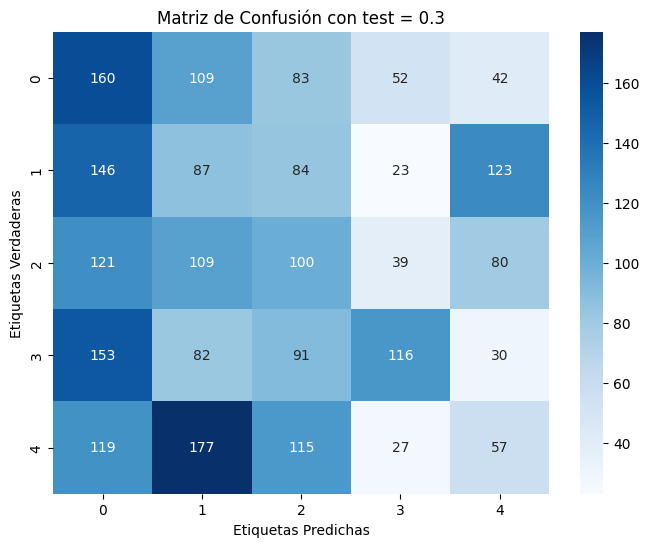

Exactitud del modelo: 0.22365591397849463
Precisión del modelo: 0.243639852236535
Recall del modelo: 0.22365591397849463
Puntuación F1 del modelo: 0.22319702973444985
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_7_estimators/matriz_confusion_test_0.4.png


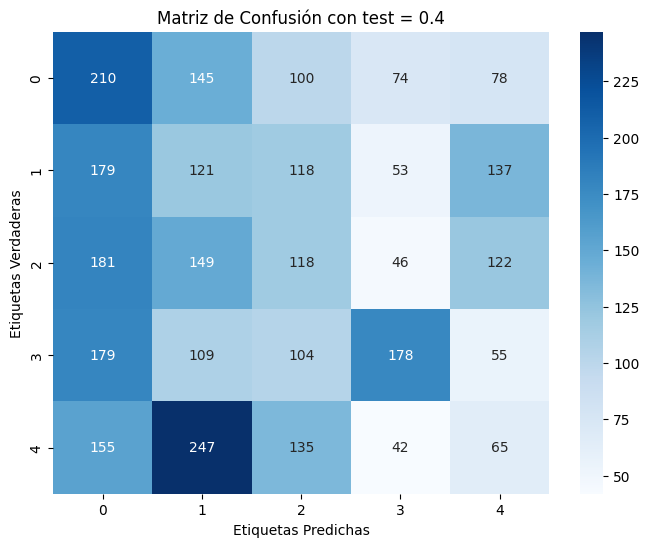

Exactitud del modelo: 0.2232258064516129
Precisión del modelo: 0.2379083036272095
Recall del modelo: 0.2232258064516129
Puntuación F1 del modelo: 0.22325426413396635
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_7_estimators/matriz_confusion_test_0.5.png


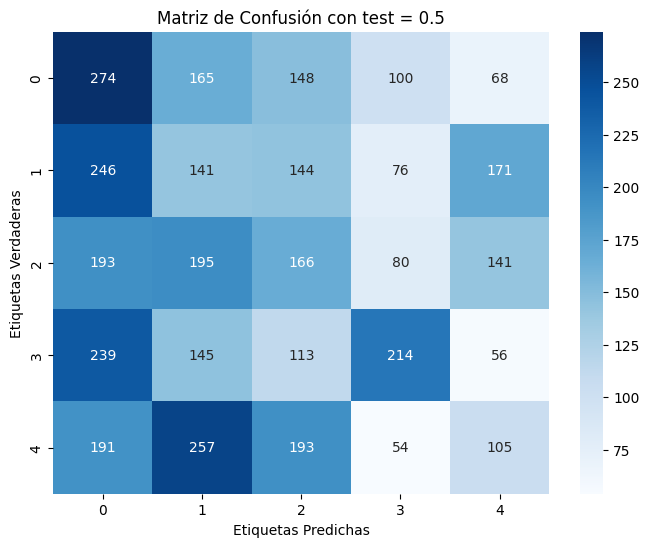

Exactitud del modelo: 0.23225806451612904
Precisión del modelo: 0.2424177771739051
Recall del modelo: 0.23225806451612904
Puntuación F1 del modelo: 0.23103201399474277
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_7_estimators/matriz_confusion_test_0.6.png


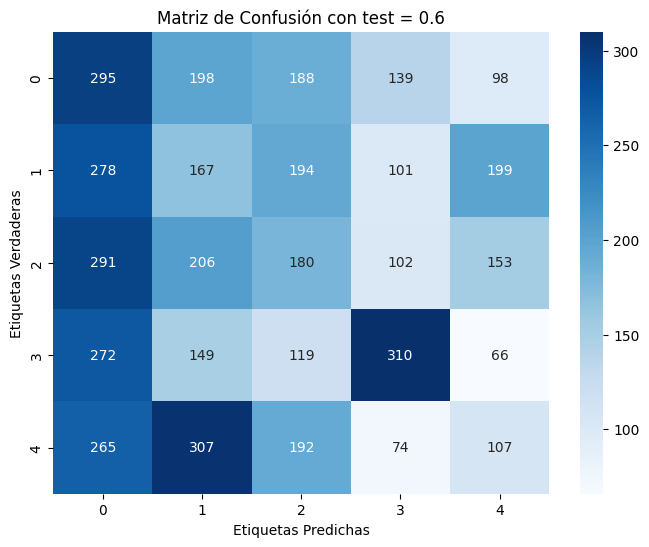

Exactitud del modelo: 0.22774193548387098
Precisión del modelo: 0.23474963454546244
Recall del modelo: 0.22774193548387098
Puntuación F1 del modelo: 0.22662586055379072
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_7_estimators/matriz_confusion_test_0.7.png


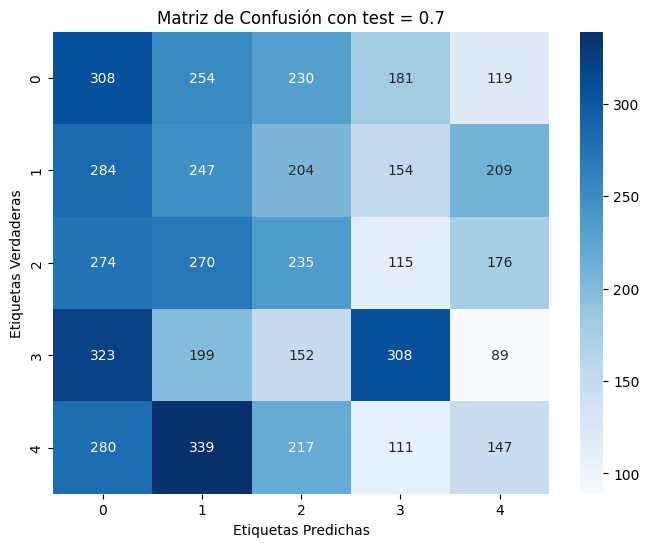

Exactitud del modelo: 0.2294930875576037
Precisión del modelo: 0.2350788294531133
Recall del modelo: 0.2294930875576037
Puntuación F1 del modelo: 0.22894362130340626
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_7_estimators/matriz_confusion_test_0.8.png


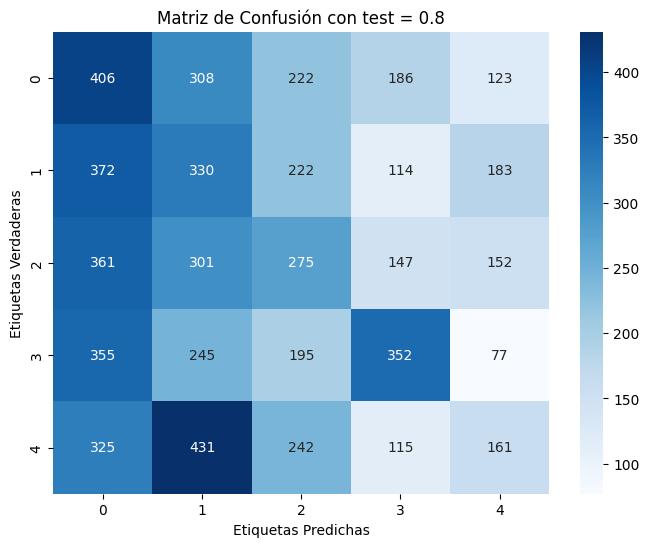

Exactitud del modelo: 0.24580645161290324
Precisión del modelo: 0.2560480944998796
Recall del modelo: 0.24580645161290324
Puntuación F1 del modelo: 0.24347874715973725
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_7_estimators/matriz_confusion_test_0.9.png


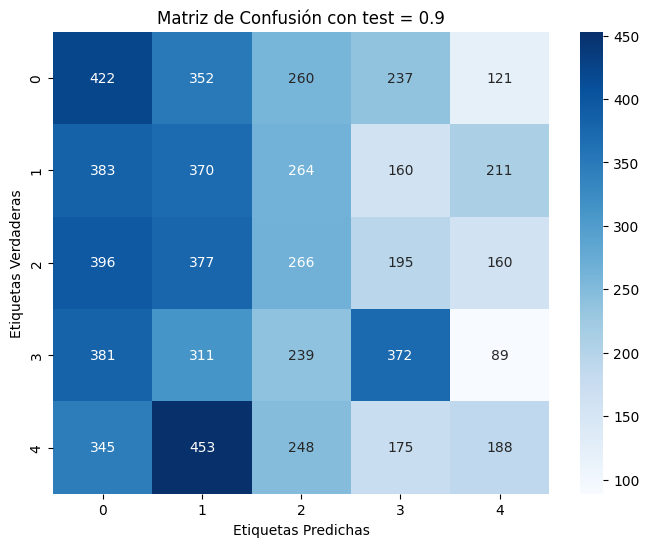

Exactitud del modelo: 0.23197132616487456
Precisión del modelo: 0.23942165123841583
Recall del modelo: 0.23197132616487456
Puntuación F1 del modelo: 0.22939020363743845
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_7_estimators/random_forest_gemini_embedding_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Se creó la carpeta Random_Forest_val_cruz_7_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_7_estimators/matriz_confusion_cv_2.png


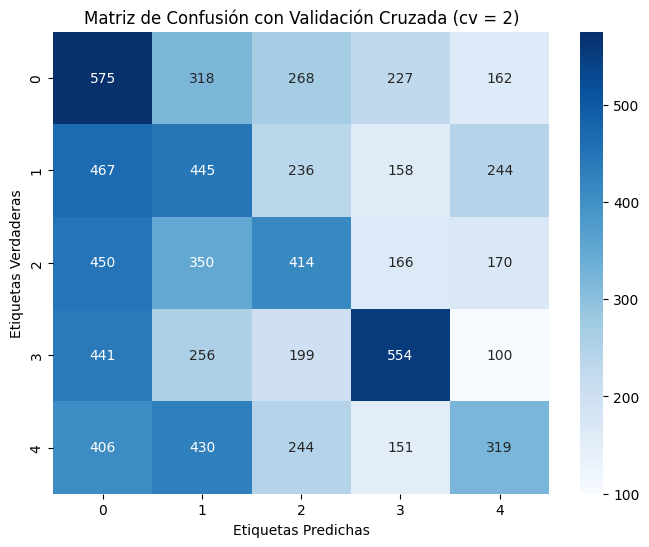

Exactitud media: 0.2976774193548387
Precisión media: 0.3118130221605473
Recall media: 0.2976774193548387
Puntuación F1 media: 0.29829018144931374
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_7_estimators/matriz_confusion_cv_3.png


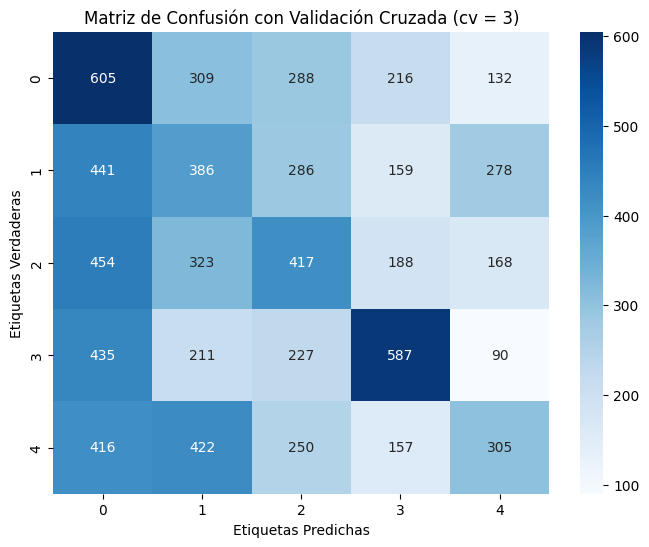

Exactitud media: 0.2967741935483871
Precisión media: 0.30755571689280625
Recall media: 0.2967741935483871
Puntuación F1 media: 0.29607793377610064
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_7_estimators/matriz_confusion_cv_4.png


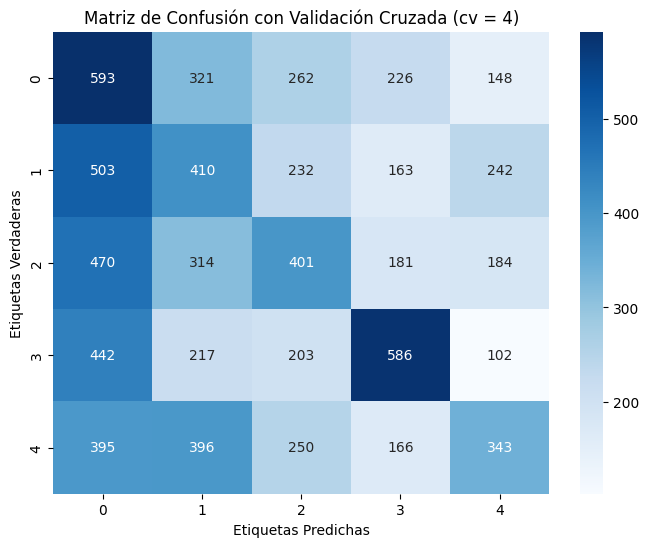

Exactitud media: 0.3010322580645161
Precisión media: 0.31428215729926967
Recall media: 0.3010322580645161
Puntuación F1 media: 0.30149736361651985
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_7_estimators/matriz_confusion_cv_5.png


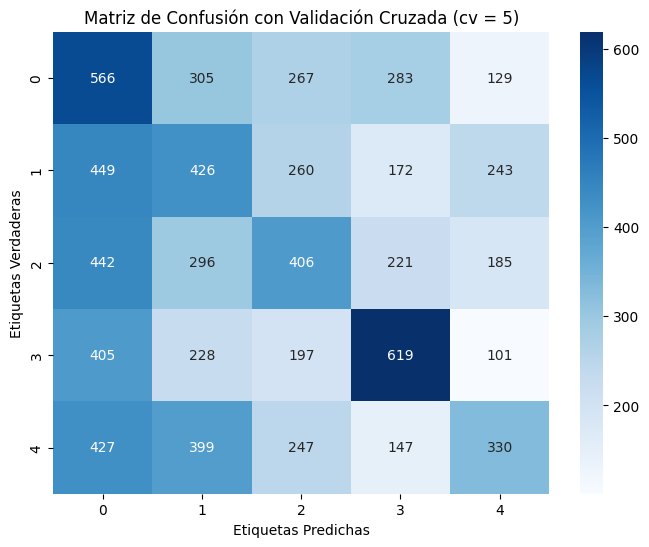

Exactitud media: 0.3028387096774194
Precisión media: 0.3125887714048235
Recall media: 0.3028387096774194
Puntuación F1 media: 0.30240410875783735
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_7_estimators/matriz_confusion_cv_6.png


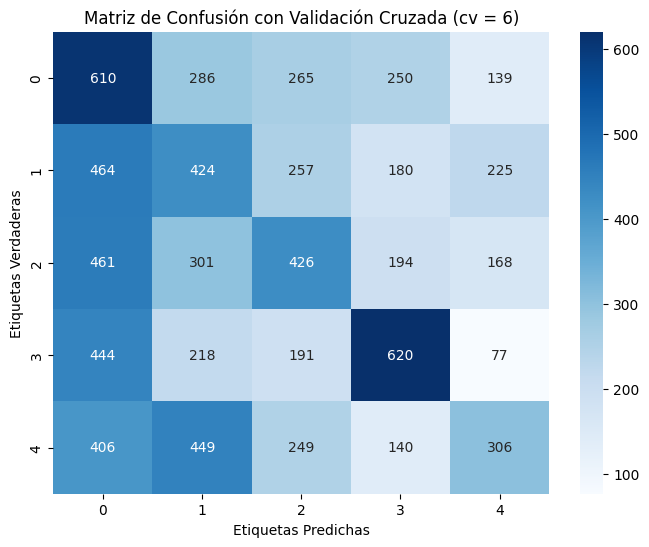

Exactitud media: 0.3078709677419355
Precisión media: 0.31955329956001505
Recall media: 0.3078709677419355
Puntuación F1 media: 0.3067279514816566
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_7_estimators/matriz_confusion_cv_7.png


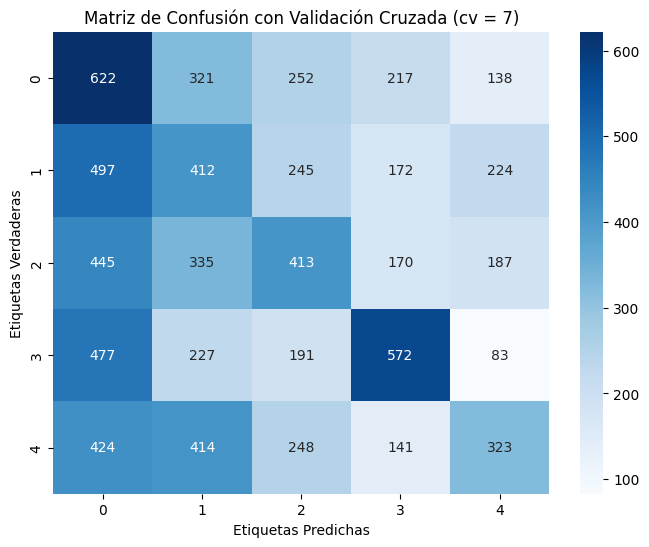

Exactitud media: 0.3021935483870968
Precisión media: 0.31749348916027087
Recall media: 0.3021935483870968
Puntuación F1 media: 0.30217454399434956
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_7_estimators/matriz_confusion_cv_8.png


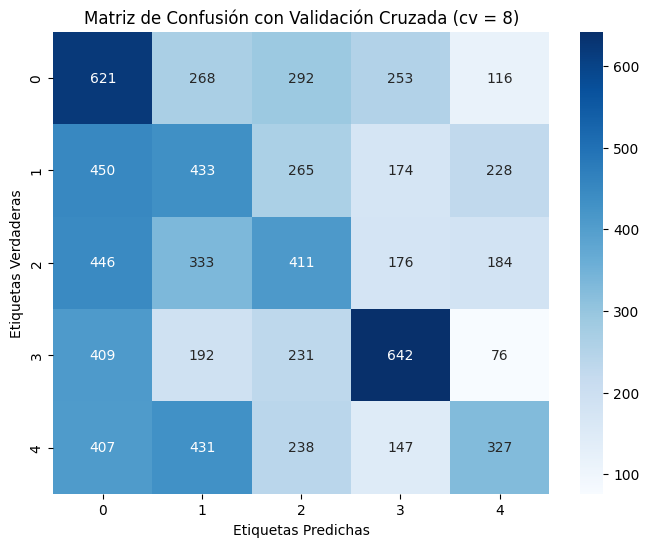

Exactitud media: 0.31406451612903225
Precisión media: 0.325190233444667
Recall media: 0.31406451612903225
Puntuación F1 media: 0.31302475311324346
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_7_estimators/matriz_confusion_cv_9.png


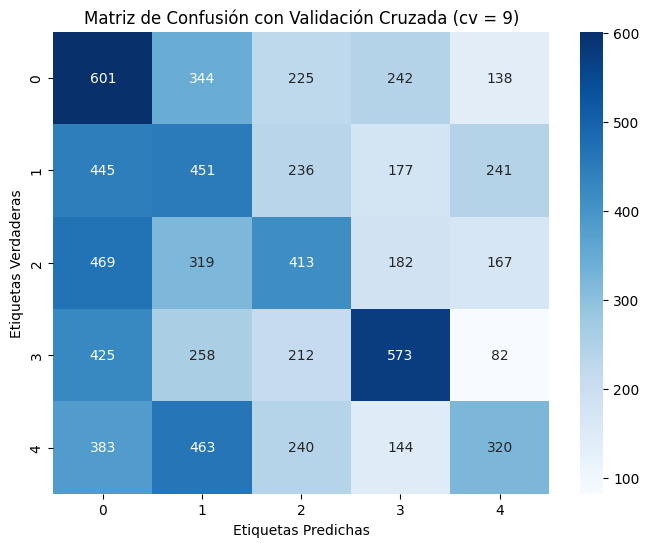

Exactitud media: 0.304258064516129
Precisión media: 0.31765183056669066
Recall media: 0.304258064516129
Puntuación F1 media: 0.30396289097263857
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_7_estimators/matriz_confusion_cv_10.png


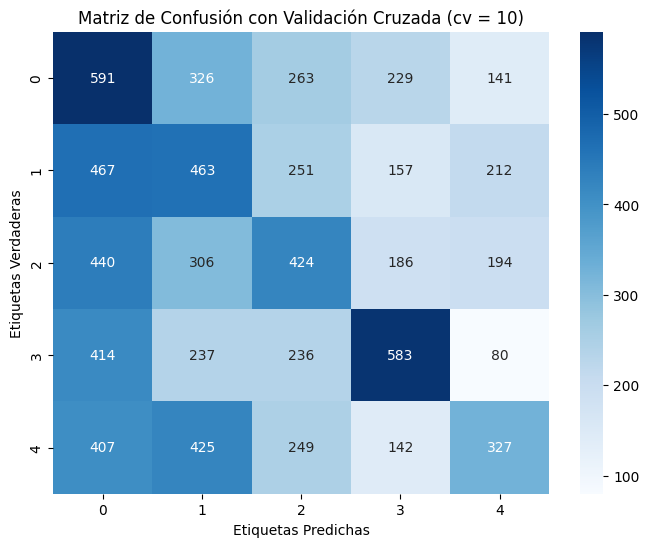

Exactitud media: 0.30812903225806454
Precisión media: 0.32171935583963146
Recall media: 0.30812903225806454
Puntuación F1 media: 0.3082974379426299
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_7_estimators/random_forest_gemini_embedding_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Se creó la carpeta Random_Forest_val_sim_8_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_8_estimators/matriz_confusion_test_0.1.png


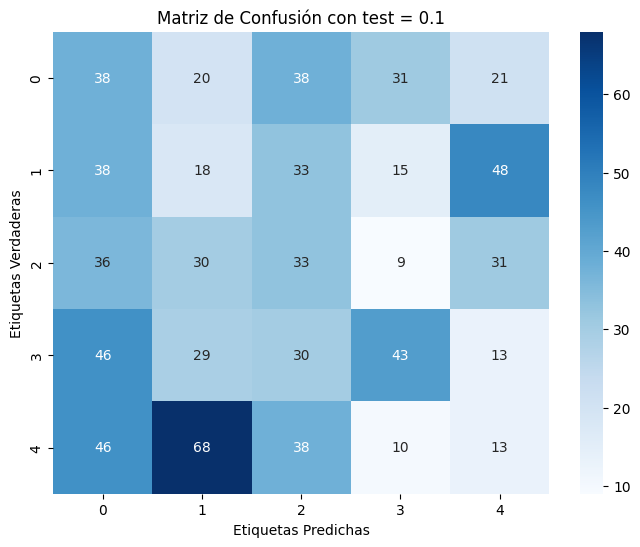

Exactitud del modelo: 0.1870967741935484
Precisión del modelo: 0.19738897766628227
Recall del modelo: 0.1870967741935484
Puntuación F1 del modelo: 0.18748795537983967
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_8_estimators/matriz_confusion_test_0.2.png


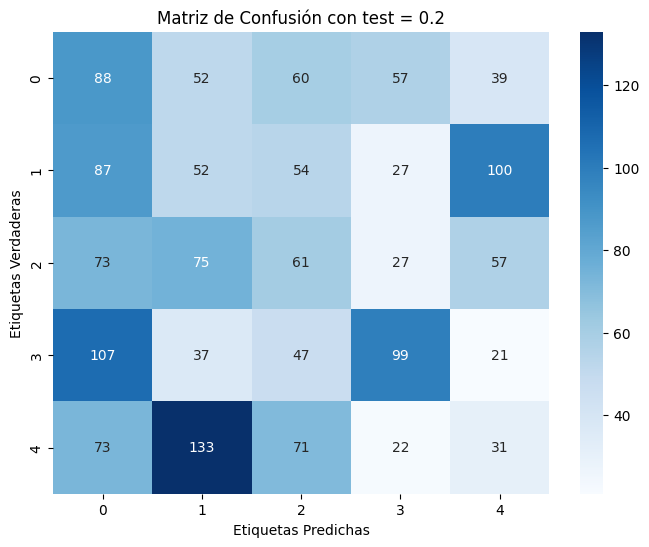

Exactitud del modelo: 0.2135483870967742
Precisión del modelo: 0.2216129697259482
Recall del modelo: 0.2135483870967742
Puntuación F1 del modelo: 0.21387285760301739
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_8_estimators/matriz_confusion_test_0.3.png


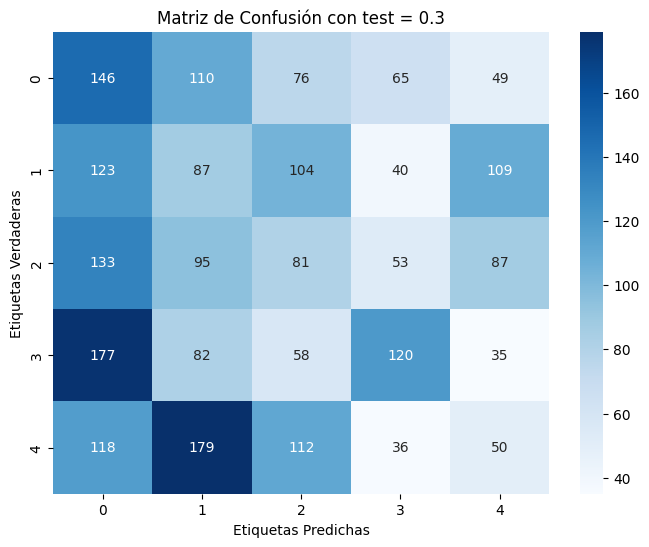

Exactitud del modelo: 0.20817204301075268
Precisión del modelo: 0.21764692760947577
Recall del modelo: 0.20817204301075268
Puntuación F1 del modelo: 0.20645635282937874
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_8_estimators/matriz_confusion_test_0.4.png


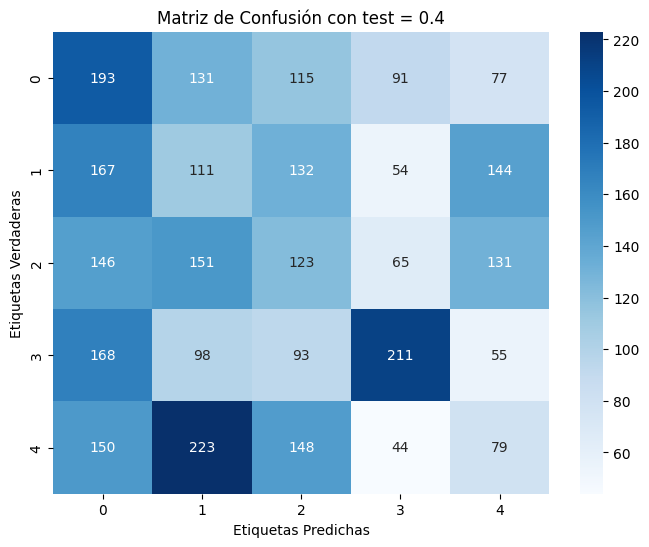

Exactitud del modelo: 0.23129032258064516
Precisión del modelo: 0.24160850866037972
Recall del modelo: 0.23129032258064516
Puntuación F1 del modelo: 0.2326943934773606
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_8_estimators/matriz_confusion_test_0.5.png


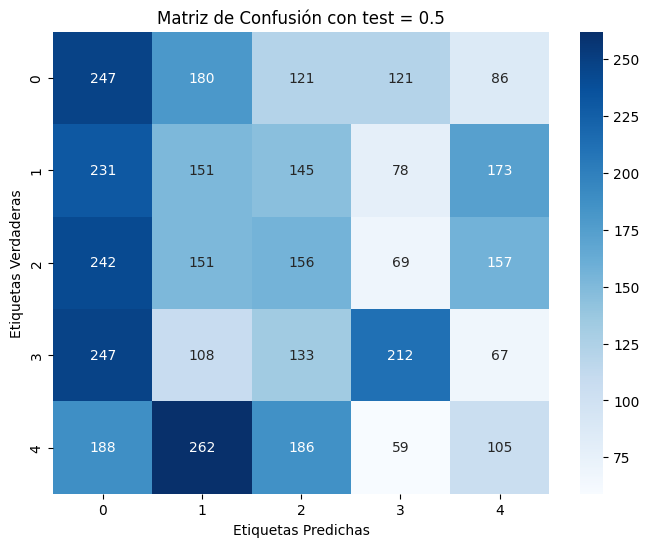

Exactitud del modelo: 0.2247741935483871
Precisión del modelo: 0.23407382413976136
Recall del modelo: 0.2247741935483871
Puntuación F1 del modelo: 0.224248748659531
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_8_estimators/matriz_confusion_test_0.6.png


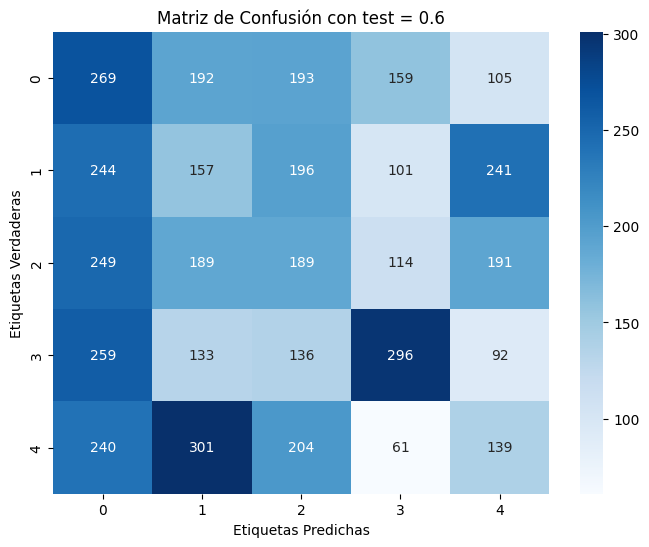

Exactitud del modelo: 0.22580645161290322
Precisión del modelo: 0.23254379277567153
Recall del modelo: 0.22580645161290322
Puntuación F1 del modelo: 0.22666370769973768
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_8_estimators/matriz_confusion_test_0.7.png


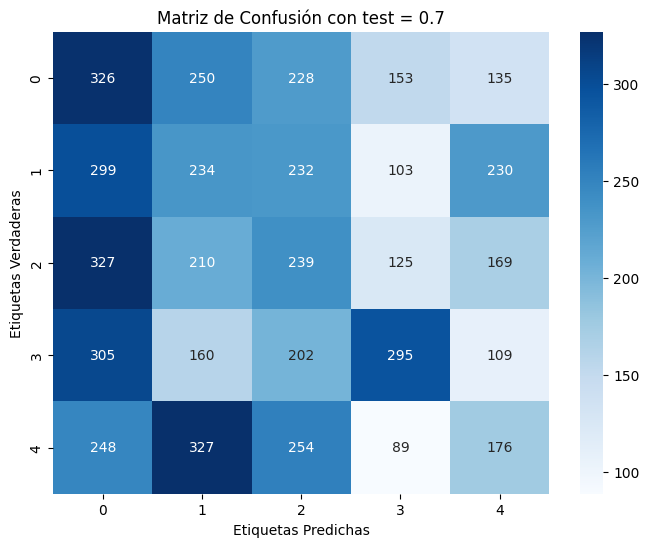

Exactitud del modelo: 0.23410138248847925
Precisión del modelo: 0.243981910437735
Recall del modelo: 0.23410138248847925
Puntuación F1 del modelo: 0.2350177105974732
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_8_estimators/matriz_confusion_test_0.8.png


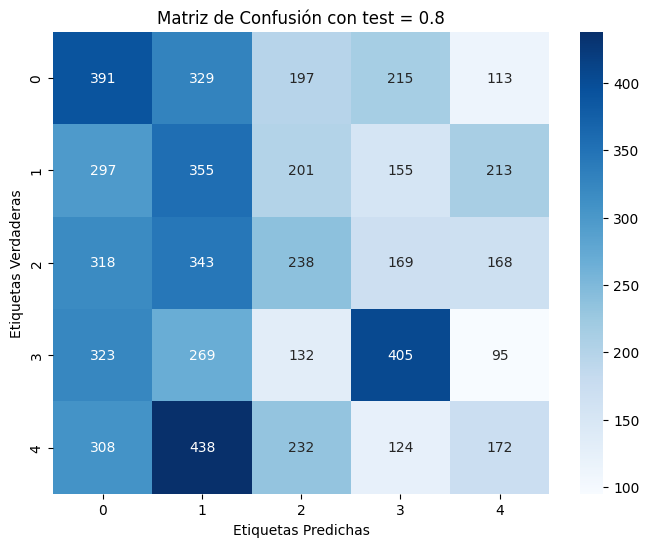

Exactitud del modelo: 0.2517741935483871
Precisión del modelo: 0.25703499657526163
Recall del modelo: 0.2517741935483871
Puntuación F1 del modelo: 0.2487471874038679
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_8_estimators/matriz_confusion_test_0.9.png


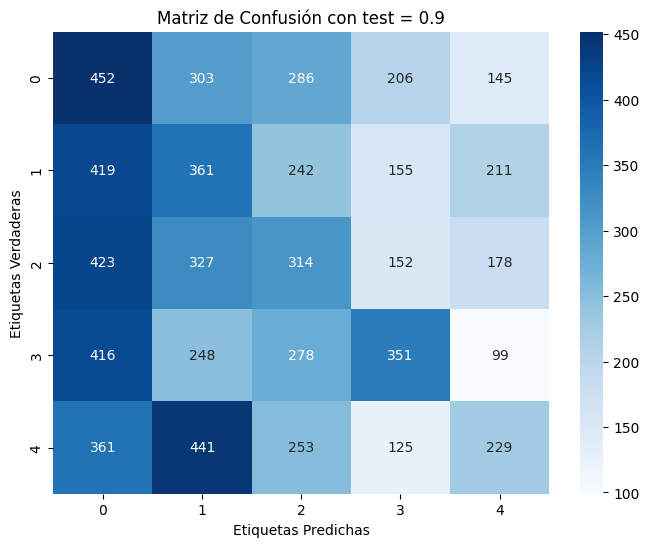

Exactitud del modelo: 0.24473118279569891
Precisión del modelo: 0.2565171663095095
Recall del modelo: 0.24473118279569891
Puntuación F1 del modelo: 0.2438661457379562
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_8_estimators/random_forest_gemini_embedding_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Se creó la carpeta Random_Forest_val_cruz_8_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_8_estimators/matriz_confusion_cv_2.png


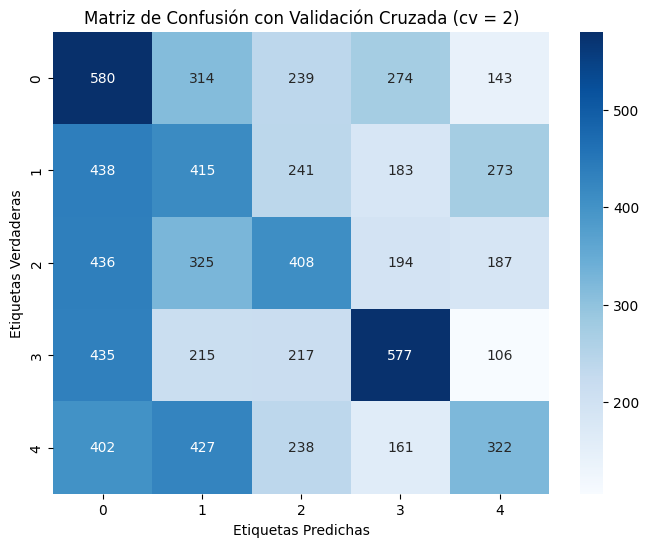

Exactitud media: 0.2970322580645161
Precisión media: 0.3058760653463666
Recall media: 0.2970322580645161
Puntuación F1 media: 0.2963860813416489
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_8_estimators/matriz_confusion_cv_3.png


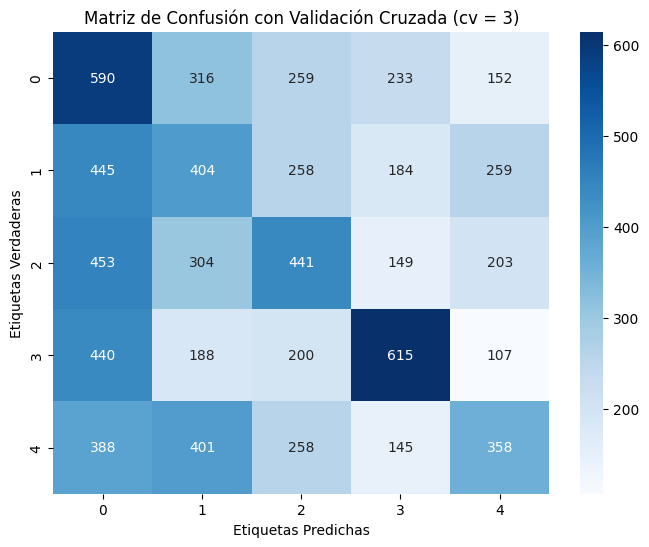

Exactitud media: 0.31070967741935485
Precisión media: 0.32244896330013967
Recall media: 0.31070967741935485
Puntuación F1 media: 0.31161462942958723
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_8_estimators/matriz_confusion_cv_4.png


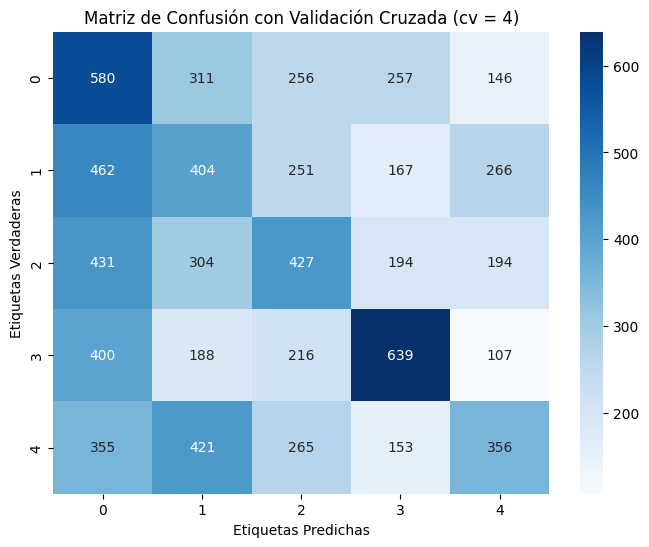

Exactitud media: 0.3104516129032258
Precisión media: 0.3192920394381587
Recall media: 0.3104516129032258
Puntuación F1 media: 0.3105863887115853
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_8_estimators/matriz_confusion_cv_5.png


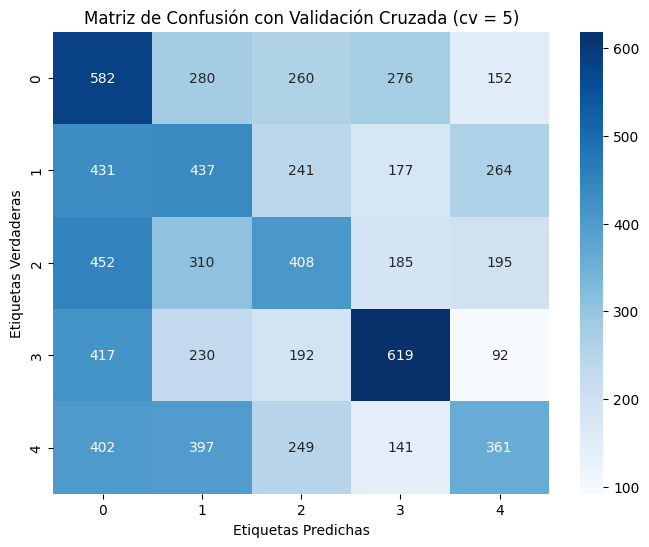

Exactitud media: 0.3105806451612903
Precisión media: 0.3206614845328265
Recall media: 0.3105806451612903
Puntuación F1 media: 0.31078269599797087
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_8_estimators/matriz_confusion_cv_6.png


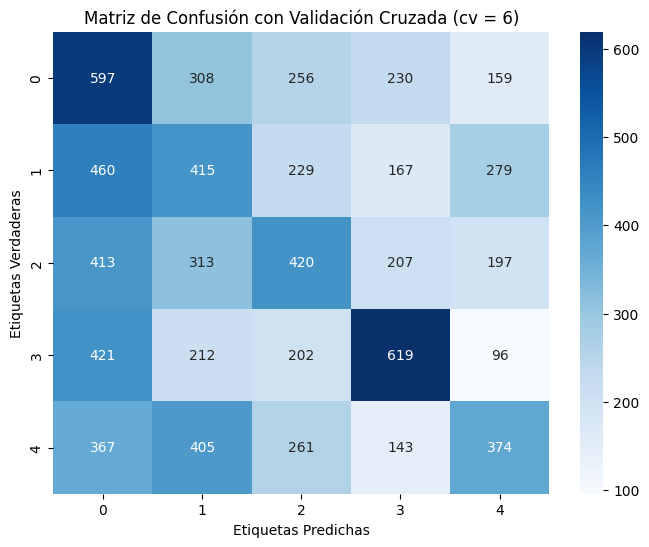

Exactitud media: 0.31290322580645163
Precisión media: 0.32281578177983683
Recall media: 0.31290322580645163
Puntuación F1 media: 0.313367530145046
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_8_estimators/matriz_confusion_cv_7.png


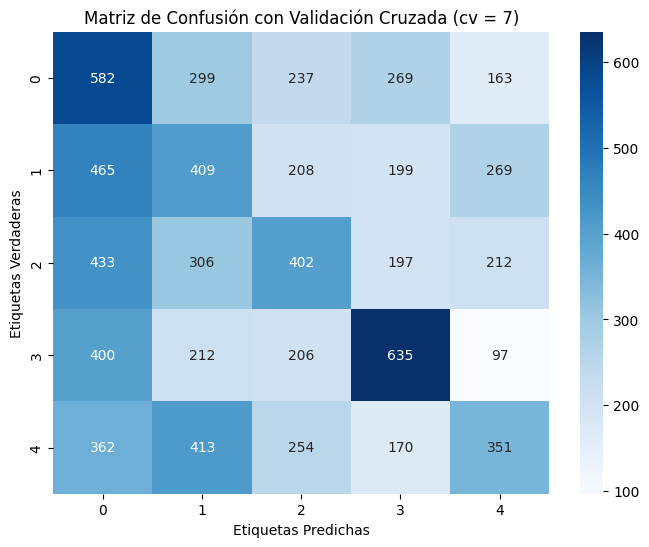

Exactitud media: 0.3069677419354839
Precisión media: 0.3140216029724272
Recall media: 0.3069677419354839
Puntuación F1 media: 0.3062240872786508
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_8_estimators/matriz_confusion_cv_8.png


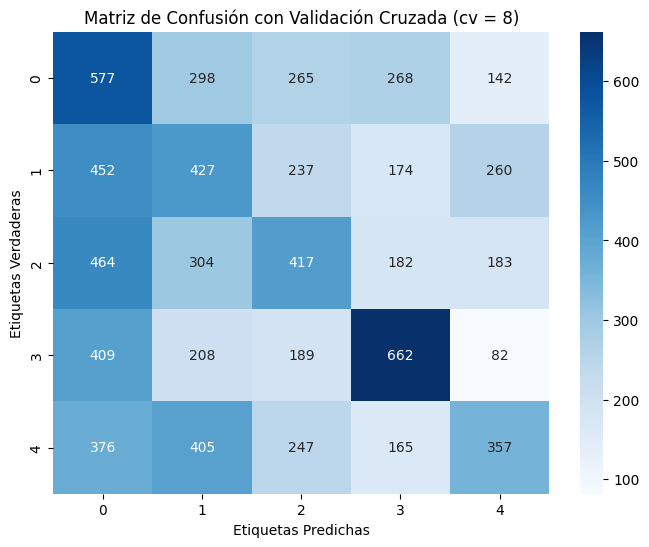

Exactitud media: 0.31483870967741934
Precisión media: 0.32519201013215443
Recall media: 0.31483870967741934
Puntuación F1 media: 0.3149347070446962
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_8_estimators/matriz_confusion_cv_9.png


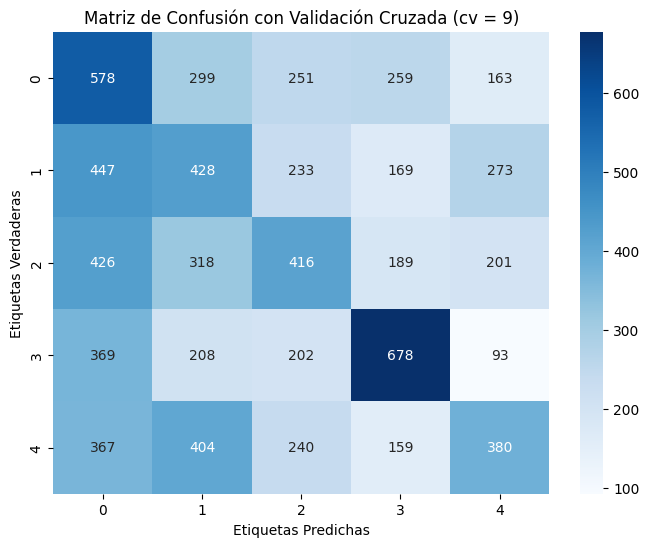

Exactitud media: 0.32
Precisión media: 0.3282428822297062
Recall media: 0.32
Puntuación F1 media: 0.32021155286744196
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_8_estimators/matriz_confusion_cv_10.png


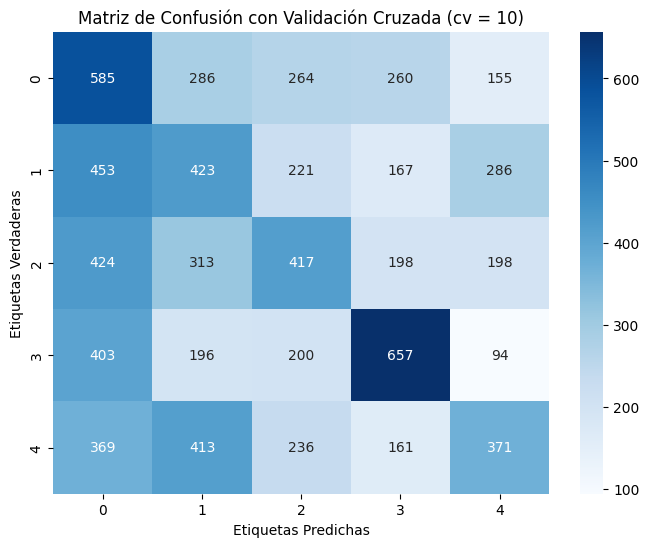

Exactitud media: 0.31651612903225806
Precisión media: 0.3248447190879235
Recall media: 0.31651612903225806
Puntuación F1 media: 0.3165068537953953
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_8_estimators/random_forest_gemini_embedding_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Se creó la carpeta Random_Forest_val_sim_9_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_9_estimators/matriz_confusion_test_0.1.png


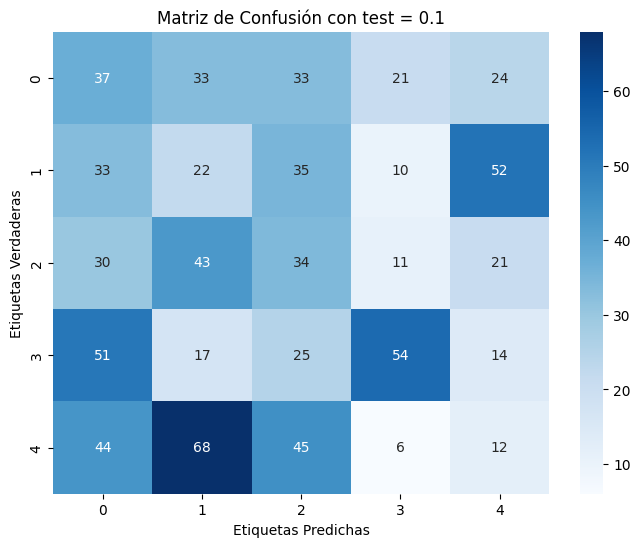

Exactitud del modelo: 0.20516129032258065
Precisión del modelo: 0.22727804433699095
Recall del modelo: 0.20516129032258065
Puntuación F1 del modelo: 0.2096703475997474
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_9_estimators/matriz_confusion_test_0.2.png


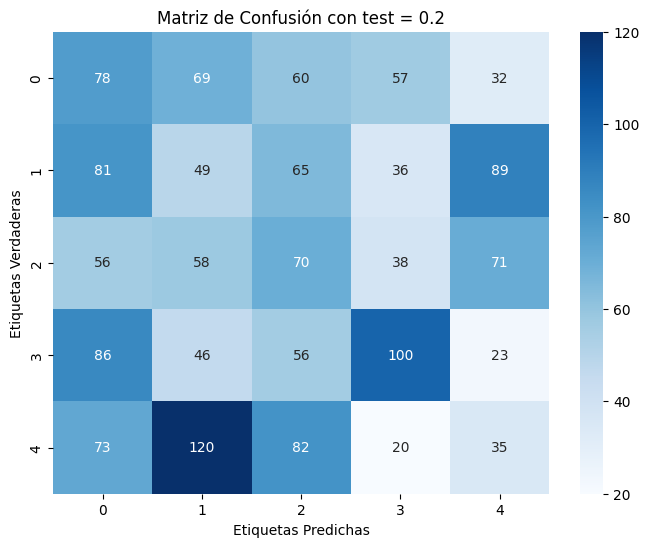

Exactitud del modelo: 0.21419354838709678
Precisión del modelo: 0.2188880952251232
Recall del modelo: 0.21419354838709678
Puntuación F1 del modelo: 0.21440122808618134
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_9_estimators/matriz_confusion_test_0.3.png


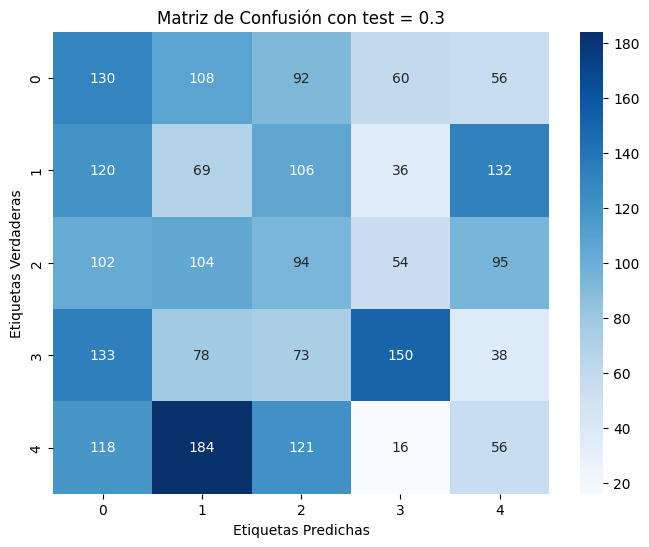

Exactitud del modelo: 0.2146236559139785
Precisión del modelo: 0.23200384102969046
Recall del modelo: 0.2146236559139785
Puntuación F1 del modelo: 0.21832684909029076
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_9_estimators/matriz_confusion_test_0.4.png


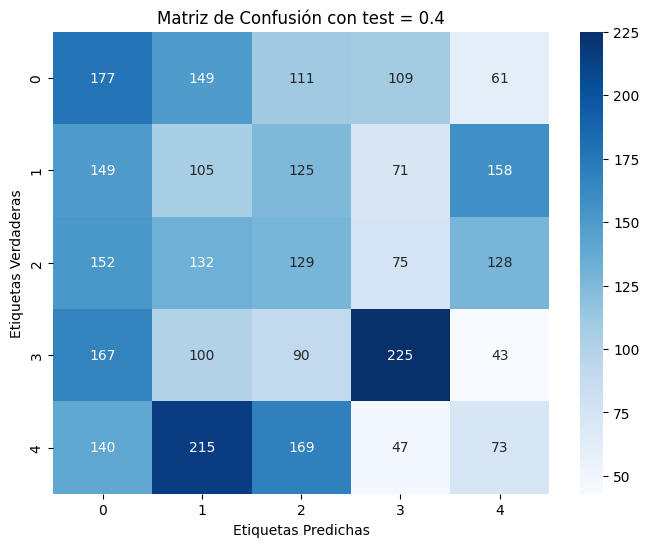

Exactitud del modelo: 0.22870967741935483
Precisión del modelo: 0.23343852462211015
Recall del modelo: 0.22870967741935483
Puntuación F1 del modelo: 0.22875829544827758
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_9_estimators/matriz_confusion_test_0.5.png


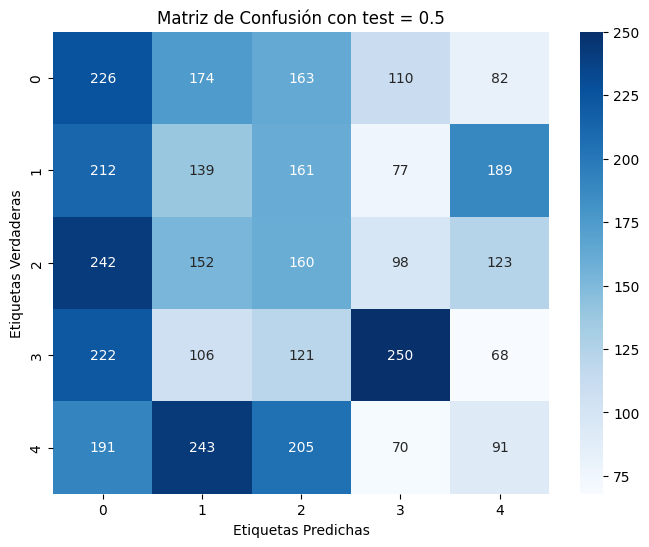

Exactitud del modelo: 0.22348387096774194
Precisión del modelo: 0.22984215158255675
Recall del modelo: 0.22348387096774194
Puntuación F1 del modelo: 0.22299866477000982
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_9_estimators/matriz_confusion_test_0.6.png


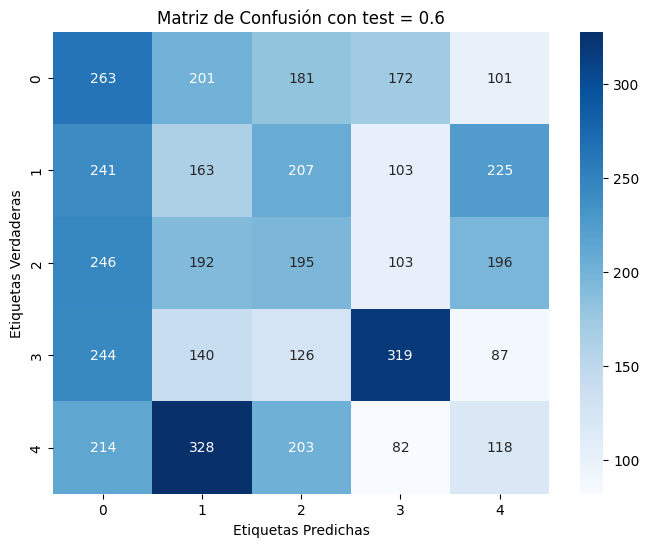

Exactitud del modelo: 0.22752688172043012
Precisión del modelo: 0.2316330765835538
Recall del modelo: 0.22752688172043012
Puntuación F1 del modelo: 0.2276022922511568
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_9_estimators/matriz_confusion_test_0.7.png


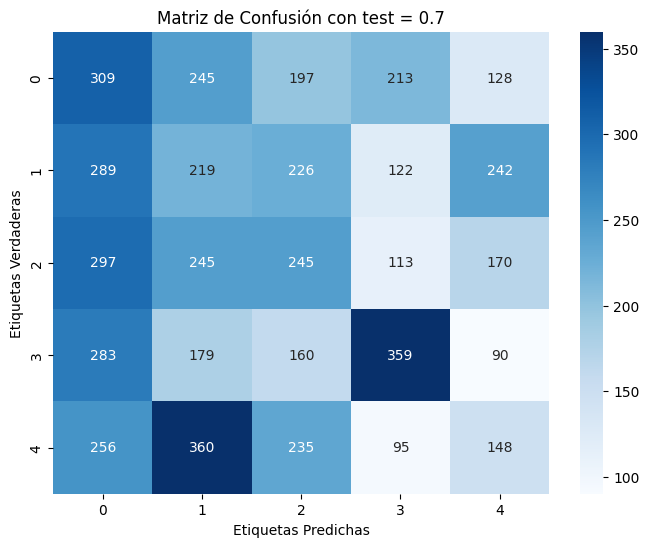

Exactitud del modelo: 0.2359447004608295
Precisión del modelo: 0.24128526126286043
Recall del modelo: 0.2359447004608295
Puntuación F1 del modelo: 0.23607353167889975
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_9_estimators/matriz_confusion_test_0.8.png


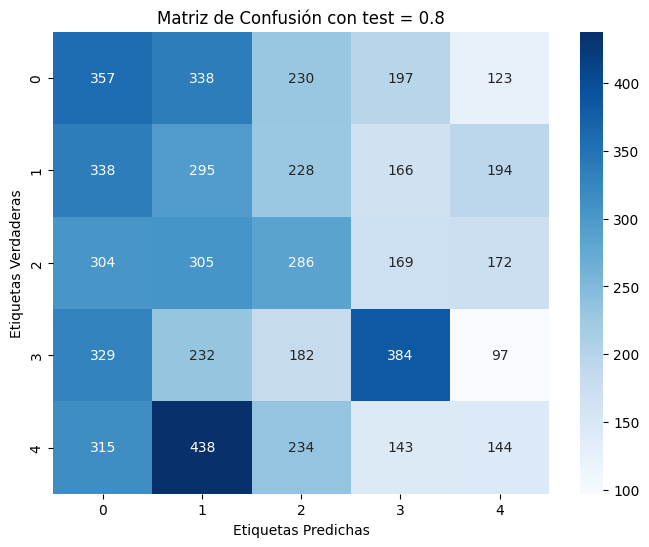

Exactitud del modelo: 0.2364516129032258
Precisión del modelo: 0.24103222638825444
Recall del modelo: 0.2364516129032258
Puntuación F1 del modelo: 0.23425170332879588
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_9_estimators/matriz_confusion_test_0.9.png


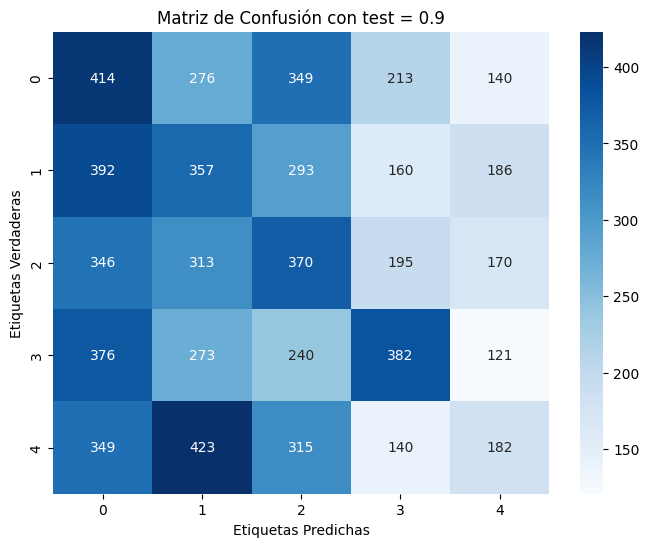

Exactitud del modelo: 0.24444444444444444
Precisión del modelo: 0.2504287384860792
Recall del modelo: 0.24444444444444444
Puntuación F1 del modelo: 0.24212102827398155
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_9_estimators/random_forest_gemini_embedding_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Se creó la carpeta Random_Forest_val_cruz_9_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_9_estimators/matriz_confusion_cv_2.png


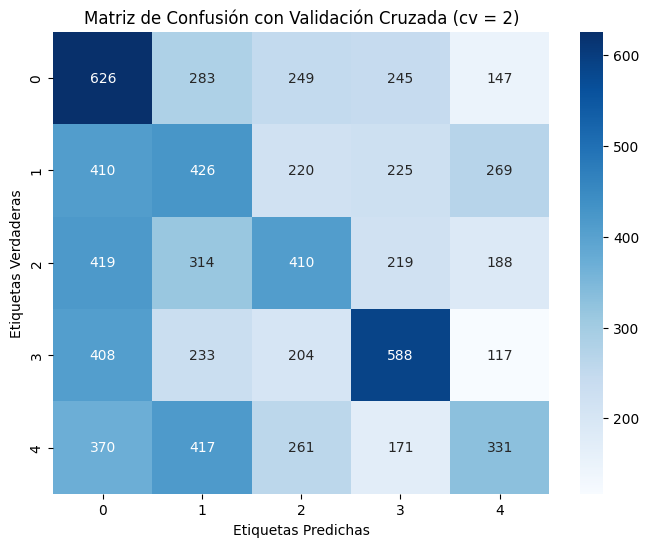

Exactitud media: 0.3072258064516129
Precisión media: 0.31214968026869233
Recall media: 0.3072258064516129
Puntuación F1 media: 0.3050660579690029
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_9_estimators/matriz_confusion_cv_3.png


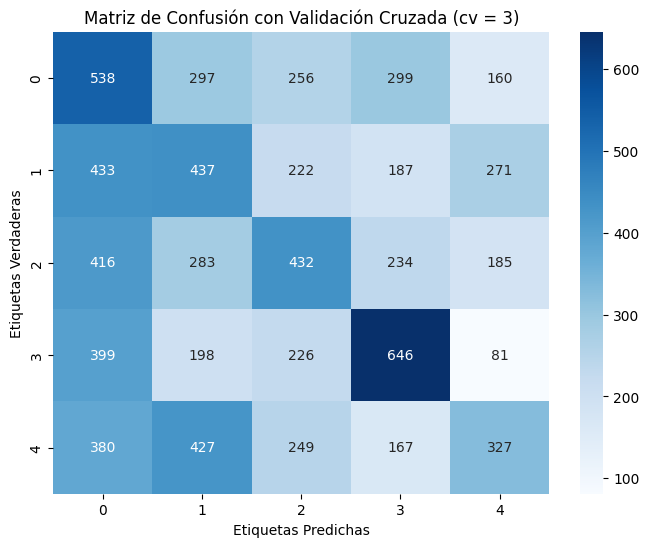

Exactitud media: 0.30709677419354836
Precisión media: 0.31343364475765534
Recall media: 0.30709677419354836
Puntuación F1 media: 0.30617959389441235
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_9_estimators/matriz_confusion_cv_4.png


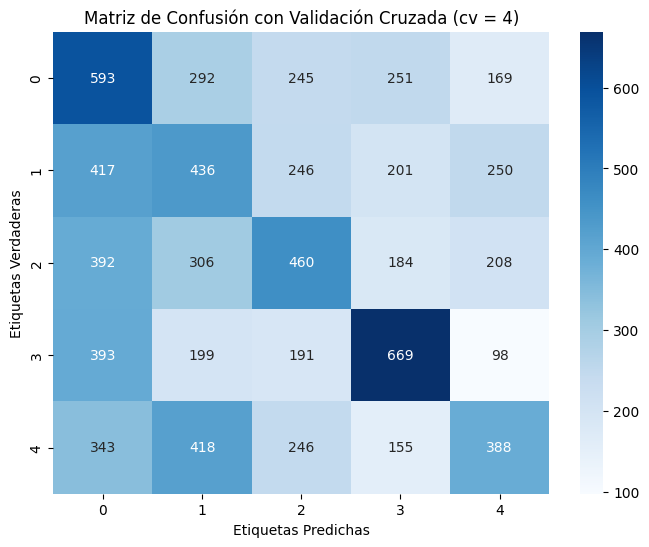

Exactitud media: 0.3285161290322581
Precisión media: 0.3359366088404915
Recall media: 0.3285161290322581
Puntuación F1 media: 0.3286111044103668
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_9_estimators/matriz_confusion_cv_5.png


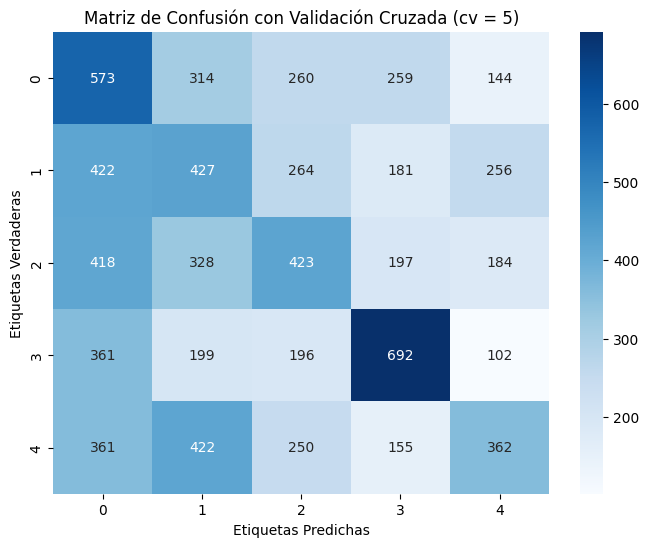

Exactitud media: 0.31961290322580643
Precisión media: 0.32728701694977297
Recall media: 0.31961290322580643
Puntuación F1 media: 0.3193743815489688
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_9_estimators/matriz_confusion_cv_6.png


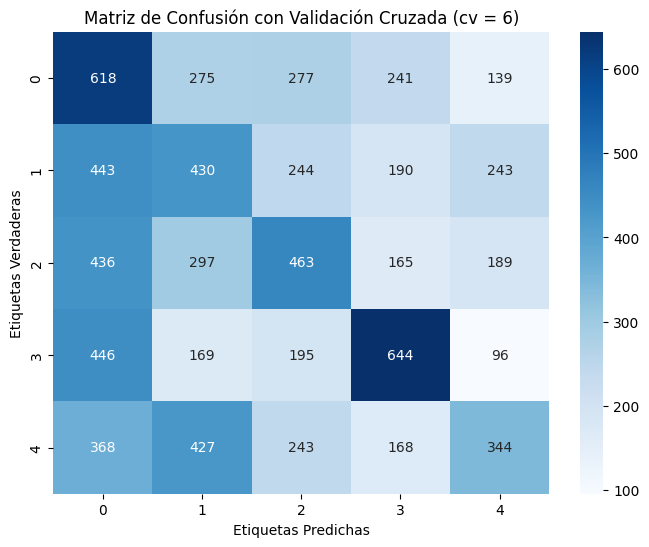

Exactitud media: 0.3224516129032258
Precisión media: 0.33194886901519566
Recall media: 0.3224516129032258
Puntuación F1 media: 0.32179254970583426
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_9_estimators/matriz_confusion_cv_7.png


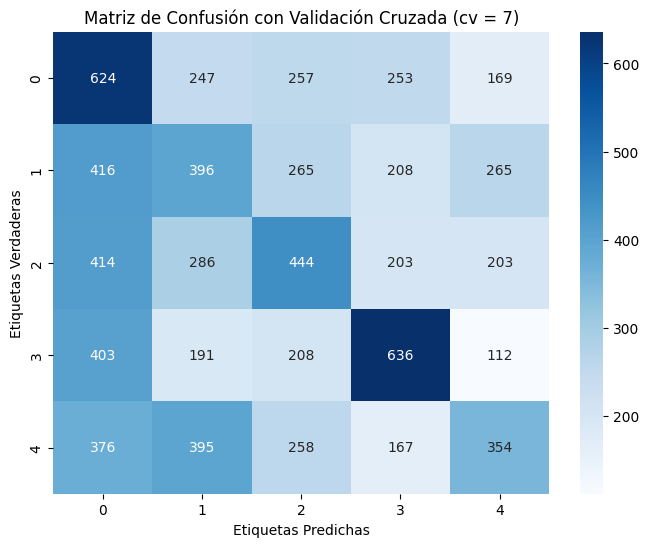

Exactitud media: 0.3166451612903226
Precisión media: 0.32107348262610436
Recall media: 0.3166451612903226
Puntuación F1 media: 0.31491270025385126
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_9_estimators/matriz_confusion_cv_8.png


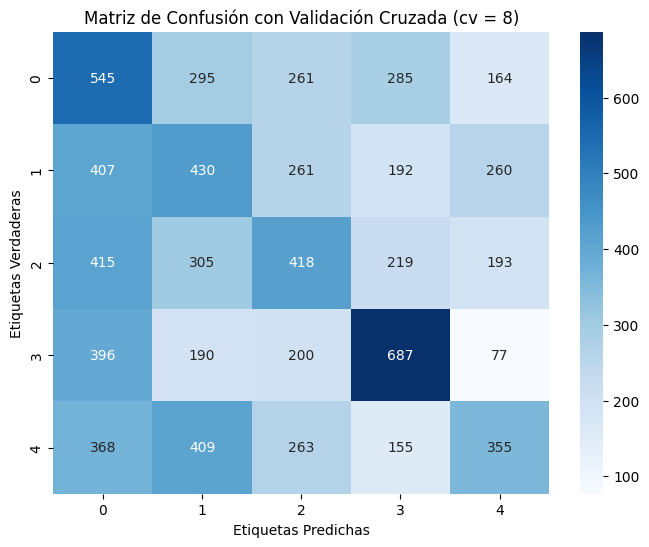

Exactitud media: 0.3141935483870968
Precisión media: 0.32054972888103117
Recall media: 0.3141935483870968
Puntuación F1 media: 0.3135745236724727
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_9_estimators/matriz_confusion_cv_9.png


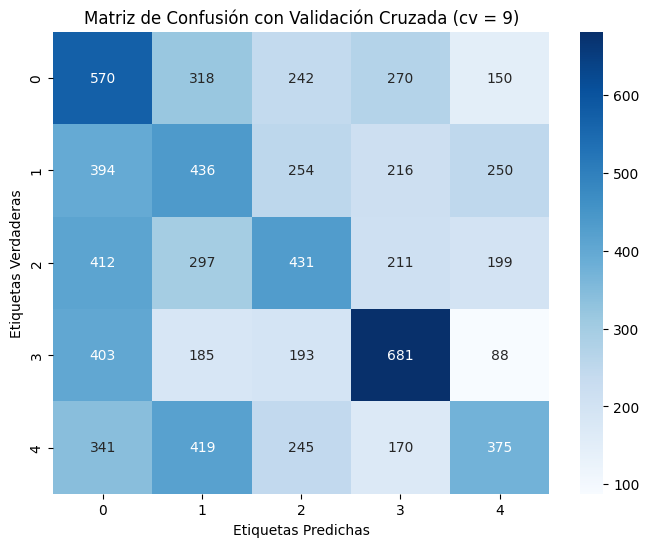

Exactitud media: 0.32167741935483873
Precisión media: 0.3282185548586941
Recall media: 0.32167741935483873
Puntuación F1 media: 0.3210376383582095
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_9_estimators/matriz_confusion_cv_10.png


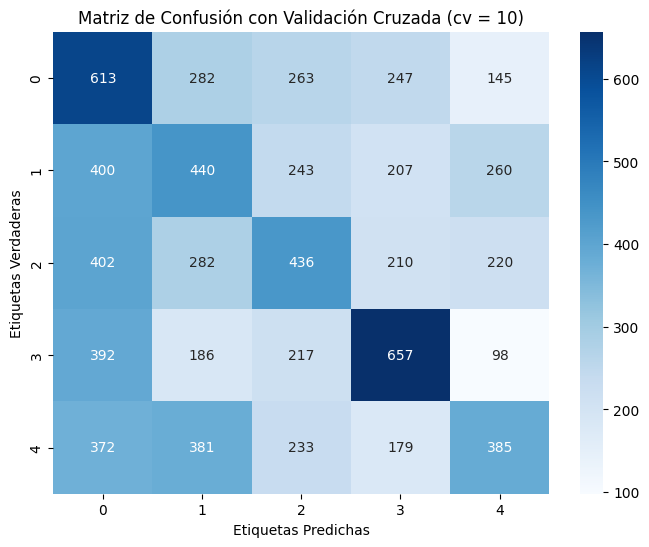

Exactitud media: 0.3265806451612903
Precisión media: 0.332017881333191
Recall media: 0.3265806451612903
Puntuación F1 media: 0.3255287117334519
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_9_estimators/random_forest_gemini_embedding_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Se creó la carpeta Random_Forest_val_sim_10_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_10_estimators/matriz_confusion_test_0.1.png


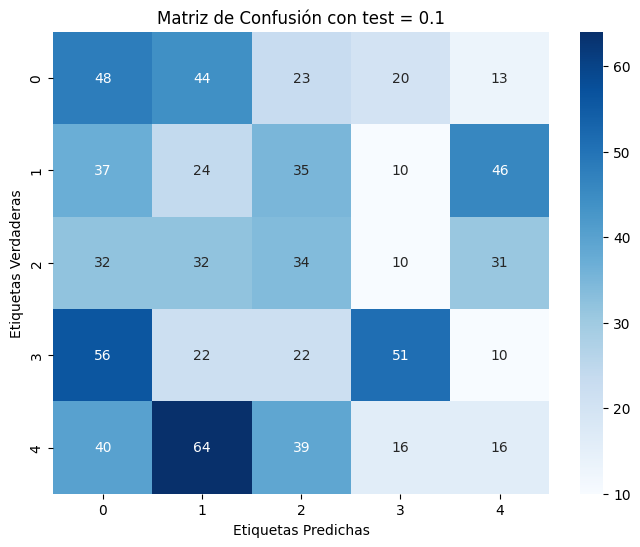

Exactitud del modelo: 0.2232258064516129
Precisión del modelo: 0.23836148849321778
Recall del modelo: 0.2232258064516129
Puntuación F1 del modelo: 0.2243007847842179
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_10_estimators/matriz_confusion_test_0.2.png


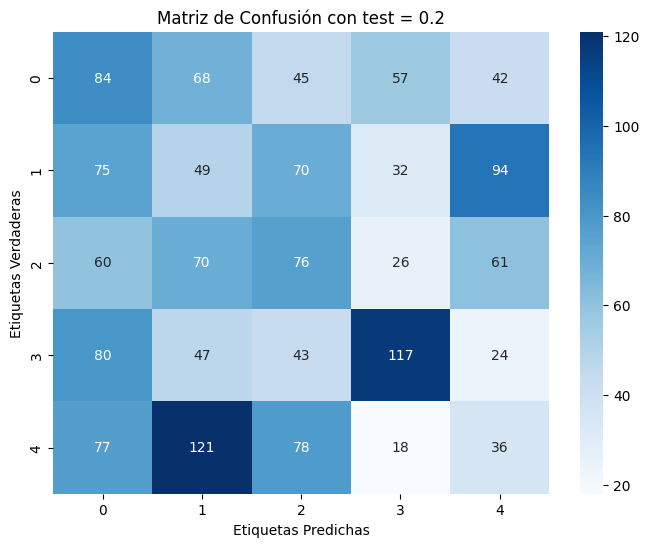

Exactitud del modelo: 0.2335483870967742
Precisión del modelo: 0.24093041900943363
Recall del modelo: 0.2335483870967742
Puntuación F1 del modelo: 0.23501381241098226
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_10_estimators/matriz_confusion_test_0.3.png


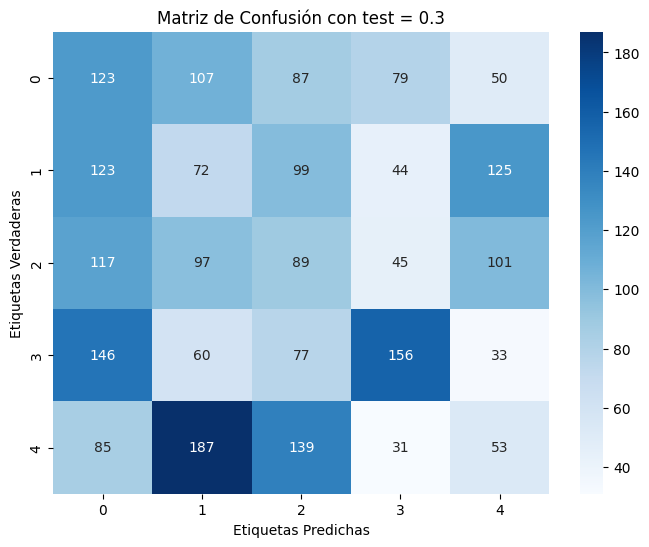

Exactitud del modelo: 0.21204301075268817
Precisión del modelo: 0.22252340760733316
Recall del modelo: 0.21204301075268817
Puntuación F1 del modelo: 0.21394991680458594
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_10_estimators/matriz_confusion_test_0.4.png


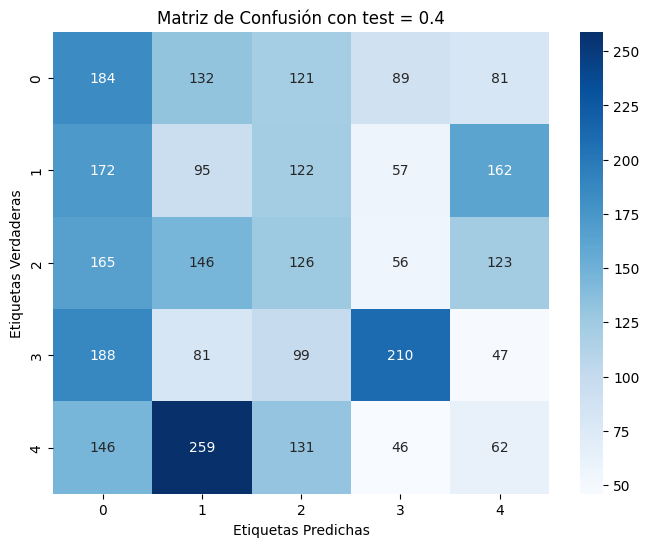

Exactitud del modelo: 0.21838709677419355
Precisión del modelo: 0.22962774746492934
Recall del modelo: 0.21838709677419355
Puntuación F1 del modelo: 0.2199180051868145
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_10_estimators/matriz_confusion_test_0.5.png


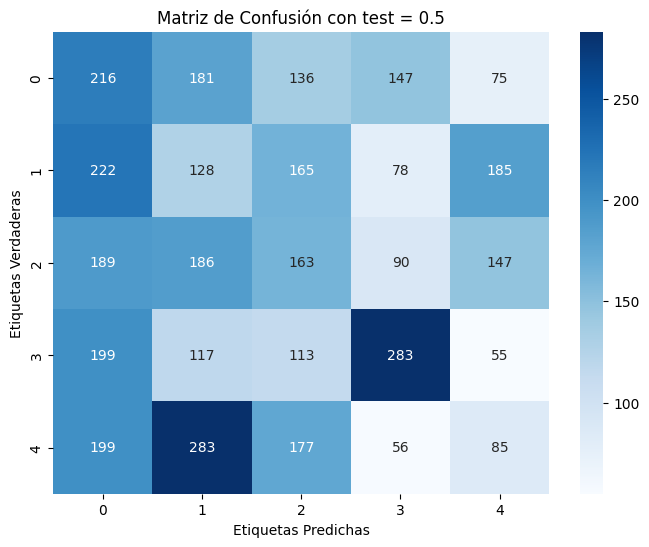

Exactitud del modelo: 0.22580645161290322
Precisión del modelo: 0.23074097080230355
Recall del modelo: 0.22580645161290322
Puntuación F1 del modelo: 0.22554652156950597
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_10_estimators/matriz_confusion_test_0.6.png


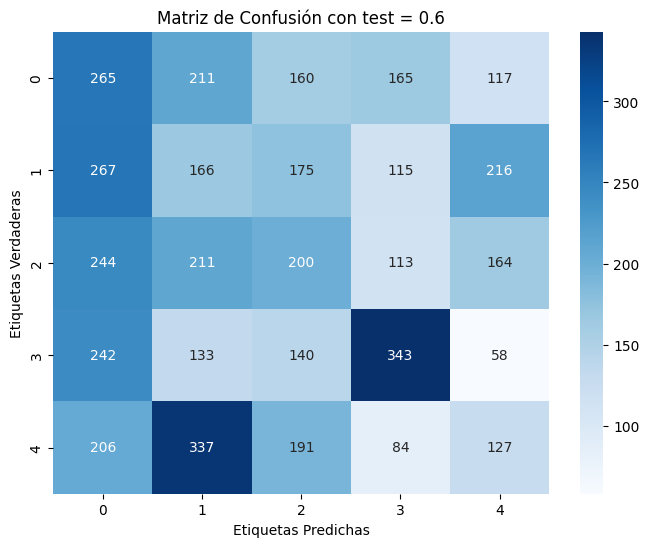

Exactitud del modelo: 0.2367741935483871
Precisión del modelo: 0.24095754571964745
Recall del modelo: 0.2367741935483871
Puntuación F1 del modelo: 0.2365783756352429
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_10_estimators/matriz_confusion_test_0.7.png


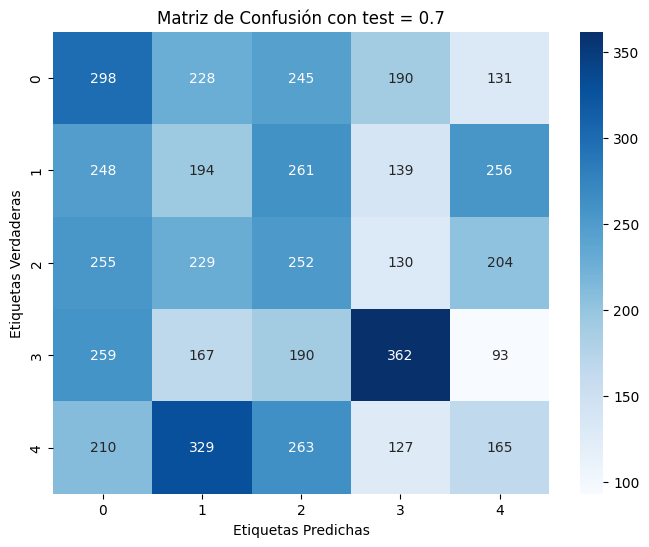

Exactitud del modelo: 0.2342857142857143
Precisión del modelo: 0.23708525691457924
Recall del modelo: 0.2342857142857143
Puntuación F1 del modelo: 0.23439447574149413
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_10_estimators/matriz_confusion_test_0.8.png


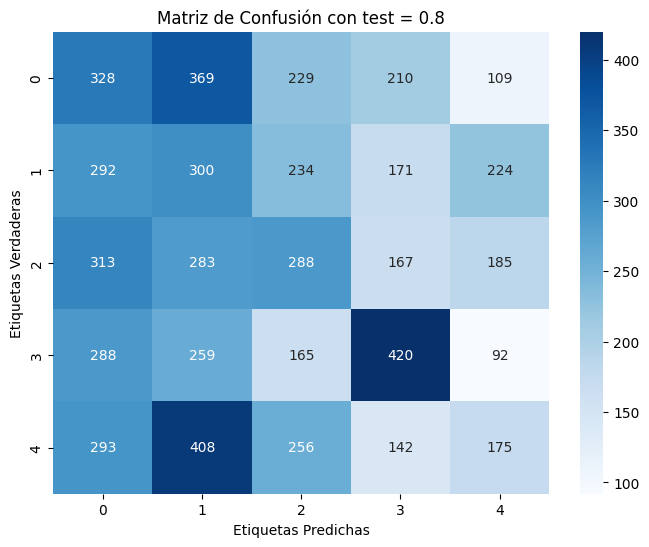

Exactitud del modelo: 0.24370967741935484
Precisión del modelo: 0.24949164478956057
Recall del modelo: 0.24370967741935484
Puntuación F1 del modelo: 0.24301743631393308
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_sim_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_10_estimators/matriz_confusion_test_0.9.png


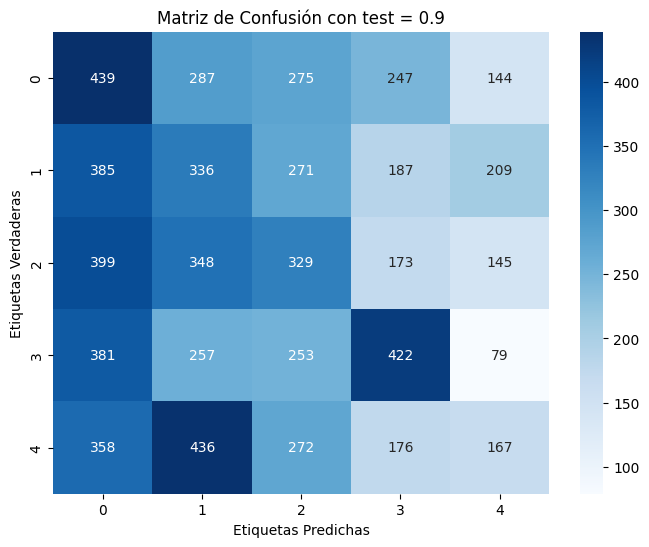

Exactitud del modelo: 0.24272401433691757
Precisión del modelo: 0.24703616835388012
Recall del modelo: 0.24272401433691757
Puntuación F1 del modelo: 0.23932184071086904
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_sim_10_estimators/random_forest_gemini_embedding_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Se creó la carpeta Random_Forest_val_cruz_10_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_10_estimators/matriz_confusion_cv_2.png


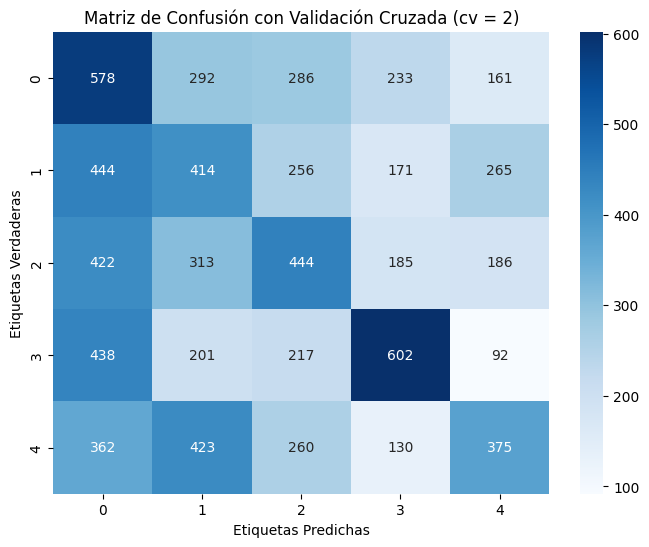

Exactitud media: 0.3113548387096774
Precisión media: 0.3232598447046058
Recall media: 0.3113548387096774
Puntuación F1 media: 0.3126754781876367
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_10_estimators/matriz_confusion_cv_3.png


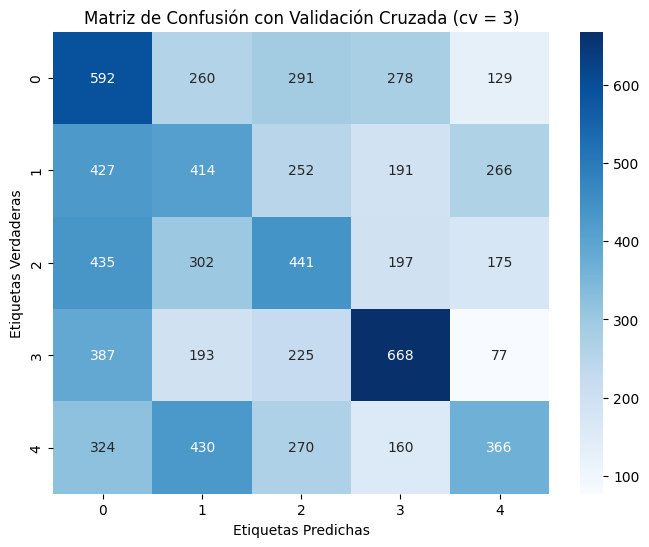

Exactitud media: 0.3201290322580645
Precisión media: 0.3277904502912214
Recall media: 0.3201290322580645
Puntuación F1 media: 0.3194665529844043
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_10_estimators/matriz_confusion_cv_4.png


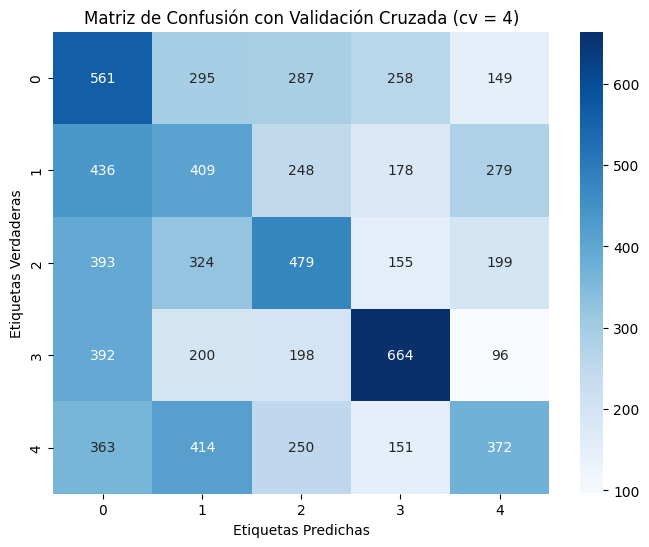

Exactitud media: 0.32064516129032256
Precisión media: 0.33004921663817566
Recall media: 0.32064516129032256
Puntuación F1 media: 0.3217043068628085
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_10_estimators/matriz_confusion_cv_5.png


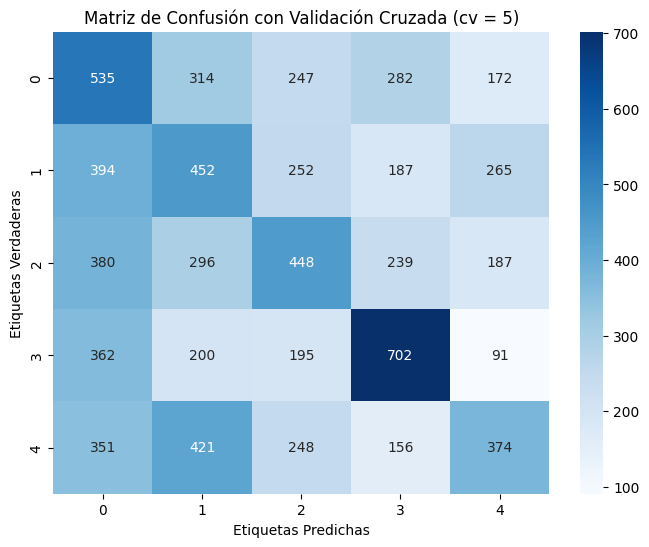

Exactitud media: 0.324
Precisión media: 0.3294339824763922
Recall media: 0.324
Puntuación F1 media: 0.32358975852805655
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_10_estimators/matriz_confusion_cv_6.png


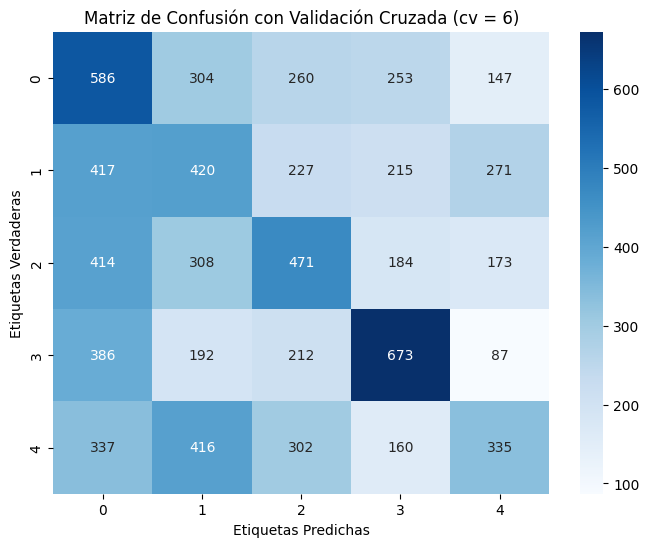

Exactitud media: 0.32064516129032256
Precisión media: 0.3267603408824604
Recall media: 0.32064516129032256
Puntuación F1 media: 0.3195114301230291
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_10_estimators/matriz_confusion_cv_7.png


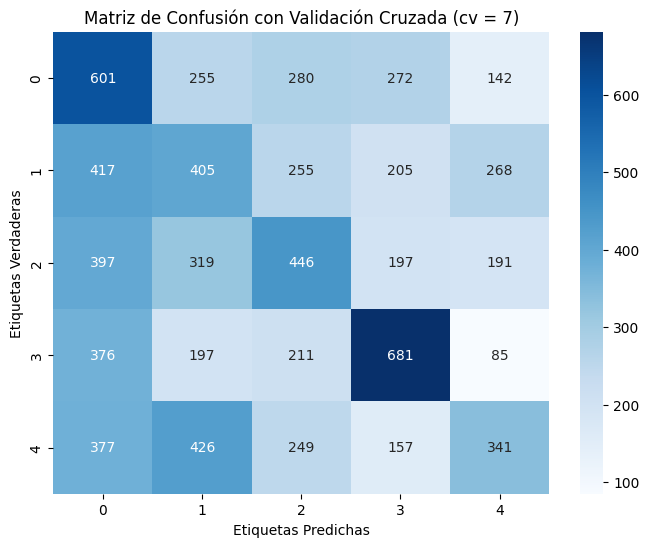

Exactitud media: 0.3192258064516129
Precisión media: 0.3243924352923312
Recall media: 0.3192258064516129
Puntuación F1 media: 0.31759118745462844
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_10_estimators/matriz_confusion_cv_8.png


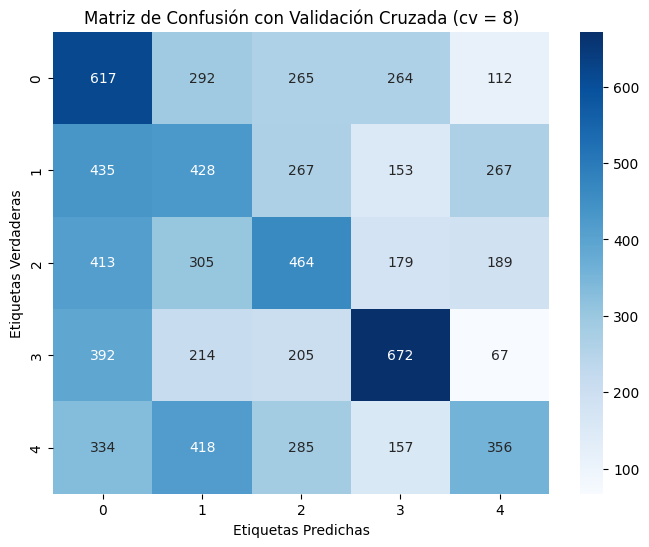

Exactitud media: 0.3273548387096774
Precisión media: 0.33659287828470513
Recall media: 0.3273548387096774
Puntuación F1 media: 0.3268818293005886
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_10_estimators/matriz_confusion_cv_9.png


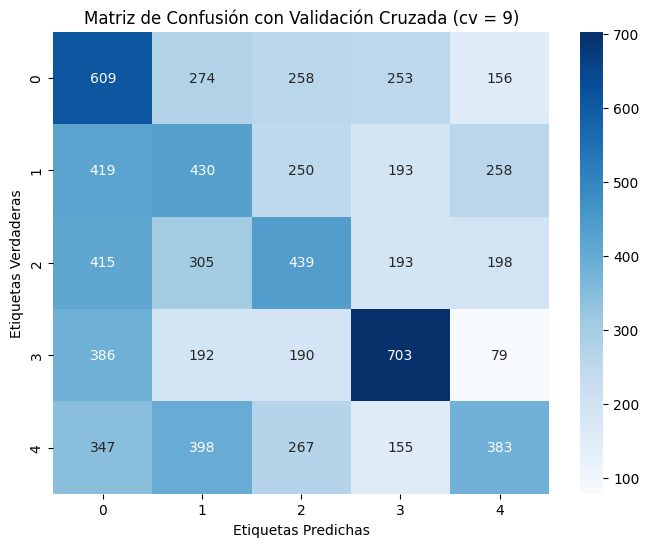

Exactitud media: 0.33083870967741935
Precisión media: 0.3375368278343979
Recall media: 0.33083870967741935
Puntuación F1 media: 0.3301153991705214
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta Random_Forest_val_cruz_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_10_estimators/matriz_confusion_cv_10.png


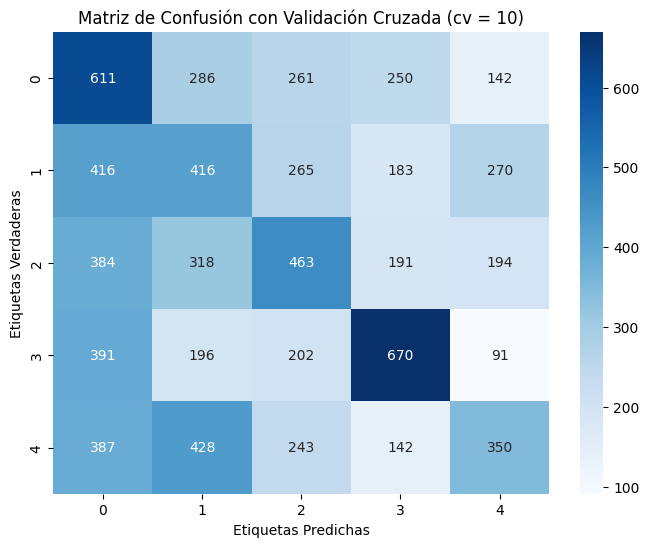

Exactitud media: 0.32387096774193547
Precisión media: 0.3311799182615527
Recall media: 0.32387096774193547
Puntuación F1 media: 0.32318762981435406
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/Random_Forest_val_cruz_10_estimators/random_forest_gemini_embedding_val_cruz.json


In [4]:
import json
from sklearn.model_selection import cross_val_predict

def almacenar_informacion(resultados_finales,validacion,ruta_figura_incom):
    if validacion == "simple":
        ruta_archivo = ruta_figura_incom + "/random_forest_gemini_embedding_val_simple.json"
        with open(ruta_archivo, "w") as archivo:
            json.dump(resultados_finales, archivo)
        
        print("Diccionario guardado como archivo JSON en:", ruta_archivo)
    elif validacion == "cruz":
        ruta_archivo =  ruta_figura_incom + "/random_forest_gemini_embedding_val_cruz.json"
        with open(ruta_archivo, "w") as archivo:
            json.dump(resultados_finales, archivo)
        
        print("Diccionario guardado como archivo JSON en:", ruta_archivo)

# Inicializar una lista vacía para almacenar los valores
lista_valores = []
ruta_figura_incom = ""
# Bucle for para generar los valores en incrementos de 0.10 hasta 0.9
for i in range(1, 10):
    valor = i / 10.0
    lista_valores.append(valor)

resultados_finales_val_simple = {}
resultados_finales_val_cruz = {}
for h in range(1,11):
    experimento = 1
    for i in lista_valores:
        resultados_finales_val_simple["Experimento_LR_" + str(experimento) + "_test_" + str(i)],validacion,ruta_figura_incom = random_forest_classification(datos,h,test_size_1=i)
        experimento = experimento + 1
    
    almacenar_informacion(resultados_finales_val_simple,validacion,ruta_figura_incom)
    
    lista = list(range(2, 11))
    for j in lista:
        resultados_finales_val_cruz["Experimento_LR_" + str(experimento) + "_test_" + str(j)],validacion,ruta_figura_incom = random_forest_classification(datos,h,cv=j)
    
    almacenar_informacion(resultados_finales_val_cruz,validacion,ruta_figura_incom)